## Initial Import and Data  Review

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import date2num, MonthLocator
from datetime import datetime, timedelta

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import data

class_data = pd.read_csv('class_data.csv')
timetable_data = pd.read_csv('timetable_data.csv')


In [3]:
print(class_data.info())
class_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            60128 non-null  object
 1   class_name            60128 non-null  object
 2   center_id             60128 non-null  int64 
 3   state                 60128 non-null  object
 4   start_date_time       60128 non-null  object
 5   stop_date_time        60128 non-null  object
 6   class_capacity        60128 non-null  int64 
 7   participation_status  60128 non-null  object
 8   female                60128 non-null  int64 
 9   male                  60128 non-null  int64 
 10  unknown               60128 non-null  int64 
 11  age_16_17             60128 non-null  int64 
 12  age_18_22             60128 non-null  int64 
 13  age_23_28             60128 non-null  int64 
 14  age_29_34             60128 non-null  int64 
 15  age_35_44             60128 non-null

booking_id class_name  center_id   state           start_date_time  \
0  14book125233   Bodytone         14  ACTIVE  2022-09-07T17:30:00.000Z   
1  14book125233   Bodytone         14  ACTIVE  2022-09-07T17:30:00.000Z   
2  14book125233   Bodytone         14  ACTIVE  2022-09-07T17:30:00.000Z   
3  14book125234   Bodytone         14  ACTIVE  2022-09-14T17:30:00.000Z   
4  14book125234   Bodytone         14  ACTIVE  2022-09-14T17:30:00.000Z   

             stop_date_time  class_capacity participation_status  female  \
0  2022-09-07T18:00:00.000Z              27              NO SHOW       2   
1  2022-09-07T18:00:00.000Z              27            CANCELLED      10   
2  2022-09-07T18:00:00.000Z              27             ATTENDED      13   
3  2022-09-14T18:00:00.000Z              27              NO SHOW       2   
4  2022-09-14T18:00:00.000Z              27            CANCELLED       9   

   male  unknown  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
0     0        0          0          0          0          0          2   
1     0        0          0          1          0          1          4   
2     1        0          0          1          4          3          1   
3     0        0          0          0          0          2          0   
4     0        0          0          2          1          0          4   

   age_over_45  class_key  
0            2          0  
1            8          1  
2            6          2  
3            0          3  
4            6          4

In [4]:
print(timetable_data.info())
timetable_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131 entries, 0 to 1130
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   center_id        1131 non-null   int64 
 1   space_type       1131 non-null   object
 2   day_of_week      1131 non-null   object
 3   slot_start_time  1131 non-null   object
 4   slot_end_time    1131 non-null   object
 5   class_name       1131 non-null   object
 6   class_length     1131 non-null   int64 
 7   timetable_key    1131 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 70.8+ KB
None


center_id space_type day_of_week slot_start_time slot_end_time class_name  \
0         14     STUDIO      Sunday        08:00:00      13:29:59       Pump   
1         14     STUDIO    Thursday        12:00:00      14:59:59       Yoga   
2         14     STUDIO    Thursday        12:00:00      14:59:59        LBT   
3         14     STUDIO    Thursday        16:30:00      20:29:59   Bodytone   
4         14     STUDIO      Sunday        08:00:00      13:29:59        LBT   

   class_length  timetable_key  
0            45              0  
1            60              1  
2            45              2  
3            45              3  
4            30              4

## 1. Clean and Wrangle the Data Set

In [5]:
# Convert date and time columns to datetime

class_data['start_date_time'] = pd.to_datetime(class_data['start_date_time'])

class_data['stop_date_time'] = pd.to_datetime(class_data['stop_date_time'])


print(class_data.info())
class_data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   booking_id            60128 non-null  object             
 1   class_name            60128 non-null  object             
 2   center_id             60128 non-null  int64              
 3   state                 60128 non-null  object             
 4   start_date_time       60128 non-null  datetime64[ns, UTC]
 5   stop_date_time        60128 non-null  datetime64[ns, UTC]
 6   class_capacity        60128 non-null  int64              
 7   participation_status  60128 non-null  object             
 8   female                60128 non-null  int64              
 9   male                  60128 non-null  int64              
 10  unknown               60128 non-null  int64              
 11  age_16_17             60128 non-null  int64              
 12  age_

booking_id  class_name  center_id   state           start_date_time  \
0      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
1      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
2      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
3      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
4      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
...             ...         ...        ...     ...                       ...   
60123  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60124  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60125  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60126  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60127  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   

                 stop_date_time  class_capacity participation_status  female  \
0     2022-09-07 18:00:00+00:00              27              NO SHOW       2   
1     2022-09-07 18:00:00+00:00              27            CANCELLED      10   
2     2022-09-07 18:00:00+00:00              27             ATTENDED      13   
3     2022-09-14 18:00:00+00:00              27              NO SHOW       2   
4     2022-09-14 18:00:00+00:00              27            CANCELLED       9   
...                         ...             ...                  ...     ...   
60123 2023-08-24 08:15:00+00:00              24             ATTENDED       2   
60124 2023-08-24 08:15:00+00:00              24            CANCELLED       5   
60125 2023-08-31 08:15:00+00:00              24              NO SHOW       2   
60126 2023-08-31 08:15:00+00:00              24             ATTENDED       2   
60127 2023-08-31 08:15:00+00:00              24            CANCELLED       6   

       male  unknown  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
0         0        0          0          0          0          0          2   
1         0        0          0          1          0          1          4   
2         1        0          0          1          4          3          1   
3         0        0          0          0          0          2          0   
4         0        0          0          2          1          0          4   
...     ...      ...        ...        ...        ...        ...        ...   
60123     1        0          0          0          0          0          1   
60124     0        0          0          0          2          1          1   
60125     0        0          0          0          0          1          1   
60126     2        0          0          0          0          1          2   
60127     0        0          0          1          2          1          0   

       age_over_45    class_key  
0                2            0  
1                8            1  
2                6            2  
3                0            3  
4                6            4  
...            ...          ...  
60123            3  25769820301  
60124            2  25769820302  
60125            1  25769820303  
60126            3  25769820304  
60127            2  25769820305  

[60128 rows x 18 columns]

In [6]:
# Determine the minimum and maximum dates in the ad DataFrame.

class_min_date = class_data['start_date_time'].dt.date.min()
class_max_date = class_data['start_date_time'].dt.date.max()

# What is the timespan of the ad dataframe

time_span = np.timedelta64(class_max_date - class_min_date)

# Convert to days and months

days = time_span.astype('timedelta64[D]').astype(int)

months = days // 30  

# Calculate remaining days
remaining_days = days % 30

print(f"The earliest date in the class_data dataframe is {class_min_date}")
print(f"The latest date in the class_data dataframe is {class_max_date}")
print((f"Time Span: {months} months and {remaining_days} day(s)"))

The earliest date in the class_data dataframe is 2022-09-01
The latest date in the class_data dataframe is 2023-08-31
Time Span: 12 months and 4 day(s)


In [7]:
# Normalise the data to case sensitivity

timetable_data['class_name_normalized'] = timetable_data['class_name'].str.lower()
class_data['class_name_normalized'] = class_data['class_name'].str.lower()

class_data

booking_id  class_name  center_id   state           start_date_time  \
0      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
1      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
2      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
3      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
4      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
...             ...         ...        ...     ...                       ...   
60123  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60124  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60125  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60126  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60127  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   

                 stop_date_time  class_capacity participation_status  female  \
0     2022-09-07 18:00:00+00:00              27              NO SHOW       2   
1     2022-09-07 18:00:00+00:00              27            CANCELLED      10   
2     2022-09-07 18:00:00+00:00              27             ATTENDED      13   
3     2022-09-14 18:00:00+00:00              27              NO SHOW       2   
4     2022-09-14 18:00:00+00:00              27            CANCELLED       9   
...                         ...             ...                  ...     ...   
60123 2023-08-24 08:15:00+00:00              24             ATTENDED       2   
60124 2023-08-24 08:15:00+00:00              24            CANCELLED       5   
60125 2023-08-31 08:15:00+00:00              24              NO SHOW       2   
60126 2023-08-31 08:15:00+00:00              24             ATTENDED       2   
60127 2023-08-31 08:15:00+00:00              24            CANCELLED       6   

       male  unknown  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
0         0        0          0          0          0          0          2   
1         0        0          0          1          0          1          4   
2         1        0          0          1          4          3          1   
3         0        0          0          0          0          2          0   
4         0        0          0          2          1          0          4   
...     ...      ...        ...        ...        ...        ...        ...   
60123     1        0          0          0          0          0          1   
60124     0        0          0          0          2          1          1   
60125     0        0          0          0          0          1          1   
60126     2        0          0          0          0          1          2   
60127     0        0          0          1          2          1          0   

       age_over_45    class_key class_name_normalized  
0                2            0              bodytone  
1                8            1              bodytone  
2                6            2              bodytone  
3                0            3              bodytone  
4                6            4              bodytone  
...            ...          ...                   ...  
60123            3  25769820301            kettlebell  
60124            2  25769820302            kettlebell  
60125            1  25769820303            kettlebell  
60126            3  25769820304            kettlebell  
60127            2  25769820305            kettlebell  

[60128 rows x 19 columns]

In [8]:
# Replace 'Legs, Bums & Tums' with 'LBT' in the 'class_name' column of class_data
class_data['class_name_normalized'] = class_data['class_name_normalized'].replace('legs, bums & tums', 'lbt')

# Now, any entry in class_data['class_name'] that was 'Legs, Bums & Tums' will be 'LBT'

In [9]:
# Create a mapping dictionary that accounts for partial matches
# First, create a unique mapping from the normalized class names to space types
unique_space_mapping = timetable_data.drop_duplicates(subset=['class_name_normalized'])[['class_name_normalized', 'space_type']]

# Convert the DataFrame to a dictionary for efficient lookups
space_type_mapping_dict = unique_space_mapping.set_index('class_name_normalized')['space_type'].to_dict()

# Function to apply mapping with partial match logic
def map_space_type(class_name_normalized):
    for key in space_type_mapping_dict.keys():
        if key in class_name_normalized:
            return space_type_mapping_dict[key]
    return None  # Return None or a default value if no match is found

# Apply the mapping function to the normalized class names in class_data
class_data['space_type'] = class_data['class_name_normalized'].apply(map_space_type)

class_data

booking_id  class_name  center_id   state           start_date_time  \
0      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
1      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
2      14book125233    Bodytone         14  ACTIVE 2022-09-07 17:30:00+00:00   
3      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
4      14book125234    Bodytone         14  ACTIVE 2022-09-14 17:30:00+00:00   
...             ...         ...        ...     ...                       ...   
60123  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60124  34book134620  Kettlebell         34  ACTIVE 2023-08-24 07:45:00+00:00   
60125  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60126  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   
60127  34book134621  Kettlebell         34  ACTIVE 2023-08-31 07:45:00+00:00   

                 stop_date_time  class_capacity participation_status  female  \
0     2022-09-07 18:00:00+00:00              27              NO SHOW       2   
1     2022-09-07 18:00:00+00:00              27            CANCELLED      10   
2     2022-09-07 18:00:00+00:00              27             ATTENDED      13   
3     2022-09-14 18:00:00+00:00              27              NO SHOW       2   
4     2022-09-14 18:00:00+00:00              27            CANCELLED       9   
...                         ...             ...                  ...     ...   
60123 2023-08-24 08:15:00+00:00              24             ATTENDED       2   
60124 2023-08-24 08:15:00+00:00              24            CANCELLED       5   
60125 2023-08-31 08:15:00+00:00              24              NO SHOW       2   
60126 2023-08-31 08:15:00+00:00              24             ATTENDED       2   
60127 2023-08-31 08:15:00+00:00              24            CANCELLED       6   

       male  unknown  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
0         0        0          0          0          0          0          2   
1         0        0          0          1          0          1          4   
2         1        0          0          1          4          3          1   
3         0        0          0          0          0          2          0   
4         0        0          0          2          1          0          4   
...     ...      ...        ...        ...        ...        ...        ...   
60123     1        0          0          0          0          0          1   
60124     0        0          0          0          2          1          1   
60125     0        0          0          0          0          1          1   
60126     2        0          0          0          0          1          2   
60127     0        0          0          1          2          1          0   

       age_over_45    class_key class_name_normalized space_type  
0                2            0              bodytone     STUDIO  
1                8            1              bodytone     STUDIO  
2                6            2              bodytone     STUDIO  
3                0            3              bodytone     STUDIO  
4                6            4              bodytone     STUDIO  
...            ...          ...                   ...        ...  
60123            3  25769820301            kettlebell       None  
60124            2  25769820302            kettlebell       None  
60125            1  25769820303            kettlebell       None  
60126            3  25769820304            kettlebell       None  
60127            2  25769820305            kettlebell       None  

[60128 rows x 20 columns]

In [10]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   booking_id             60128 non-null  object             
 1   class_name             60128 non-null  object             
 2   center_id              60128 non-null  int64              
 3   state                  60128 non-null  object             
 4   start_date_time        60128 non-null  datetime64[ns, UTC]
 5   stop_date_time         60128 non-null  datetime64[ns, UTC]
 6   class_capacity         60128 non-null  int64              
 7   participation_status   60128 non-null  object             
 8   female                 60128 non-null  int64              
 9   male                   60128 non-null  int64              
 10  unknown                60128 non-null  int64              
 11  age_16_17              60128 non-null  int64          

In [11]:
# Check class_names

# Check for unique class names in timetable_data
unique_classes_in_timetable_data = timetable_data['class_name_normalized'].nunique()

# Check for unique class names in class_data (after replacements)
unique_classes_in_class_data = class_data['class_name_normalized'].nunique()

print("Unique classes in timetable_data:", unique_classes_in_timetable_data)
print("Unique classes in class_data:", unique_classes_in_class_data)



Unique classes in timetable_data: 17
Unique classes in class_data: 64


In [12]:
# Replace and drop class_name_normalised

class_data['class_name'] = class_data['class_name_normalized']
class_data = class_data.drop(columns=['class_name_normalized'])

timetable_data['class_name'] = timetable_data['class_name_normalized']
timetable_data = timetable_data.drop(columns=['class_name_normalized'])

timetable_data

center_id space_type day_of_week slot_start_time slot_end_time  \
0            14     STUDIO      Sunday        08:00:00      13:29:59   
1            14     STUDIO    Thursday        12:00:00      14:59:59   
2            14     STUDIO    Thursday        12:00:00      14:59:59   
3            14     STUDIO    Thursday        16:30:00      20:29:59   
4            14     STUDIO      Sunday        08:00:00      13:29:59   
...         ...        ...         ...             ...           ...   
1126        314     STUDIO   Wednesday        12:00:00      14:59:59   
1127        314     STUDIO   Wednesday        16:30:00      20:29:59   
1128        314     STUDIO   Wednesday        16:30:00      20:29:59   
1129        314     STUDIO     Tuesday        16:30:00      20:29:59   
1130        314     STUDIO      Monday        16:30:00      20:29:59   

     class_name  class_length  timetable_key  
0          pump            45              0  
1          yoga            60              1  
2           lbt            45              2  
3      bodytone            45              3  
4           lbt            30              4  
...         ...           ...            ...  
1126       step            45           1126  
1127      zumba            60           1127  
1128      dance            45           1128  
1129       yoga            45           1129  
1130        lbt            45           1130  

[1131 rows x 8 columns]

In [13]:
# Check spaces attributed

grouped_timetable_data = timetable_data.groupby(['class_name', 'space_type']).size().reset_index(name='Count')

grouped_timetable_data

class_name  space_type  Count
0    aerobics      STUDIO     26
1    bodytone      STUDIO    110
2    bootcamp      STUDIO     54
3     burn it      STUDIO     27
4    circuits      STUDIO     48
5      combat      STUDIO     33
6     cycle-1        SPIN    121
7       dance      STUDIO     27
8        heat      STUDIO     10
9         lbt      STUDIO    150
10    pilates      STUDIO     70
11       pump      STUDIO    167
12       step      STUDIO     70
13   strength  FUNCTIONAL     21
14      sweat  FUNCTIONAL     21
15       yoga      STUDIO    110
16      zumba      STUDIO     66

In [14]:
# Check spaces attributed

grouped_class_data = class_data.groupby(['class_name', 'space_type']).size().reset_index(name='Count')
grouped_class_data

class_name  space_type  Count
0                        aerobics      STUDIO     62
1    bhf summer of love – burn it      STUDIO     18
2   bhf summer of love – circuits      STUDIO     12
3        bhf summer of love – lbt      STUDIO      9
4       bhf summer of love – pump      STUDIO      2
5                        bodytone      STUDIO   6607
6                        bootcamp      STUDIO   1034
7                       bootcamp       STUDIO   1054
8        bootcamp for heart month      STUDIO      3
9          bootcamp – ladies only      STUDIO     21
10                        burn it      STUDIO   3717
11        burn it for heart month      STUDIO      1
12                       circuits      STUDIO   4166
13       circuits for heart month      STUDIO      3
14                         combat      STUDIO    188
15                      combat £4      STUDIO      1
16                          dance      STUDIO    212
17                       dance £4      STUDIO     22
18            dance – ladies only      STUDIO      8
19                           heat      STUDIO    108
20                            lbt      STUDIO   7902
21  move your mind circuits class      STUDIO     18
22                        pilates      STUDIO    147
23                     pilates £2      STUDIO     91
24                     pilates £4      STUDIO     24
25                 pride bootcamp      STUDIO      1
26                           pump      STUDIO   6543
27           pump for heart month      STUDIO     13
28                           step      STUDIO    814
29                        step £4      STUDIO     37
30                    strength 30  FUNCTIONAL   1925
31                    strength 45  FUNCTIONAL    327
32                       sweat 30  FUNCTIONAL   2234
33                       sweat 45  FUNCTIONAL    401
34                           yoga      STUDIO    306
35                        yoga £2      STUDIO    649
36                        yoga £4      STUDIO    226
37                         zumba®      STUDIO      8
38                 zumba® step £2      STUDIO      2
39                      zumba® £2      STUDIO    575
40                      zumba® £4      STUDIO     94

In [15]:
# Calculate Participation by Gender

participation_counts = class_data.groupby(['class_name', 'participation_status'])['female', 'male', 'unknown'].sum()

print(participation_counts)

                                   female  male  unknown
class_name   participation_status                       
absolute abs ATTENDED                4116   784       23
             BOOKED                   112    26        0
             CANCELLED               2108   299       14
             NO SHOW                  458   112        2
             WAITING LIST              34     7        0
...                                   ...   ...      ...
zumba® £2    WAITING LIST              37     1        0
zumba® £4    ATTENDED                  70     1        0
             BOOKED                     3     0        0
             CANCELLED                 53     2        0
             NO SHOW                   11     3        0

[241 rows x 3 columns]


In [16]:
class_data.to_csv('class_data_clean.csv', index=False)

In [17]:
timetable_data.to_csv('timetable_data_clean.csv', index=False)

# 3.1 Timetable Classes - Lewis Barrie

In [18]:
# Import data 
class_data_split = pd.read_excel('class_data_split.xlsx')

## Business Questions & Initial Aims 

#### What class offering would deliver the best member experience and value? 
 
_PureGym aims to refine its group exercise class offerings to enhance member experience and drive value. Understanding which classes are most popular among different member segments and at which locations is crucial for optimising class schedules and ensuring the best possible member experience._

#### In which gyms and with which types of members are these classes most popular? 

 - Attendance rates by gym and demographics 
 - Correlation of attendence with the time of day or week 
 - Patterns that suggest optimal scheduling for certain demographics
 - Which classes are trending in terms of attendance over time
 
#### Analysis 

With a targeted lens on the 50% of group exercise classes curated by PureGym for its various locations, our analysis delves into the effectiveness and popularity of these centrally recommended offerings. This scrutiny is pivotal in discerning which classes resonate with different member segments and thrive across the gym's diverse locales. By sifting through attendance metrics, time-of-day preferences, and demographic participation patterns, we aim to distill insights that will inform optimal scheduling and class selection. 

## 3.1.1 - Preparing class data for timetable insights 

In [19]:
# Define a mapping from center_id to location_X

center_to_location_map = {
    14: 'location_1',
    28: 'location_2',
    30: 'location_3',
    34: 'location_4',
    168: 'location_5',
    174: 'location_6',
    216: 'location_7',
    264: 'location_8',
    293: 'location_9',
    314: 'location_10'
}

# Map the center_id to the new location column

class_data_split['location'] = class_data_split['center_id'].map(center_to_location_map)

In [20]:
# Dictionary of base class names to their standardized form
base_class_names = {
    'aerobics': 'Aerobics',
    'bodytone': 'Bodytone',
    'bootcamp': 'Bootcamp',
    'circuits': 'Circuits',
    'combat': 'Combat',
    'cycle': 'Cycle',
    'dance': 'Dance',
    'heat': 'Heat',
    'lbt': 'LBT',
    'pilates': 'Pilates',
    'pump': 'Pump',
    'step': 'Step',
    'strength': 'Strength',
    'sweat': 'Sweat',
    'yoga': 'Yoga',
    'zumba': 'Zumba',
    'burn it': 'Burn it'
}

# Function to map class names
def map_class_name(name):
    # Normalize the class name by removing spaces at the ends and converting to lower case
    normalized_name = name.lower().strip()
    for base_name in base_class_names:
        # Check if the base class name is within the class name string
        if base_name in normalized_name:
            return base_class_names[base_name]
    # If no base class name is part of the class name, return the original name or None if you want to exclude it
    return name

# Apply the mapping function to create the standardized class names
class_data_split['standardized_class_name'] = class_data_split['class_name'].apply(map_class_name)

# Now timetable_class_data contains only the classes that are part of the timetable
timetable_class_data_clean = class_data_split[class_data_split['standardized_class_name'].isin(base_class_names.values())]

# Display the result
print(timetable_class_data_clean[['class_name', 'standardized_class_name']])

      class_name standardized_class_name
0            lbt                     LBT
1            lbt                     LBT
2            lbt                     LBT
3       bodytone                Bodytone
4       bodytone                Bodytone
...          ...                     ...
60123    yoga £2                    Yoga
60124    yoga £2                    Yoga
60125   circuits                Circuits
60126   circuits                Circuits
60127   circuits                Circuits

[50295 rows x 2 columns]


In [21]:
# Get unique classes from the 'standardized_class_name' column
unique_classes = timetable_class_data_clean['standardized_class_name'].unique()

# Print each unique class
for cls in unique_classes:
    print(cls)

LBT
Bodytone
Strength
Cycle
Circuits
Pump
Bootcamp
Burn it
Sweat
Step
Zumba
Yoga
Pilates
Dance
Combat
Heat
Aerobics


In [22]:
# Convert start_date_time to datetime
timetable_class_data_clean['start_date_time'] = pd.to_datetime(timetable_class_data_clean['start_date_time'], dayfirst=True)

# Extract year and month from start_date_time for grouping
timetable_class_data_clean['year_month'] = timetable_class_data_clean['start_date_time'].dt.to_period('M')

# Filter for 'ATTENDED' status
attended_df = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'ATTENDED']

# Group by standardized_class_name, location, and year_month, then sum 'Total2' for attendances
attendance_counts_by_location = attended_df.groupby(['standardized_class_name', 'location', 'year_month'])['Total2'].sum().reset_index(name='attendance_count')

print(attendance_counts_by_location)

     standardized_class_name    location year_month  attendance_count
0                   Aerobics  location_4    2023-04                36
1                   Aerobics  location_4    2023-05               118
2                   Aerobics  location_4    2023-06                82
3                   Aerobics  location_4    2023-07                78
4                   Aerobics  location_4    2023-08                85
...                      ...         ...        ...               ...
1149                   Zumba  location_5    2022-09                 5
1150                   Zumba  location_5    2022-10                 2
1151                   Zumba  location_9    2023-06                 8
1152                   Zumba  location_9    2023-07                24
1153                   Zumba  location_9    2023-08                44

[1154 rows x 4 columns]


## 3.1.2 - Attendance Rates

In [23]:
# Total attendance and cancellation by location
total_attendance_location = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'ATTENDED'].groupby('location')['Total2'].sum()
total_cancellation_location = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'CANCELLED'].groupby('location')['Total2'].sum()

# Total bookings by location
total_bookings_location = timetable_class_data_clean.groupby('location')['Total2'].sum()

# Calculate attendance and cancellation rates by location
attendance_rate_location = total_attendance_location / total_bookings_location
cancellation_rate_location = total_cancellation_location / total_bookings_location

print("Attendance Rates by Location:\n", attendance_rate_location.sort_values(ascending=False))
print("\nCancellation Rates by Location:\n", cancellation_rate_location.sort_values(ascending=False))

Attendance Rates by Location:
 location
location_5     0.720037
location_3     0.661692
location_7     0.598483
location_9     0.585605
location_10    0.572901
location_1     0.567487
location_6     0.514526
location_4     0.509285
location_2     0.504117
location_8     0.383399
Name: Total2, dtype: float64

Cancellation Rates by Location:
 location
location_8     0.479340
location_2     0.373933
location_4     0.366483
location_6     0.354241
location_1     0.341601
location_9     0.330964
location_7     0.329039
location_10    0.305222
location_3     0.247513
location_5     0.206287
Name: Total2, dtype: float64


In [24]:
# Group by class_name and calculate the total participants for attended, cancelled, and no shows.
total_attendance = timetable_class_data_clean.groupby(['center_id', 'participation_status'])['Total2'].sum().unstack(fill_value=0)

# Calculate the attendance rate considering NO SHOWS as not attended
total_attendance['Attendance Rate'] = total_attendance['ATTENDED'] / (total_attendance['ATTENDED'] + total_attendance['CANCELLED'] + total_attendance['NO SHOW'])

# Calculate the cancellation/no-show rate
total_attendance['Cancellation/No-show Rate'] = (total_attendance['CANCELLED'] + total_attendance['NO SHOW']) / (total_attendance['ATTENDED'] + total_attendance['CANCELLED'] + total_attendance['NO SHOW'])

# Sort by cancellation/no-show rate in descending order to see the highest rates first
attendance_rate_sorted = total_attendance.sort_values('Cancellation/No-show Rate', ascending=False)

# Display the results including the new rate calculation
attendance_rate_sorted[['ATTENDED', 'CANCELLED', 'NO SHOW', 'Attendance Rate', 'Cancellation/No-show Rate']]

participation_status  ATTENDED  CANCELLED  NO SHOW  Attendance Rate  \
center_id                                                             
264                      16804      21009     1668         0.425622   
28                       36489      27066     4977         0.532437   
34                       22543      16222     3571         0.532478   
174                      24618      16949     4121         0.538829   
14                       19950      12009     2034         0.586886   
314                      10224       5447     1688         0.588974   
293                       9967       5633      857         0.605639   
216                       4971       2733      503         0.605702   
30                       11573       4329     1191         0.677061   
168                      20318       5821     1635         0.731547   

participation_status  Cancellation/No-show Rate  
center_id                                        
264                                    0.574378  
28                                     0.467563  
34                                     0.467522  
174                                    0.461171  
14                                     0.413114  
314                                    0.411026  
293                                    0.394361  
216                                    0.394298  
30                                     0.322939  
168                                    0.268453

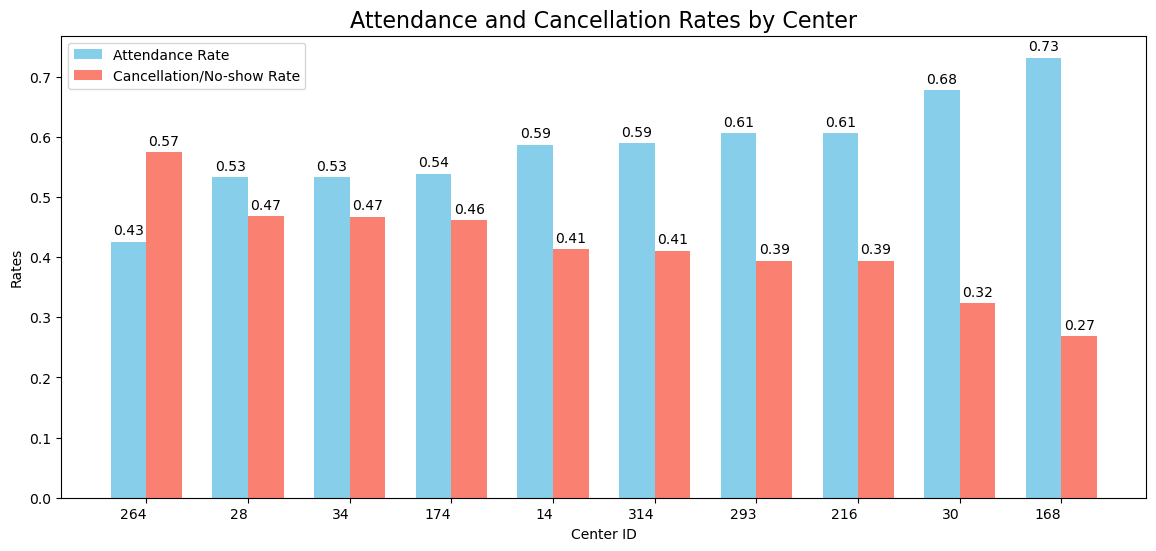

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Define the labels and the positions for the groups
centers = attendance_rate_sorted.index  
x = np.arange(len(centers))  # the label locations
width = 0.35  # the width of the bars

# Plot the bars for attendance and cancellation/no-show rates
rects1 = ax.bar(x - width/2, attendance_rate_sorted['Attendance Rate'], width, label='Attendance Rate', color='skyblue')
rects2 = ax.bar(x + width/2, attendance_rate_sorted['Cancellation/No-show Rate'], width, label='Cancellation/No-show Rate', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Center ID')
ax.set_ylabel('Rates')
ax.set_title('Attendance and Cancellation Rates by Center', fontsize = 16)
ax.set_xticks(x)
ax.set_xticklabels(centers, ha='right')  # Rotate labels for better visibility if needed
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Explicitly disable gridlines
ax.grid(False)
# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

# Show the


In [26]:
# Correctly sum 'Total2' for 'ATTENDED' status for attendance counts across age groups
attendance_by_age = attended_df[['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']].sum()

# Correctly sum 'Total2' for 'CANCELLED' and 'NO SHOW' for cancellation counts across age groups
cancelled_no_show_df = timetable_class_data_clean[timetable_class_data_clean['participation_status'].isin(['CANCELLED', 'NO SHOW'])]
cancellations_by_age = cancelled_no_show_df[['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']].sum()

# Sum 'Total2' for all booking statuses to get total bookings by age group, corrected to include all records
total_bookings_by_age = timetable_class_data_clean[['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']].sum()

# Calculate attendance rates by dividing attendance counts by total bookings for each age group
attendance_rate_per_age_group = attendance_by_age / total_bookings_by_age

# Calculate cancellation rates by dividing cancellation counts by total bookings for each age group
cancellation_rate_per_age_group = cancellations_by_age / total_bookings_by_age

print("Attendance Rates by Age Demographic:")
for age_group in attendance_rate_per_age_group.index:
    print(f"{age_group}: {attendance_rate_per_age_group[age_group]:.2f}")

print("\nCancellation Rates by Age Demographic:")
for age_group in cancellation_rate_per_age_group.index:
    print(f"{age_group}: {cancellation_rate_per_age_group[age_group]:.2f}")

Attendance Rates by Age Demographic:
age_16_17: 0.49
age_18_22: 0.53
age_23_28: 0.51
age_29_34: 0.52
age_35_44: 0.53
age_over_45: 0.55

Cancellation Rates by Age Demographic:
age_16_17: 0.46
age_18_22: 0.42
age_23_28: 0.45
age_29_34: 0.43
age_35_44: 0.43
age_over_45: 0.40


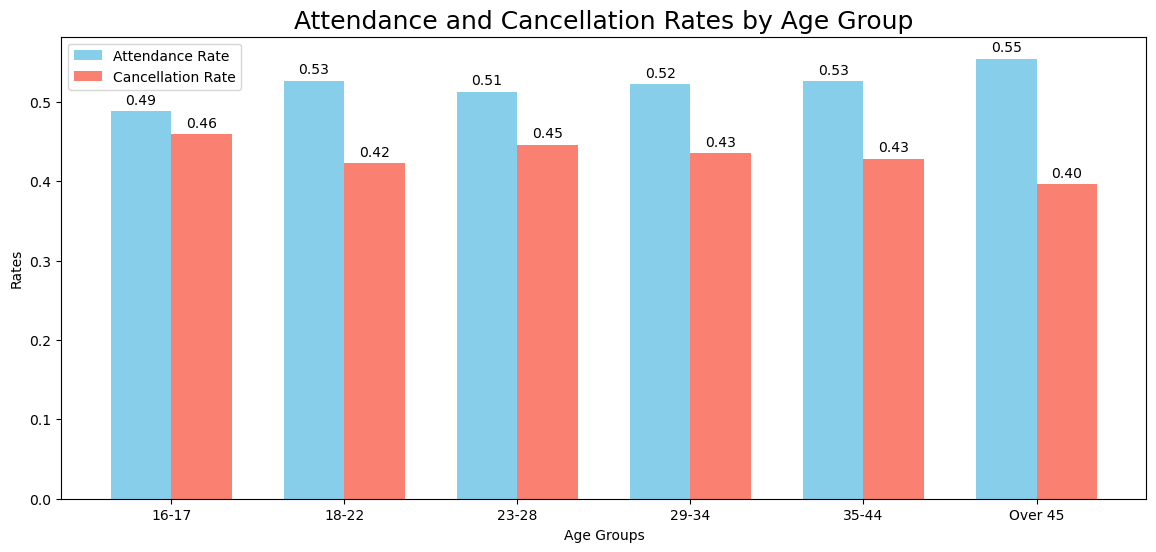

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 6))

# Define the labels and the positions for the groups
age_groups = ['16-17', '18-22', '23-28', '29-34', '35-44', 'Over 45']
x = np.arange(len(age_groups))  # the label locations
width = 0.35  # the width of the bars

# Plot the bars for attendance and cancellation rates
rects1 = ax.bar(x - width/2, attendance_rate_per_age_group, width, label='Attendance Rate', color='skyblue')
rects2 = ax.bar(x + width/2, cancellation_rate_per_age_group, width, label='Cancellation Rate', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Age Groups')
ax.set_ylabel('Rates')
ax.set_title('Attendance and Cancellation Rates by Age Group', fontsize = 18)
ax.set_xticks(x)
ax.set_xticklabels(age_groups)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Explicitly disable gridlines
ax.grid(False)
# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.show()


In [28]:
# Filter the DataFrame for 'ATTENDED' status and calculate attendance by gender
attended_df = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'ATTENDED']
attendance_by_gender = attended_df[['male', 'female']].sum()

# Filter the DataFrame for 'CANCELLED' and 'NO SHOW' statuses and calculate cancellations by gender
cancelled_no_show_df = timetable_class_data_clean[timetable_class_data_clean['participation_status'].isin(['CANCELLED', 'NO SHOW'])]
cancellations_by_gender = cancelled_no_show_df[['male', 'female']].sum()

# Sum total bookings by gender from the complete DataFrame
total_bookings_by_gender = timetable_class_data_clean[['male', 'female']].sum()

# Calculate attendance rates by dividing attendance counts by total bookings for each gender
attendance_rate_per_gender = attendance_by_gender / total_bookings_by_gender

# Calculate cancellation rates by dividing cancellation counts by total bookings for each gender
cancellation_rate_per_gender = cancellations_by_gender / total_bookings_by_gender

# Print the rates for review
print("Attendance Rates by Gender:")
print(attendance_rate_per_gender)

print("\nCancellation Rates by Gender:")
print(cancellation_rate_per_gender)

Attendance Rates by Gender:
male      0.597661
female    0.523109
dtype: float64

Cancellation Rates by Gender:
male      0.346914
female    0.432027
dtype: float64


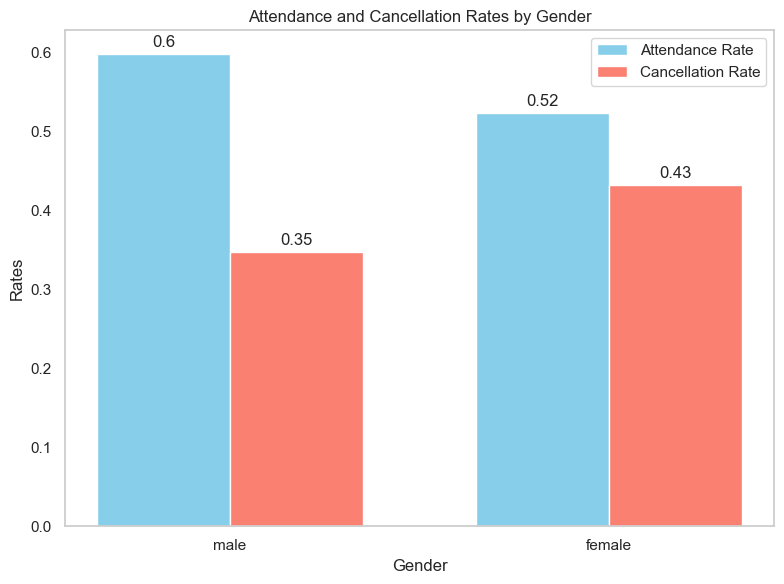

In [107]:
# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(8, 6))

# Define the labels and the positions for the groups
genders = attendance_rate_per_gender.index
x = np.arange(len(genders))  # the label locations
width = 0.35  # the width of the bars

# Plot the bars for attendance and cancellation rates
rects1 = ax.bar(x - width/2, attendance_rate_per_gender, width, label='Attendance Rate', color='skyblue')
rects2 = ax.bar(x + width/2, cancellation_rate_per_gender, width, label='Cancellation Rate', color='salmon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Gender')
ax.set_ylabel('Rates')
ax.set_title('Attendance and Cancellation Rates by Gender')
ax.set_xticks(x)
ax.set_xticklabels(genders)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
# Explicitly disable gridlines
ax.grid(False)
# Call the function to label the bars
autolabel(rects1)
autolabel(rects2)

# Show the plot
plt.tight_layout()  # Adjust layout to fit everything neatly
plt.show()

## <ins> Attendence / Cancellation Rates by Location & Age </ins>

## <ins> Location </ins> 

- **High Engagement:** Location_5 exhibits the highest attendance rate at 72%, indicating strong engagement and potentially high satisfaction among attendees.

- **Varied Engagement:** Locations show varied engagement levels, with Location_3 and Location_7 also showing relatively high attendance rates. In contrast, Location_8 has significantly lower attendance, suggesting potential areas for improvement or differences in offerings, accessibility, or demographics.

- **Cancellation Insights:** Location_8 not only has the lowest attendance rate but also the highest cancellation rate (including 'NO SHOWS'), at 48%. This highlights a challenge in maintaining commitment among members at this location.

- **Low Cancellation Rates:** Location_5, despite having the highest attendance rate, has the lowest cancellation rate at around 20%. This suggests effective management and high member satisfaction.

- **Justification for Including 'NO SHOWS':** Including 'NO SHOWS' in cancellation rates offers a fuller picture of member commitment and potential barriers to attendance. It recognizes that not attending, regardless of whether a cancellation was formally made, reflects on the overall engagement and operational efficiency.

## <ins> Age </ins>

- **Age Group Engagement:** The oldest age group (over 45) shows the highest attendance rate, indicating strong engagement among this demographic. This could reflect a committed core of members who prioritize fitness.
- **Youth Engagement:** The 16-17 age group, despite being the least engaged in terms of attendance, still shows a significant rate of participation.

- **Cancellation Trends by Age:** Younger age groups show higher cancellation rates (including 'NO SHOWS'), which might reflect varying commitment levels or competing priorities. The inclusion of 'NO SHOWS' as cancellations recognizes that failing to attend impacts resource allocation and planning.

## <ins> Summary </ins>

- Analyzing attendance rates by location and age demographic, alongside considering cancellation rates—including 'NO SHOWS'—offers critical insights that can significantly impact the rescheduling of timetable classes. 

## 3.1.3 - Correlation of Attendance with Time of Day / Day of week

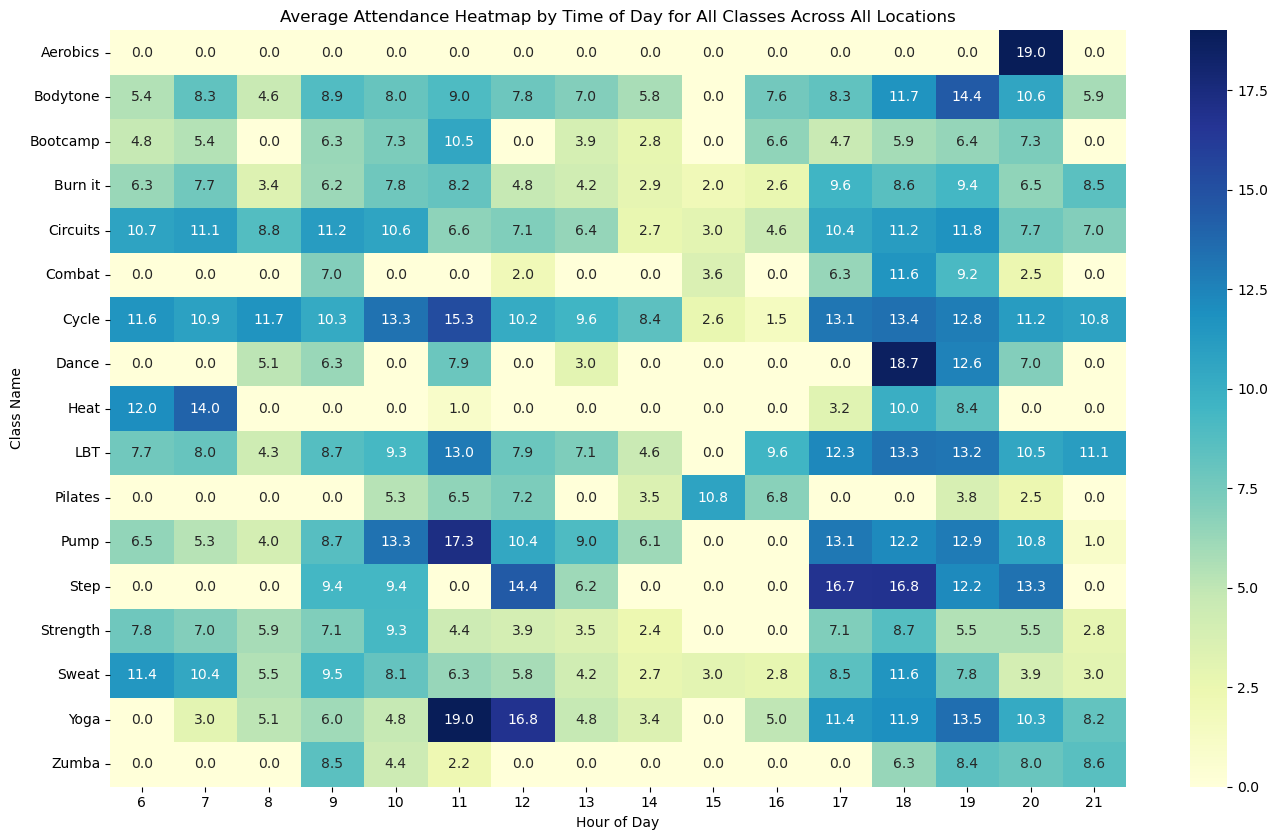

In [30]:
def prepare_data(timetable_class_data_clean):
    # Filter DataFrame for 'ATTENDED' status
    df_attended_all_location = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'ATTENDED']

    # Convert 'start_date_time' to datetime and extract the hour
    df_attended_all_location['start_date_time'] = pd.to_datetime(df_attended_all_location['start_date_time'])
    df_attended_all_location['hour_of_day'] = df_attended_all_location['start_date_time'].dt.hour

    # Pivot the data to get 'standardized_class_name' on one axis and 'hour_of_day' on the other
    # Use 'Total2' for counting attendance, changing aggregation to mean
    heatmap_data_all_location = df_attended_all_location.pivot_table(values='Total2', index='standardized_class_name', 
                                            columns='hour_of_day', aggfunc='mean', fill_value=0)

    return heatmap_data_all_location

def plot_heatmap(heatmap_data_all_location):
    plt.figure(figsize=(14, len(heatmap_data_all_location.index) * 0.5))  # Adjust the figure height dynamically based on number of classes
    sns.heatmap(heatmap_data_all_location, annot=True, fmt='.1f', cmap="YlGnBu")
    plt.title('Average Attendance Heatmap by Time of Day for All Classes Across All Locations')
    plt.xlabel('Hour of Day')
    plt.ylabel('Class Name')
    plt.tight_layout()  # Adjust the layout
    plt.show()

# Generate and print the visualization
heatmap_data_all_location = prepare_data(timetable_class_data_clean)
plot_heatmap(heatmap_data_all_location)

## <ins> Mean Attendence of all classes across all locations</ins>

- **Popular Times:** Certain classes, like "Cycle" and "Sweat," seem to have consistently higher attendance throughout their scheduled hours, suggesting they are popular choices.

- **Peaks and Troughs:** Some classes, like "Pump" and "LBT," show peak attendance at specific hours (like midday for "Pump" and later in the day for "LBT"), indicating preferred times for those activities.

- **Underutilised Slots:** Several classes, such as "Aerobics," "Combat," "Dance," and "Zumba," have hours with zero attendance, which might be an indicator of either scheduling issues or lack of interest during those times.

- **Evening Activity:** There is a trend of increased evening attendance for several classes, which could reflect members' availability after work hours.

- **Morning Activity:** Classes like "Heat" and "Yoga" have higher numbers in the morning sessions, suggesting a preference for starting the day with these activities.

- **Potential Overcrowding:** Certain hours for classes like "Pump" show high attendance, which might raise concerns about space and equipment availability or class quality due to overcrowding.

- **Low Attendance Classes:** Some classes, such as "Pilates" and "Step" have low attendance across all hours, which may require intervention to understand if it's due to the class's content, timing, or other factors.

- **Daytime Lull:** A general dip in attendance for most classes during midday hours could be expected due to typical workday patterns.

- **Outliers:** There are outliers like a dance class with 20-person attendance at a specific hour, which could be a special event or a highly popular session that may warrant additional similar offerings.

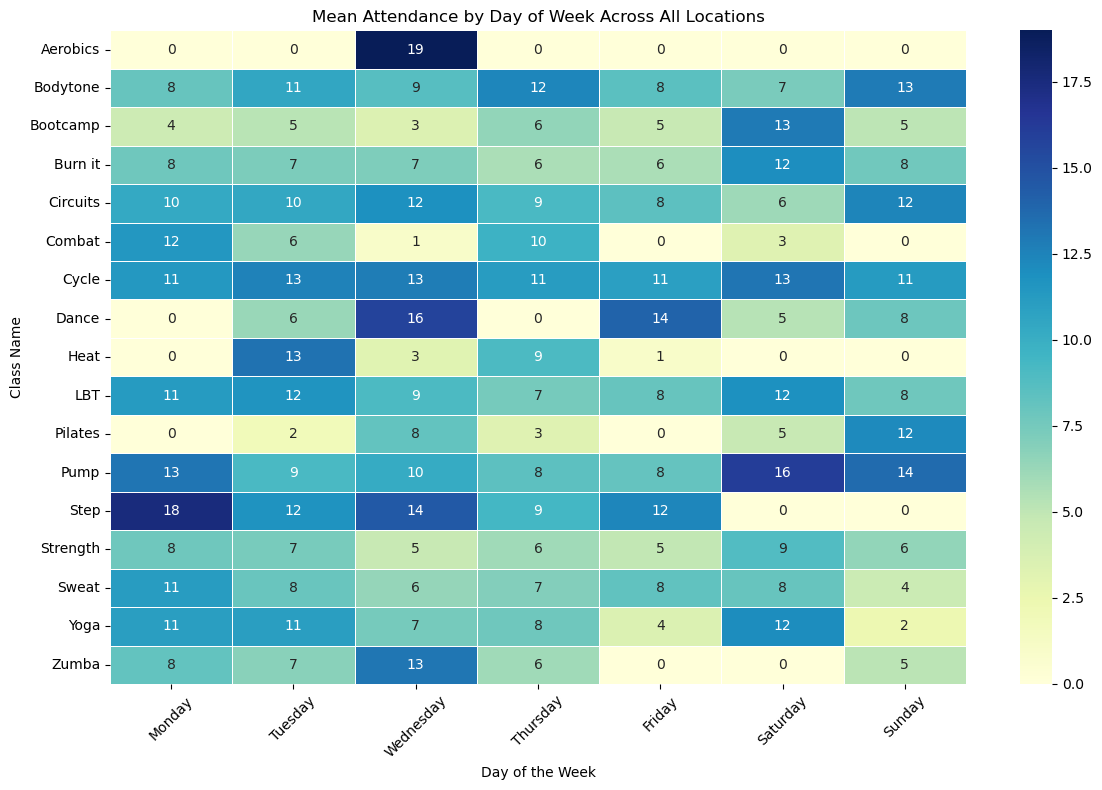

In [31]:
# Ensure 'start_date_time' is a datetime
attended_df['hour_of_day'] = attended_df['start_date_time'].dt.hour
attended_df['day_of_week'] = attended_df['start_date_time'].dt.day_name()

# Group by time of day and day of the week for each class
attendance_time_week = attended_df.groupby(['standardized_class_name', 'hour_of_day', 'day_of_week'])['Total2'].sum().reset_index()

# Map days of the week to numerical values for correct ordering in the heatmap
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
attended_df['day_of_week'] = pd.Categorical(attended_df['day_of_week'], categories=day_order, ordered=True)

# Pivot the data for 'day_of_week' on one axis and 'standardized_class_name' on the other, aggregating by median attendance
heatmap_data_all_locations = attended_df.pivot_table(values='Total2', index='standardized_class_name', 
                                                     columns='day_of_week', aggfunc='mean', fill_value=0)

# Plotting the heatmap for combined locations
plt.figure(figsize=(12, 8))  # Adjust figure size based on the number of classes
sns.heatmap(heatmap_data_all_locations, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
plt.title('Mean Attendance by Day of Week Across All Locations')
plt.xlabel('Day of the Week')
plt.ylabel('Class Name')
plt.xticks(rotation=45)  # Rotate day names for better readability
plt.tight_layout()  # Adjust the layout
plt.show()

## Mean Class Attendance by Day of Week - Insights

- The mean attendance heatmap shows that certain classes are popular on specific days. For instance, 'Aerobics' shows high attendance on Wednesdays, which could be a special mid-week event. Meanwhile, 'Step' and 'Pump' classes have high attendance on Saturdays, suggesting a weekend trend for these activities.

- 'Combat' and 'Dance' classes show an interesting pattern with higher attendance mid-week, possibly indicating that these classes are chosen as mid-week stress relievers.

- Consistent attendance in classes like 'Cycle' and 'LBT' throughout the week suggests a steady demand for these classes.

- Classes like 'Heat' and 'Pilates' have very low or zero attendance on several days, indicating they may not be as popular or well-timed.

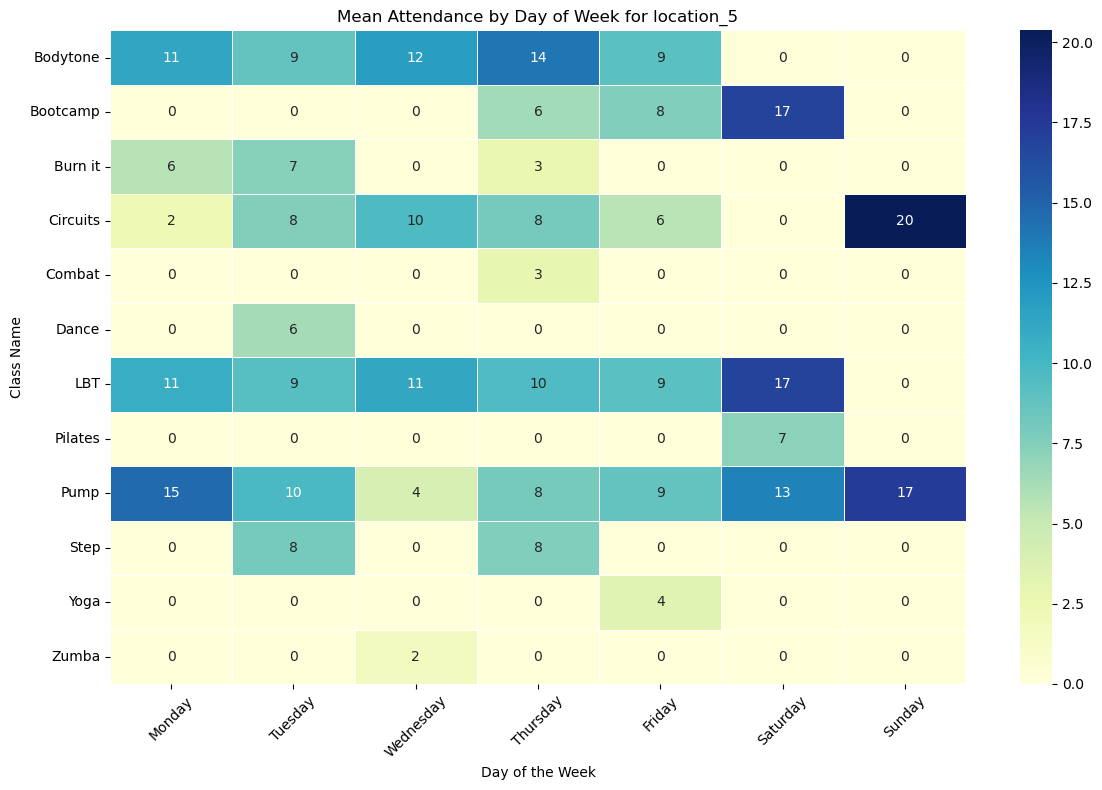

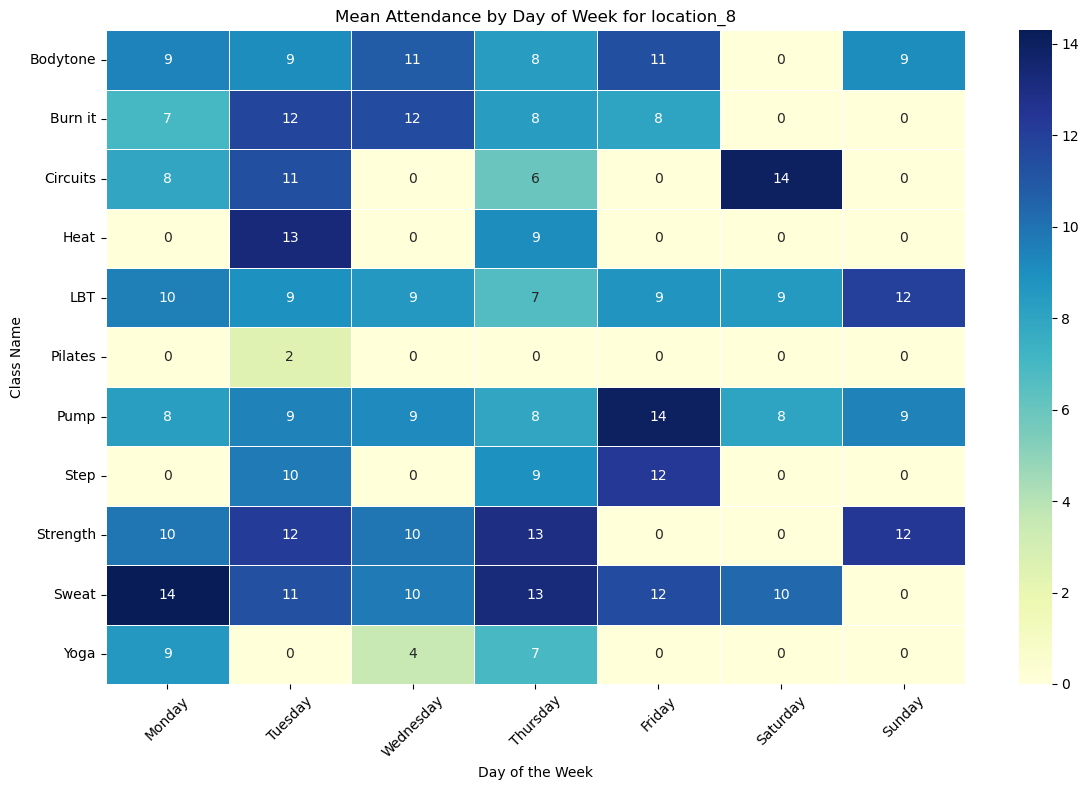

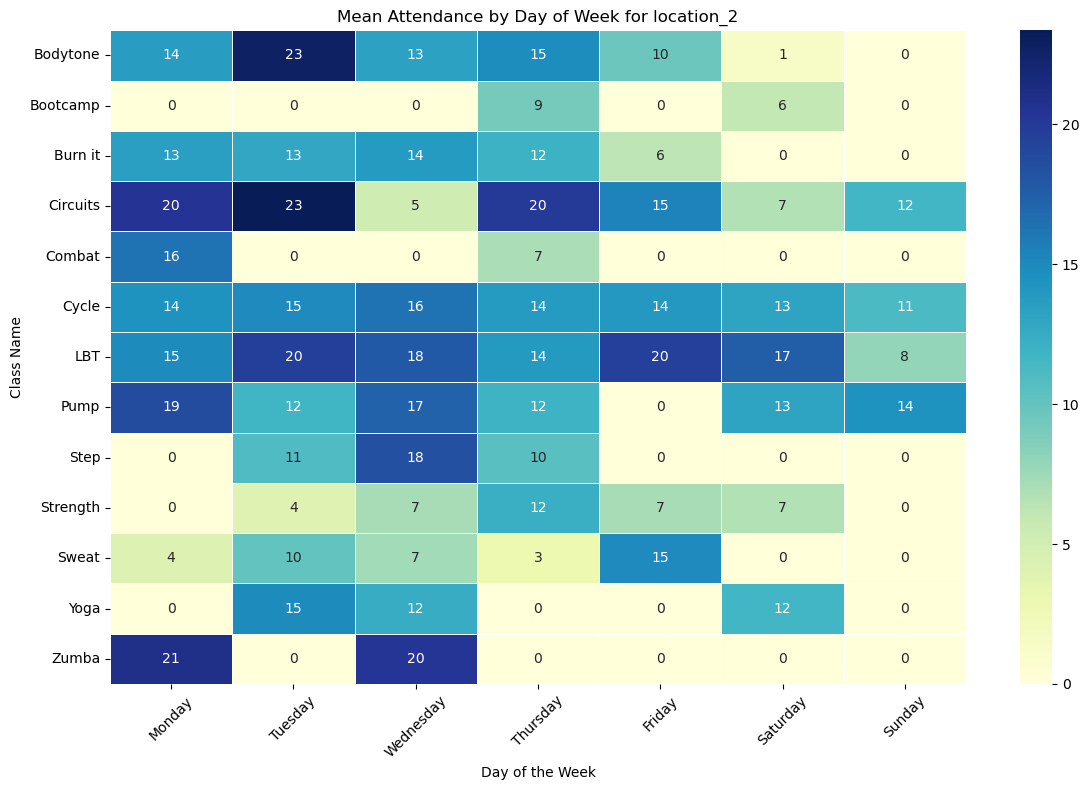

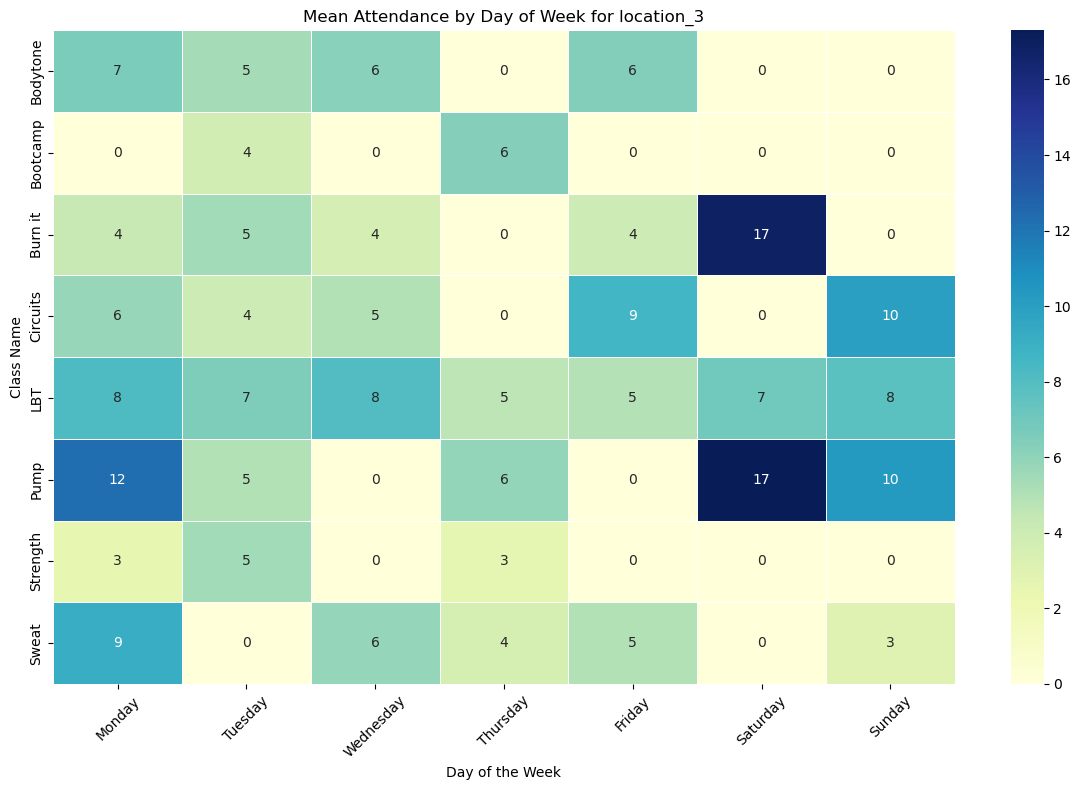

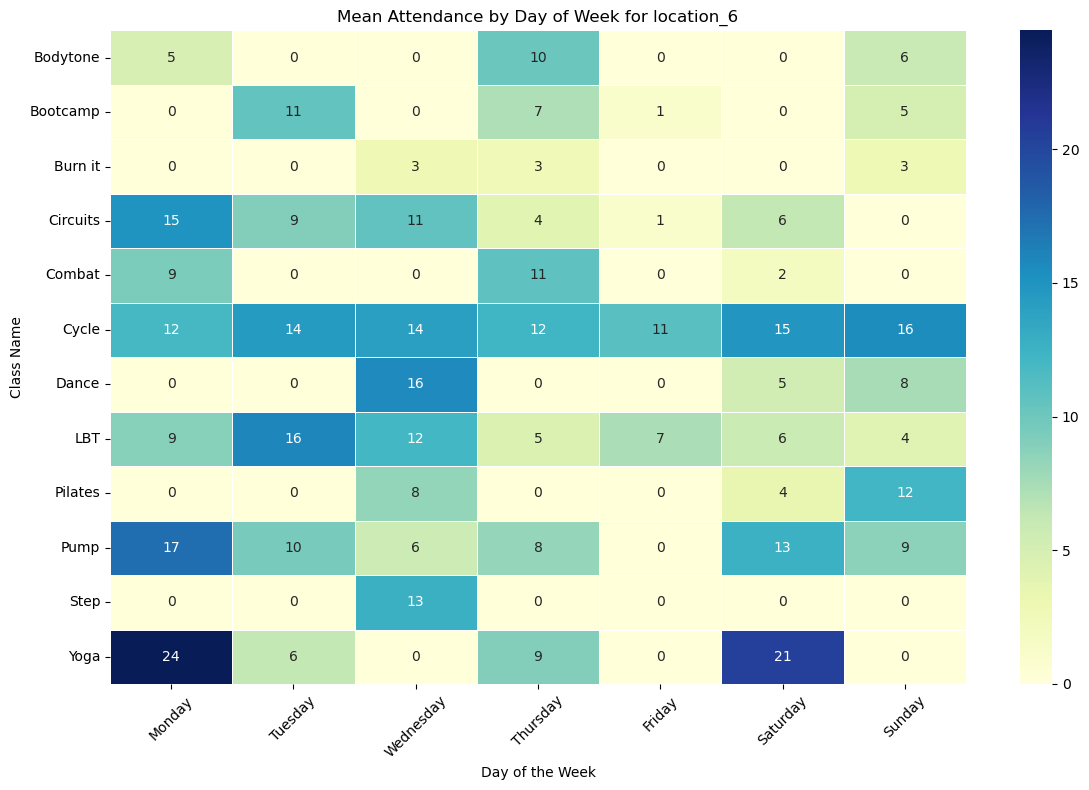

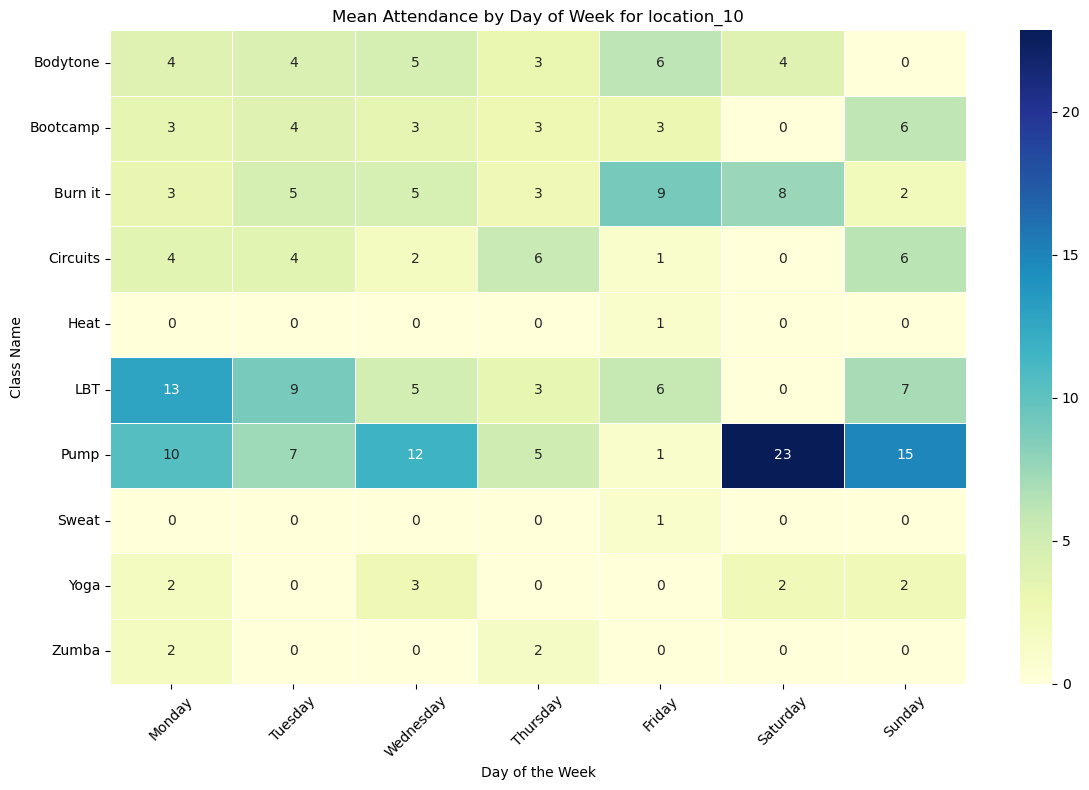

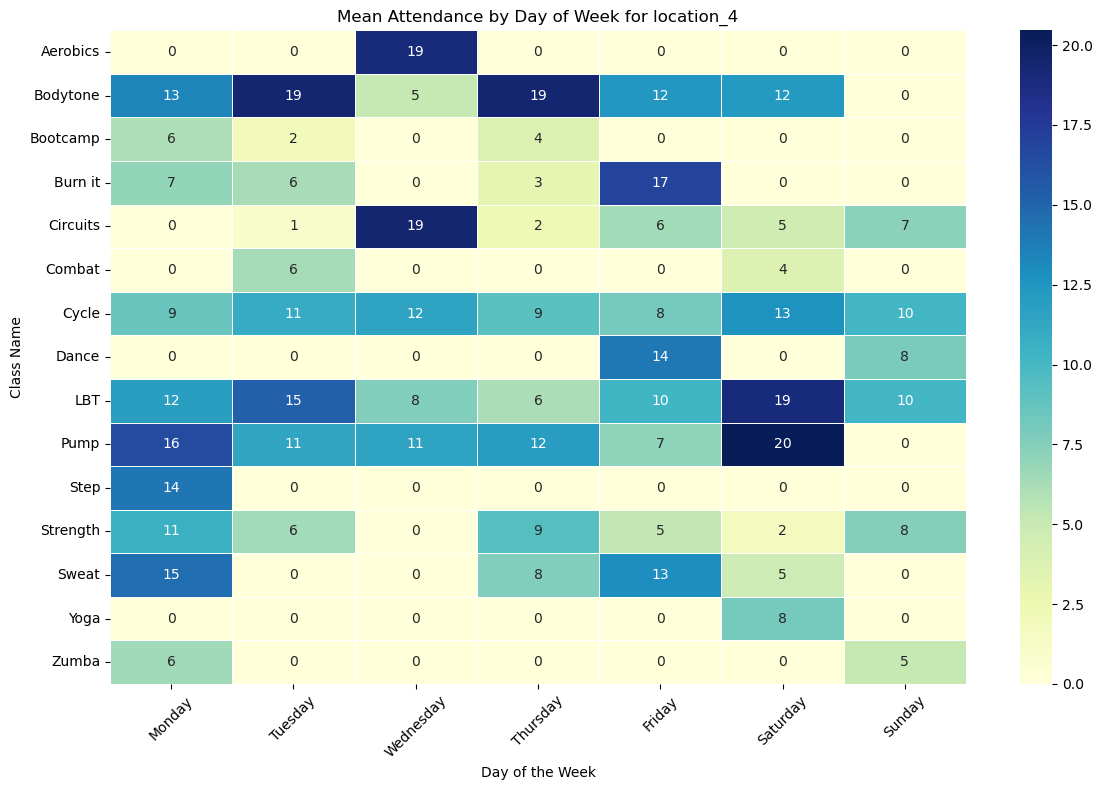

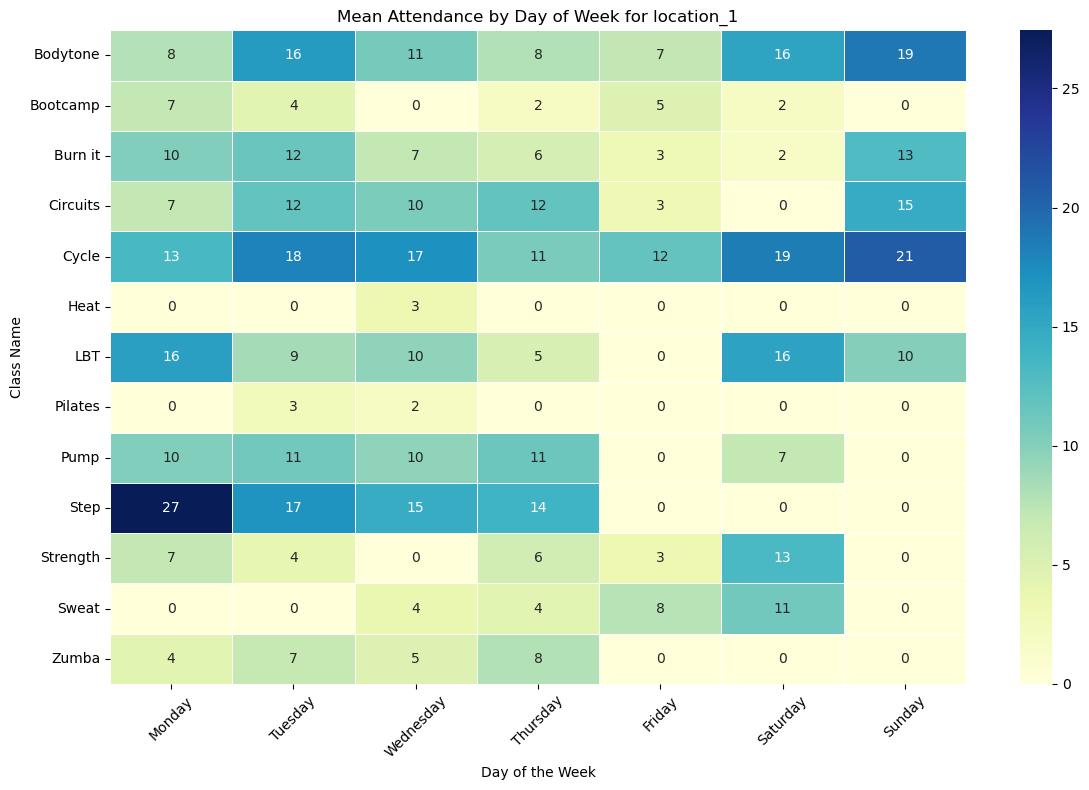

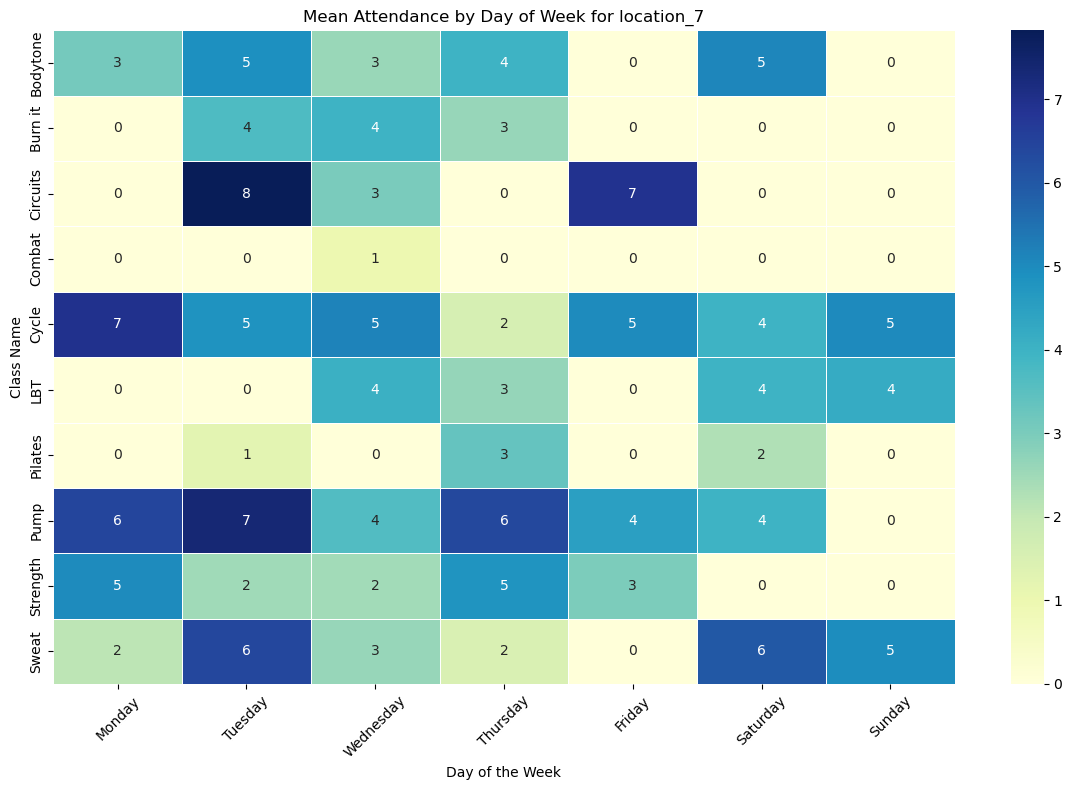

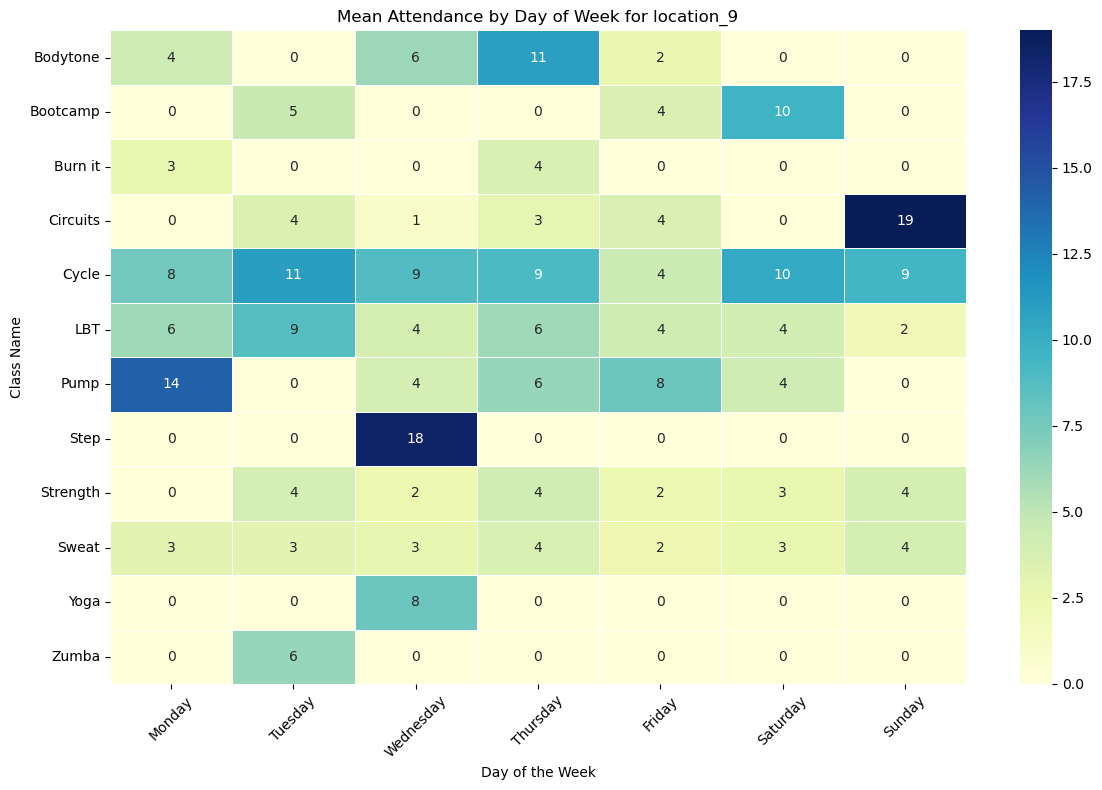

In [32]:
# Assuming 'attended_df' already has 'day_of_week' set up correctly from the previous code block
unique_locations = attended_df['location'].unique()

for loc in unique_locations:
    # Isolate the portion of the DataFrame corresponding to the current location
    location_specific_df = attended_df[attended_df['location'] == loc]

    # For each location, we need to group and then pivot without redefining 'day_of_week'
    # Group by class and day of the week, then get the median 'Total2'
    location_grouped = location_specific_df.groupby(['standardized_class_name', 'day_of_week'])['Total2'].mean().reset_index()

    # Pivot for heatmap, with classes along the rows and days along the columns
    location_heatmap = location_grouped.pivot('standardized_class_name', 'day_of_week', 'Total2').fillna(0)

    # Plot the heatmap for this specific location
    plt.figure(figsize=(12, 8))
    sns.heatmap(location_heatmap, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=.5)
    plt.title(f'Mean Attendance by Day of Week for {loc}')
    plt.xlabel('Day of the Week')
    plt.ylabel('Class Name')
    plt.xticks(rotation=45)  # Rotate day names for better readability
    plt.tight_layout()  # Adjust the layout
    plt.show()

## Mean Class Attendance by Day of Week by Location - Insights

<ins> Best Performing Locations (5, 3, and 7):</ins>

**Location 5:** This location has a strong showing for 'Pump' on Friday and Saturday, 'Bodytone' on Tuesday and Thursday, and 'LBT' on Thursday and Saturday. These indicate key days when scheduling these classes could maximize attendance.

**Location 3:** 'Burn it' is very popular on Saturday, 'Pump' on Friday and Saturday, and 'Circuits' on Thursday. This shows that the end of the week, especially Thursday to Saturday, is critical for high attendance.

**Location 7:** 'Circuit' class on Wednesday and 'Pump' on Thursday seem to be the most popular. The midweek days are crucial here.

<ins> Worst Performing Locations (8, 2, and 4):</ins> 

**Location 8:** There's a lack of strong patterns indicating potential issues with class types, times, or marketing. However, 'Strength' and 'Sweat' have peak attendances on Friday, which could be leveraged.

**Location 2:** High attendance for 'Circuits' and 'Pump' on Thursday and Friday suggests these days have the most potential. However, other days show a lack of 
consistent attendance, suggesting misalignment with member schedules or preferences.

**Location 4:** This location shows very high attendance for 'Bodytone' and 'Pump' on Thursday and for 'Circuit' and 'LBT' on Tuesday, suggesting these are the most effective days for classes.


## 3.1.4 - Patterns That Suggest Optimal Scheduling For Certain Demographics

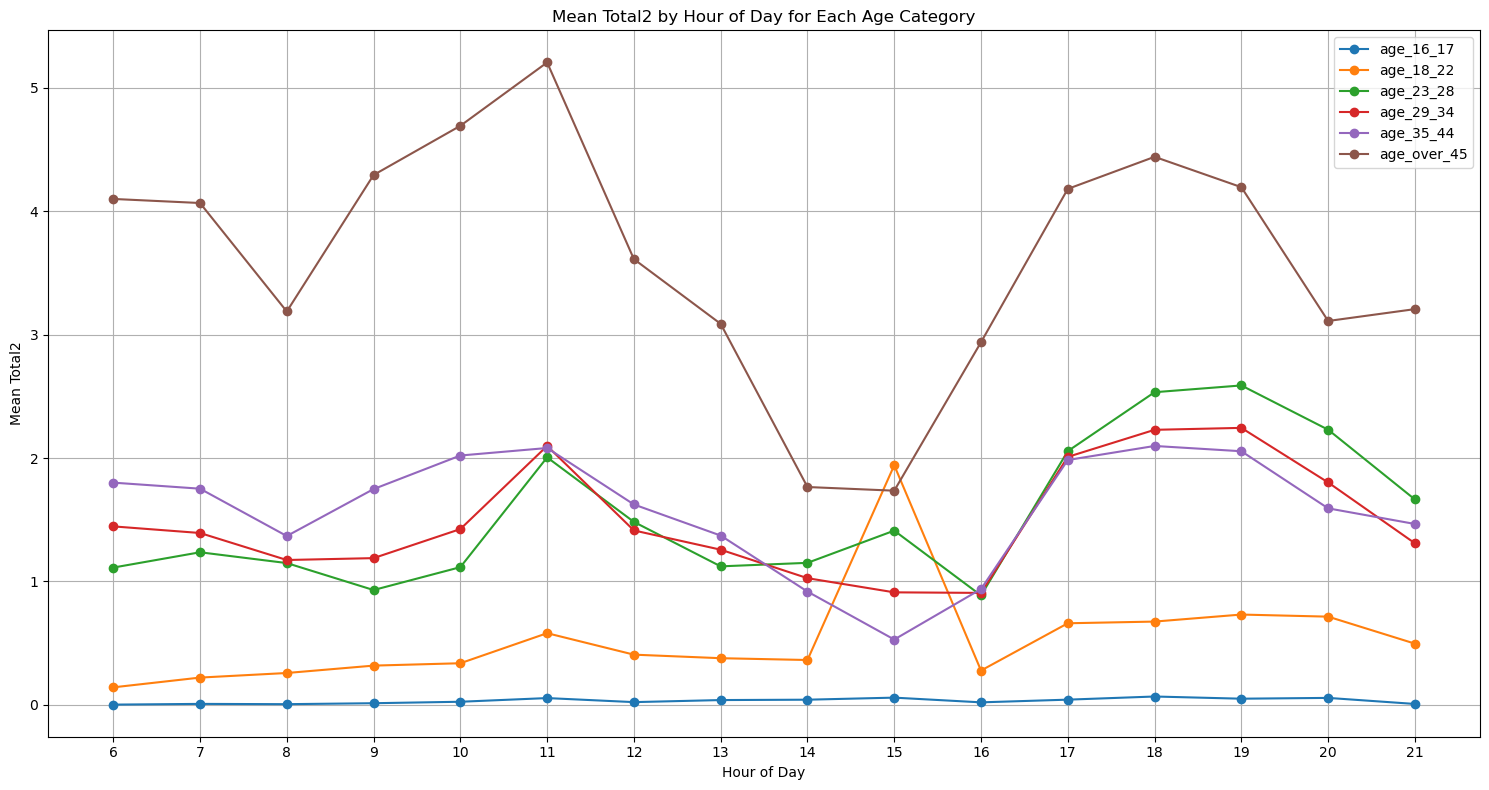

In [33]:
# Filter for rows where the status is 'ATTENDED'
attended_classes = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'ATTENDED']

# Extract the hour of day from the 'start_date_time' column
attended_classes['hour_of_day'] = pd.to_datetime(attended_classes['start_date_time']).dt.hour

# We'll create a dictionary to store the mean 'Total2' values for each age category
age_categories = ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']
means_by_hour_and_age = {age: [] for age in age_categories}
hours = sorted(attended_classes['hour_of_day'].unique())

# Calculate the mean 'Total2' for each age category across different hours
for hour in hours:
    hourly_data = attended_classes[attended_classes['hour_of_day'] == hour]
    for age in age_categories:
        means_by_hour_and_age[age].append(hourly_data[age].mean())

# Now we'll plot these means for each age category across different hours
plt.figure(figsize=(15, 8))
for age in age_categories:
    plt.plot(hours, means_by_hour_and_age[age], marker='o', label=age)

plt.title('Mean Total2 by Hour of Day for Each Age Category')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Total2')
plt.xticks(hours)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Mean Age Demographic Split for Time of Day - Insights

**Younger Age Groups (16-17 & 18-22):**

- The attendance for these groups is generally lower during regular working or school hours (9 AM to 3 PM).

- There’s a notable increase in attendance after 3 PM, peaking around 4 PM for the 16-17 age group, indicating that classes right after school hours are ideal for this demographic.

- For the 18-22 group, attendance rises again around 6-7 PM, which might be post-college or post-work sessions.

**Working Professional Groups (23-28 & 29-34):**

- These groups show modest attendance in the morning, with a slight rise around 7-8 AM, suggesting they might prefer classes before heading to work.

- There is a significant drop during typical working hours (9 AM to 5 PM).

- A sharp increase in attendance occurs from 5 PM to 7 PM, with the peak at around 6 PM. This indicates the post-work hours are optimal for scheduling classes for these demographics.

**Middle-aged Groups (35-44 & Over 45):**

- The attendance is relatively low in the early morning but starts to increase from 9 AM, peaking around 10 AM for the 35-44 age group. This could be after taking children to school or starting work later.

- For those over 45, the peak is also at 10 AM, suggesting that mid-morning classes are popular with this demographic.

- Both age groups have another attendance peak around 6 PM, aligning with the conclusion that early evening sessions are ideal for working adults.

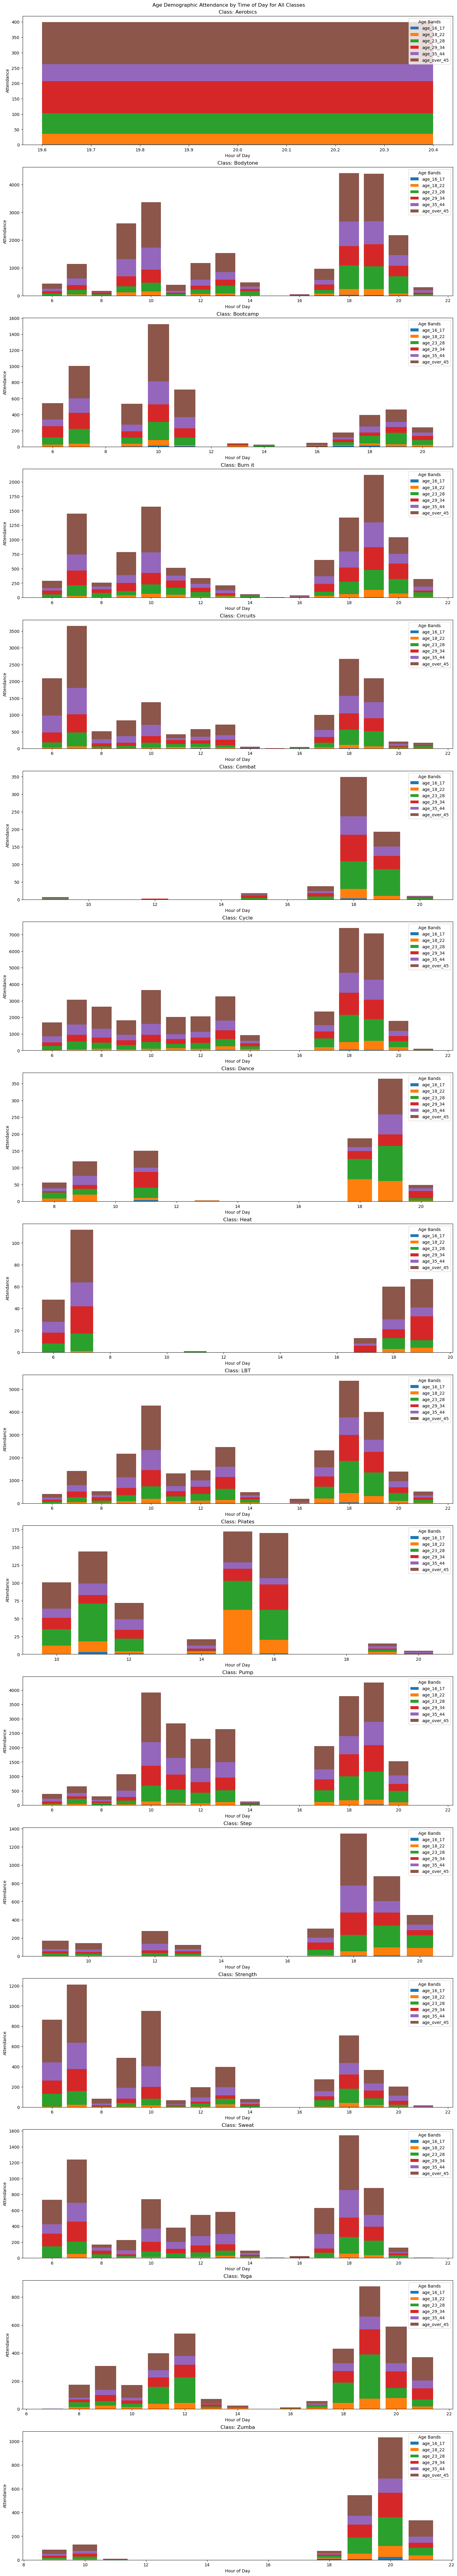

In [34]:
# Define age bands once at the global scope
age_bands = ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']

def prepare_class_hourly_demographics(timetable_class_data_clean):
    # Filter for 'ATTENDED'
    df_filtered = timetable_class_data_clean[
        (timetable_class_data_clean['participation_status'] == 'ATTENDED')
    ]
    
    # Convert 'start_date_time' and extract the hour
    df_filtered['start_date_time'] = pd.to_datetime(df_filtered['start_date_time'])
    df_filtered['hour_of_day'] = df_filtered['start_date_time'].dt.hour

    # Aggregate attendance counts by class, hour, and age band
    df_hourly_demographics = df_filtered.groupby(['standardized_class_name', 'hour_of_day'])[age_bands].sum().reset_index()

    return df_hourly_demographics

def plot_class_hourly_demographics(df_hourly_demographics):
    # Get unique classes
    unique_classes = df_hourly_demographics['standardized_class_name'].unique()
    num_classes = len(unique_classes)

    # Create subplots
    fig, axes = plt.subplots(num_classes, 1, figsize=(15, num_classes * 5), constrained_layout=True)
    if num_classes == 1:  # If there's only one class, axes will not be an array
        axes = [axes]

    # Plot for each class
    for ax, class_name in zip(axes, unique_classes):
        class_data = df_hourly_demographics[df_hourly_demographics['standardized_class_name'] == class_name]
        class_data = class_data.set_index('hour_of_day').sort_index()
        
        bottom_value = np.zeros(len(class_data))
        for age_band in age_bands:
            ax.bar(
                class_data.index, 
                class_data[age_band], 
                bottom=bottom_value, 
                label=age_band
            )
            bottom_value += class_data[age_band].values

        ax.set_title(f'Class: {class_name}')
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel('Attendance')
        ax.legend(title='Age Bands')

    plt.suptitle(f'Age Demographic Attendance by Time of Day for All Classes')
    plt.show()

# Execute the functions
df_hourly_demographics = prepare_class_hourly_demographics(timetable_class_data_clean)
plot_class_hourly_demographics(df_hourly_demographics)

## Age Demographic Split by Time of Day Across Classes

**1) Peak Hours and Age Groups:**
- There are clear peak times where attendance is highest. It appears that the most popular times across various classes are during the late afternoon and early evening, roughly between 16:00 (4 PM) and 20:00 (8 PM). During these times, the age groups that are most prevalent seem to vary depending on the class type.

**2) Age Demographics:**
- The age group of 18-22 seems particularly active in classes labeled as "Cycle" and "Dance" in the late afternoon to evening.
- The age group over 45 shows a consistent presence in early morning classes, especially in "Cycle" and "Bodytone" classes around 6:00 (6 AM).
- Younger age groups (16-17 and 18-22) tend to participate more in the evening classes, possibly due to school or college schedules.

**3) Class Types:**
- High-energy classes like "Cycle" and "Combat" are popular among younger demographics, especially in the evening hours.
- Classes like "Pilates" and "Yoga" seem to attract a broader age range and might benefit from being scheduled in both morning and evening slots to cater to different schedules.

**4) Low Attendance:**
- Some classes like "Heat" and "LBT" show relatively low attendance across all age groups and might need to be re-evaluated or re-scheduled, perhaps to times where there's a gap in the schedule and no competing classes.

**5) Optimal Scheduling:**
- Considering that younger demographics (16-34) are attending evening classes in larger numbers, these should be prioritized during those times for types like "Cycle", "Combat", and "Dance".
- Morning and midday classes might be tailored to fit the schedules of the 35-44 and over-45 age groups, possibly focusing on low-impact or moderate-intensity workouts.

**6) Days of the Week (if applicable):** 
- While the data doesn't specify days of the week, it’s also important to consider that weekdays might have different patterns compared to weekends. Weekends might show a shift towards mid-morning classes being popular across age groups.

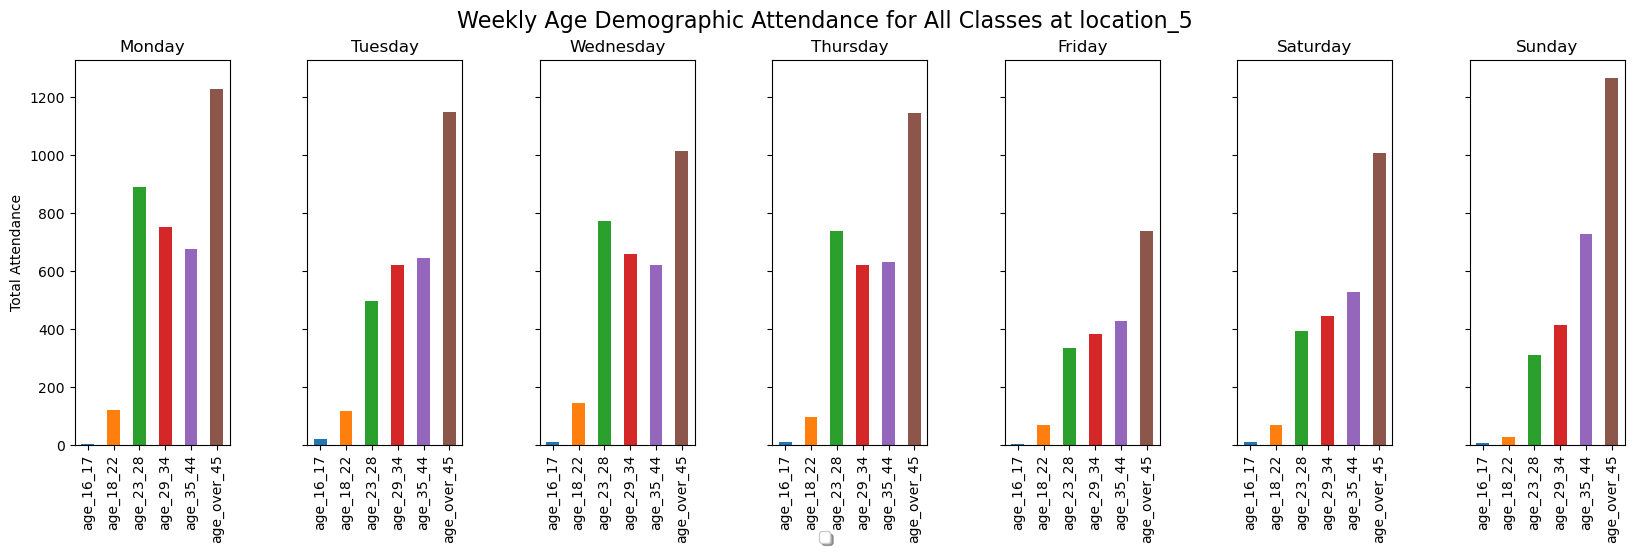

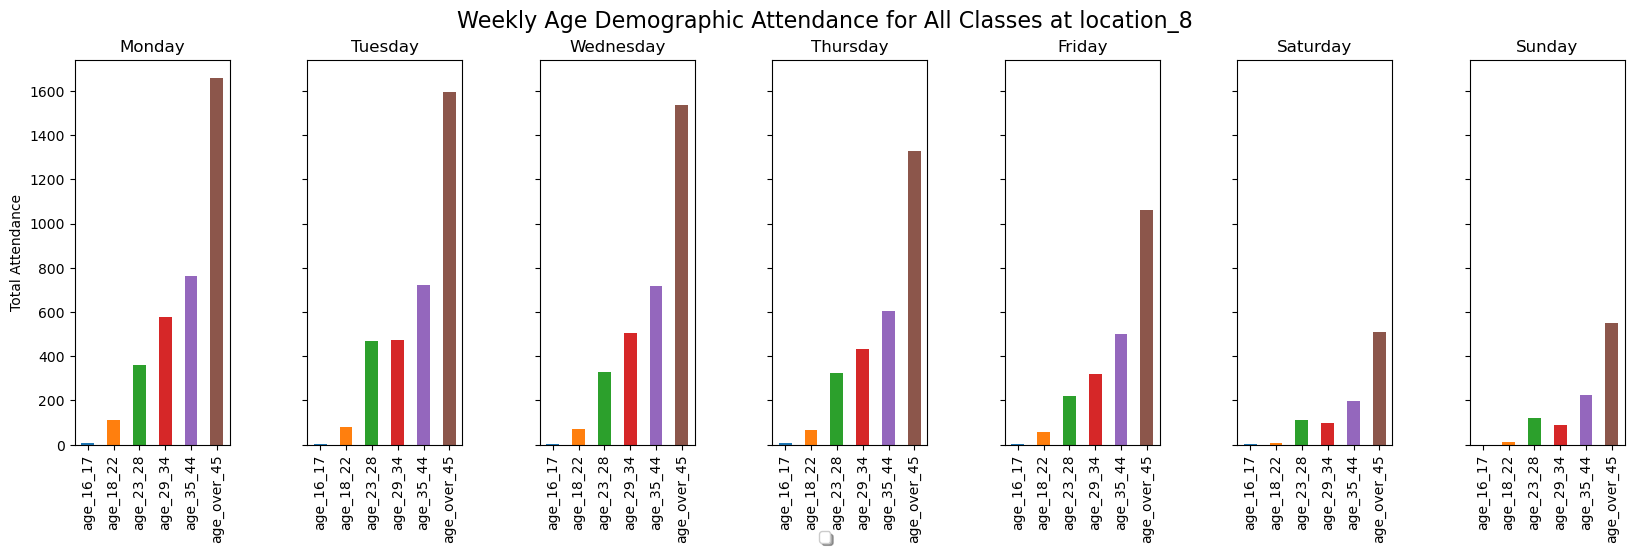

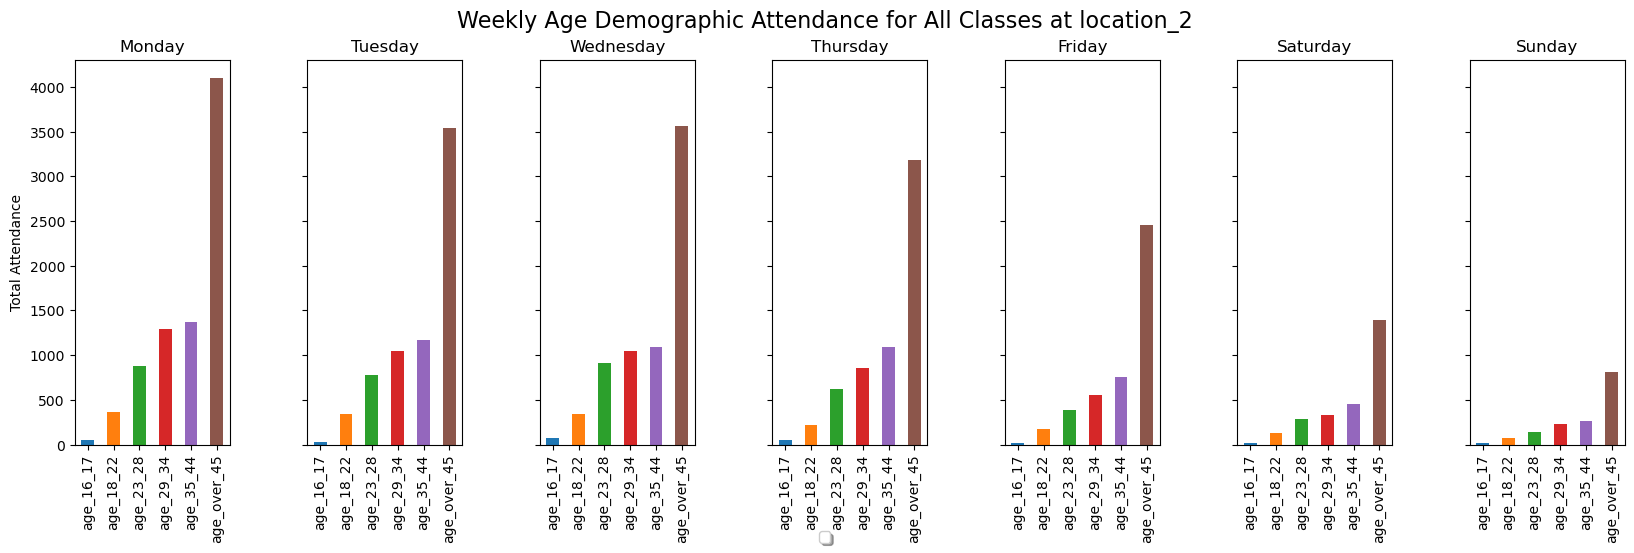

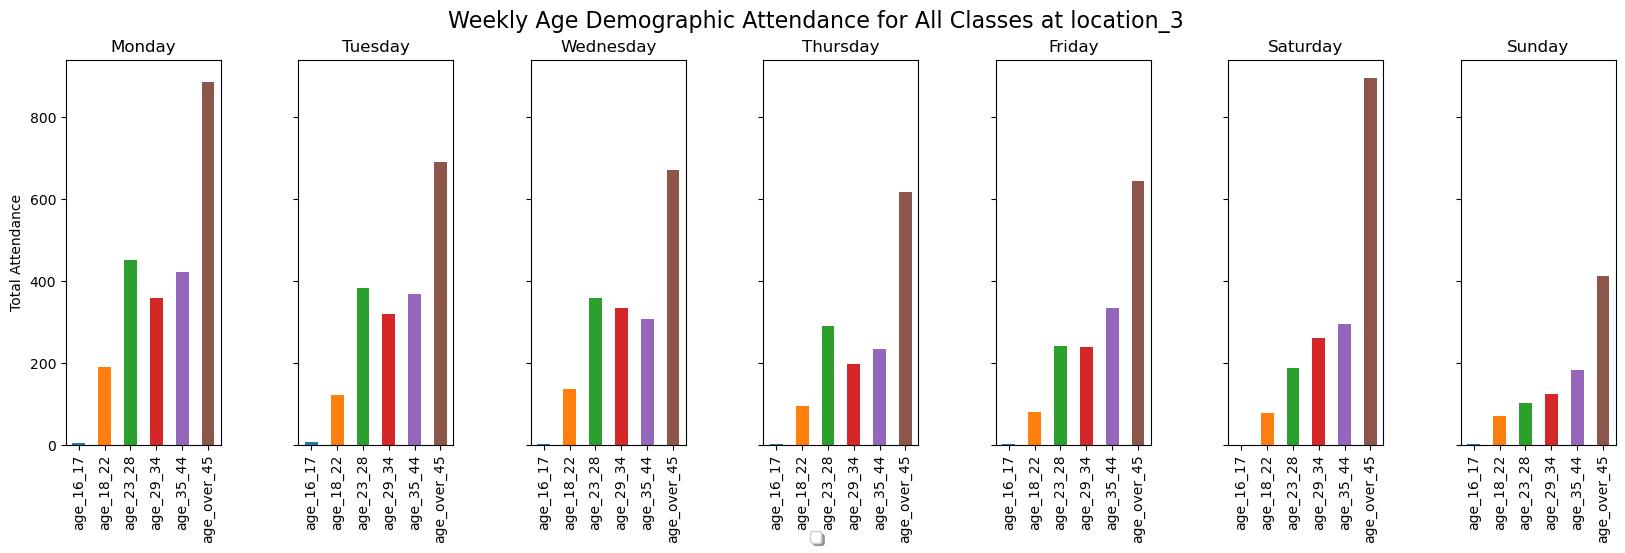

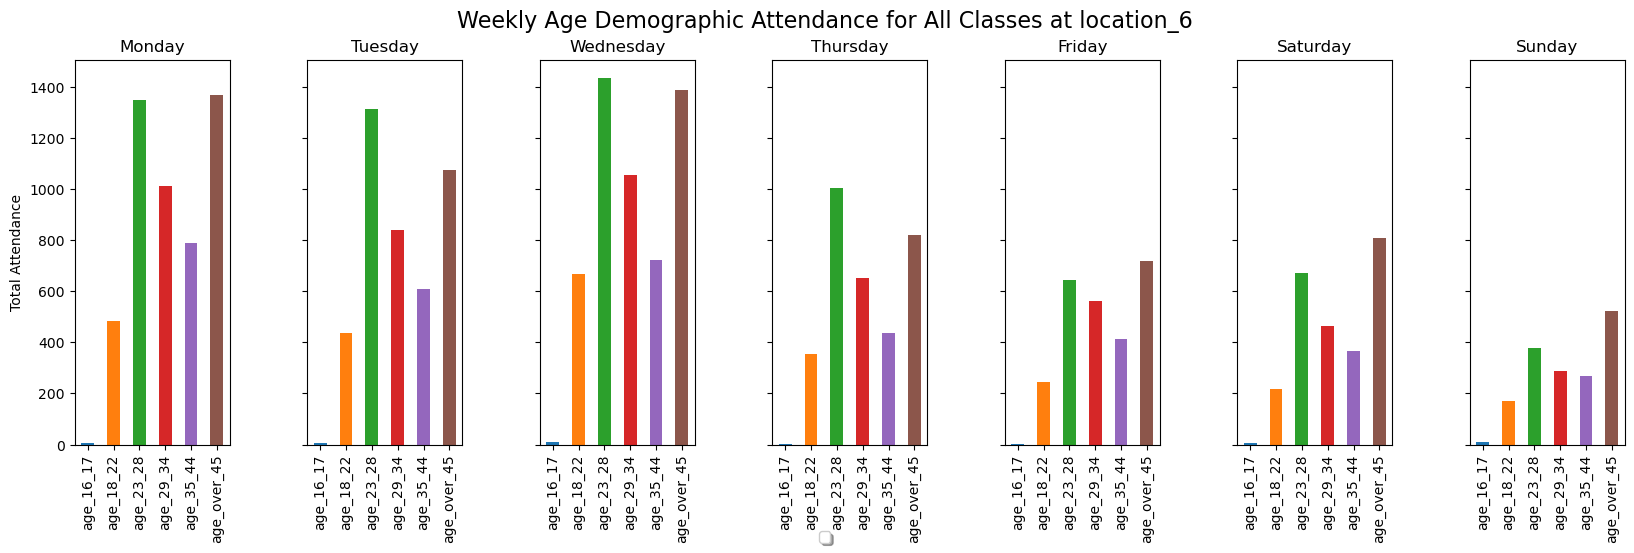

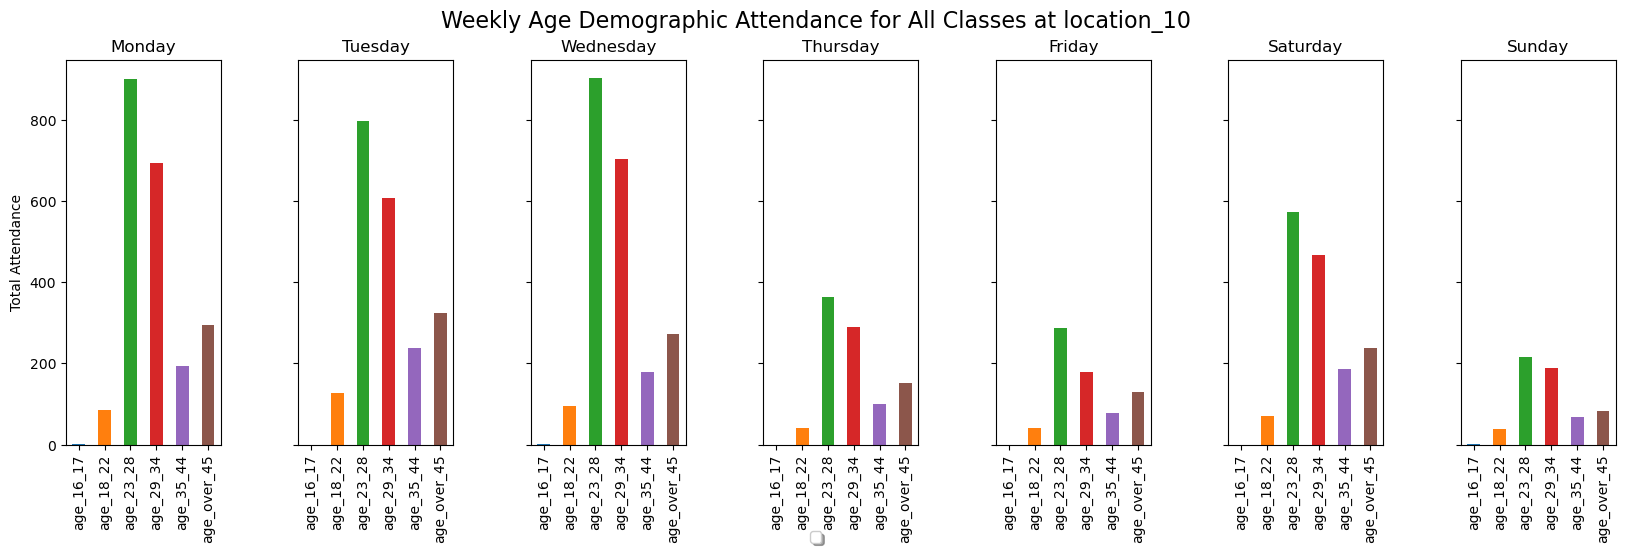

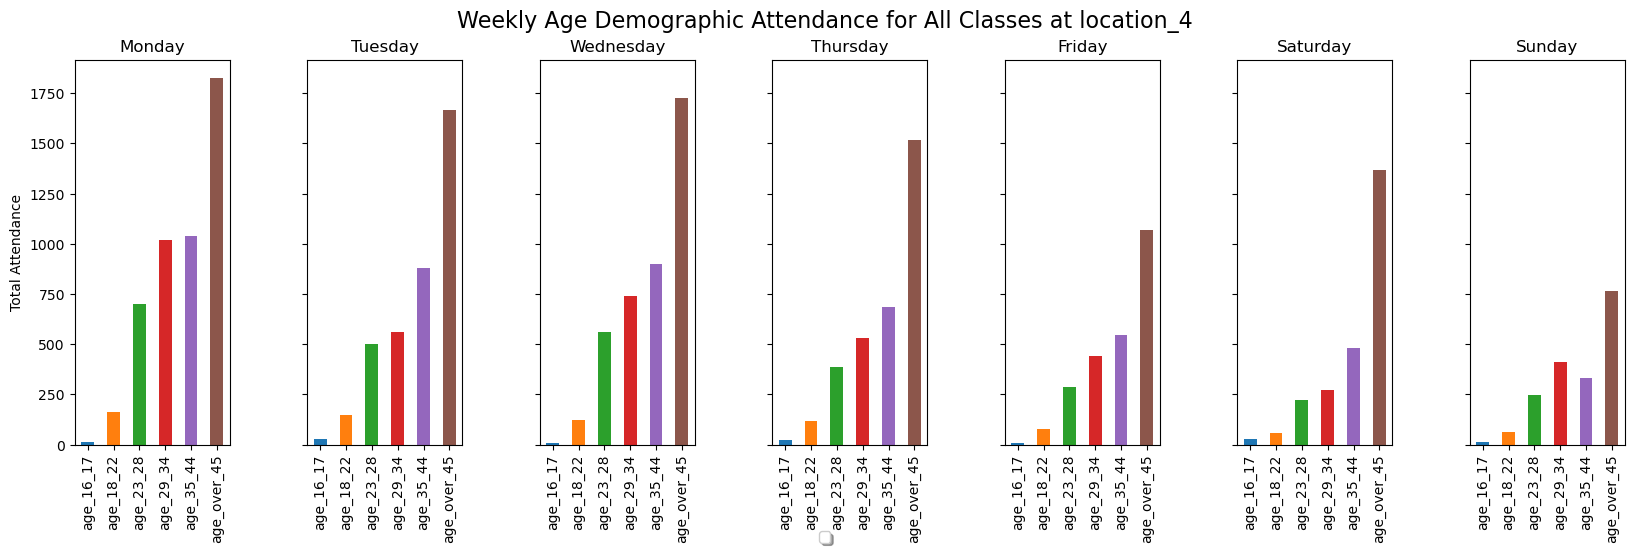

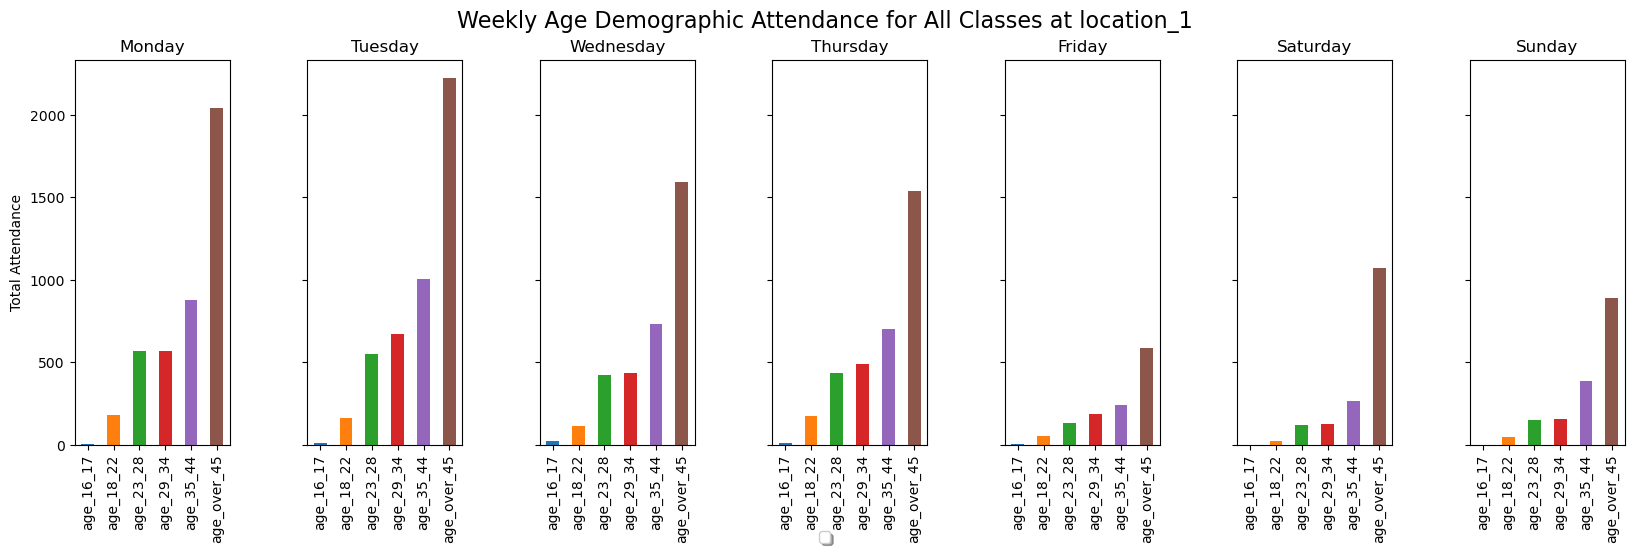

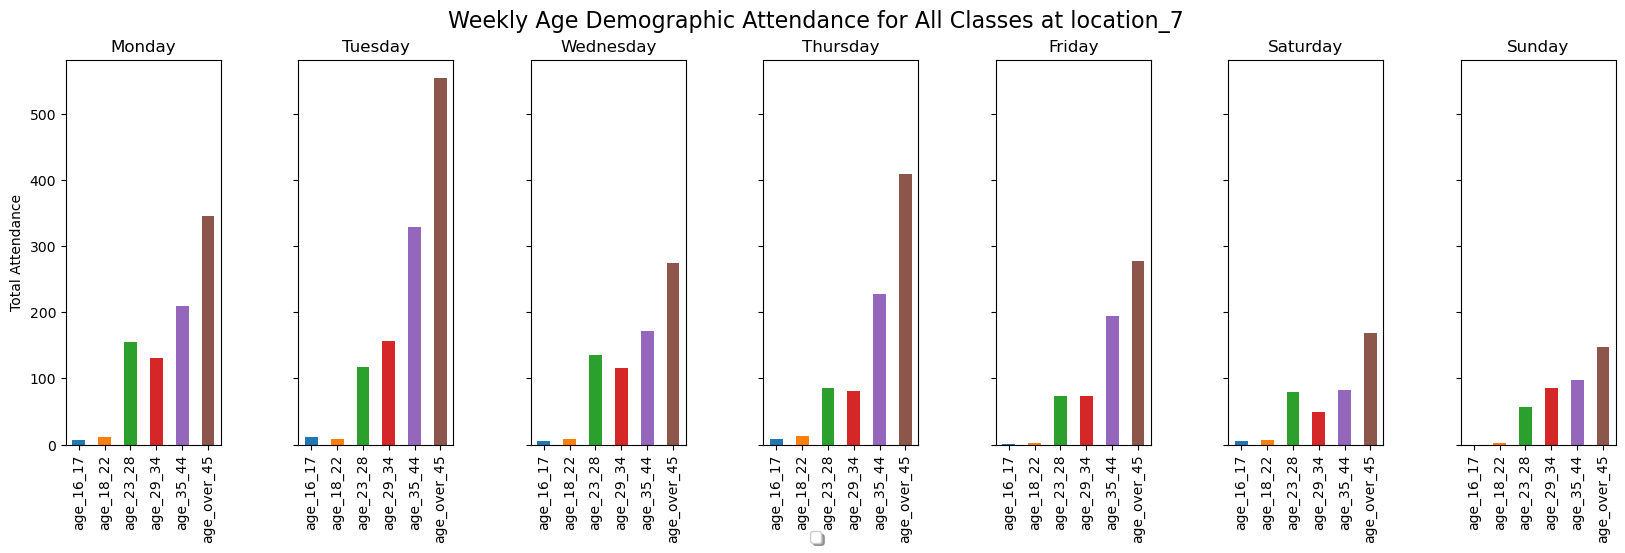

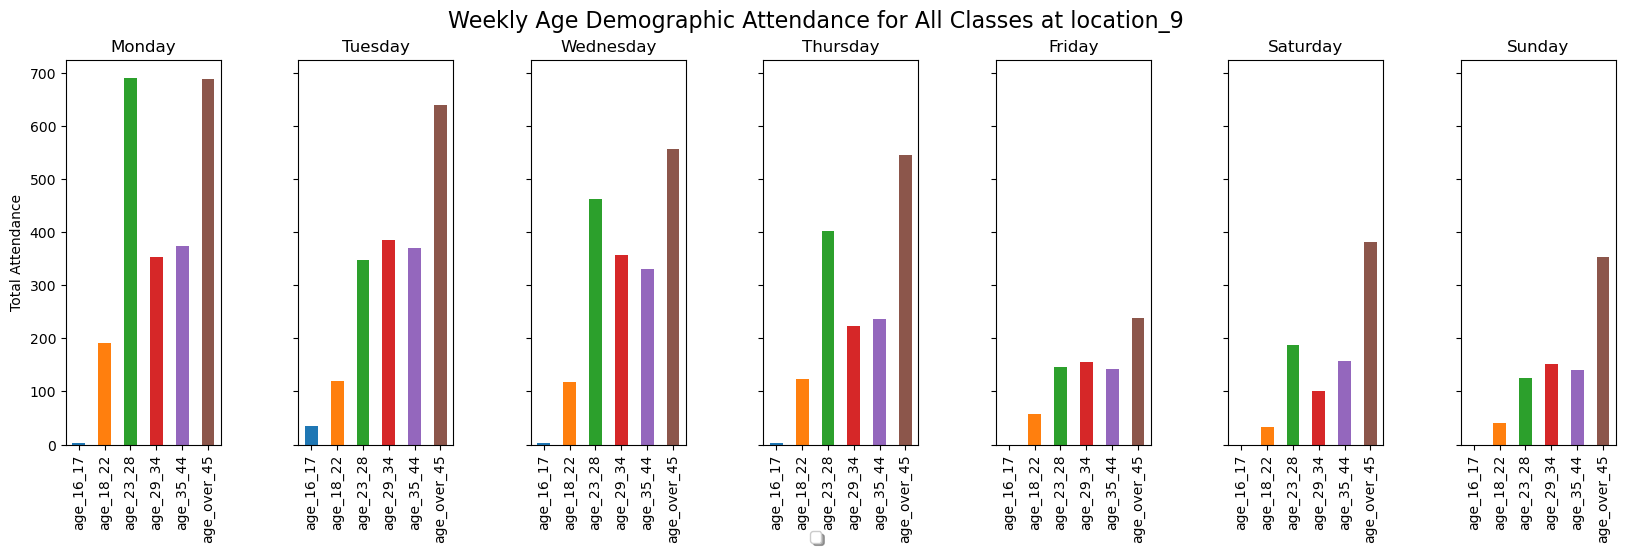

In [35]:
# List of unique locations
locations = attended_df['location'].unique()

# Generate a stacked bar chart for each location, for each day of the week
for location in locations:
    # Create a grid of plots with 1 row for each day
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5), sharey=True)  # Adjust figure size as needed
    
    for i, day in enumerate(day_order):
        # Filter data for location and day
        df_day = attended_df[(attended_df['location'] == location) & (attended_df['day_of_week'] == day)]
        
        # Sum the attendance for all classes
        age_band_totals = df_day[age_bands].sum()
        age_band_totals.plot(kind='bar', stacked=True, ax=axes[i], color=sns.color_palette("tab10", len(age_bands)))
        
        axes[i].set_title(day)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Total Attendance' if i == 0 else '')

    # Improve spacing and layout
    plt.subplots_adjust(wspace=0.5)
    fig.suptitle(f'Weekly Age Demographic Attendance for All Classes at {location}', fontsize=16)
    
    # Add a legend
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=len(age_bands))
    
    plt.show()

## Weekly Age Demographic Attendance for All Classes Across All Locations - Insights

<ins> **High Performing Locations (5, 3, and 7):** </ins>

**1) Consistent High Attendance:**  Locations 5, 3, and 7 show consistently high attendance across all age demographics, particularly in the age groups of 29-34 and 35-44. This suggests that these age groups are key targets for any classes and should have multiple options throughout the week.

**2) Day-Specific Trends:** These locations should look at day-specific trends for each age demographic to refine scheduling. For instance, if the age group 18-22 attends most on Wednesdays, then high-energy, engaging classes that appeal to this demographic should be scheduled for this day.

**3) Variety in Class Types:** Since these locations are performing well, they have the flexibility to offer a variety of class types. Offering a mix of high-intensity and relaxation-focused classes can cater to the broader age range that attends these locations.

<ins> **Lower Performing Locations (8, 2, and 4):** </ins> 

**1) Targeted Class Promotion:** These locations may benefit from targeted promotions to boost attendance on days where certain age groups are lacking. For instance, if there is low attendance on Tuesdays for the age group 29-34, offering discounts or special classes on that day could improve numbers.

**2) Schedule Adjustments:** Based on attendance data, schedules should be adjusted to accommodate the preferences of the most consistent attendees. If the over-45 age group attends more on Mondays and Tuesdays, then ensure that the classes offered on those days are suitable for that demographic.

**3) Weekend Focus:** Weekend attendance is generally lower in these locations. This could imply a need for special weekend events or classes that could draw in higher attendance, possibly family-friendly or special interest classes that are not part of the regular weekday schedule.

<ins> **General Insights for Timetable Refinement:** </ins>

**1) Peak Days for Age Groups:** Identify peak days for each age group and schedule popular classes on these days. For instance, the age group 29-34 seems to have a peak in attendance mid-week, so core classes targeted at this demographic should be scheduled from Tuesday to Thursday.

**2) Weekend Strategy:** Given the lower attendance on weekends at some locations, consider hosting special workshops or less frequent classes that may draw more interest, such as workshops or guest instructors for specific workouts.


## 3.1.5 - Which Classes are Trending in Terms of Attendance Over Time

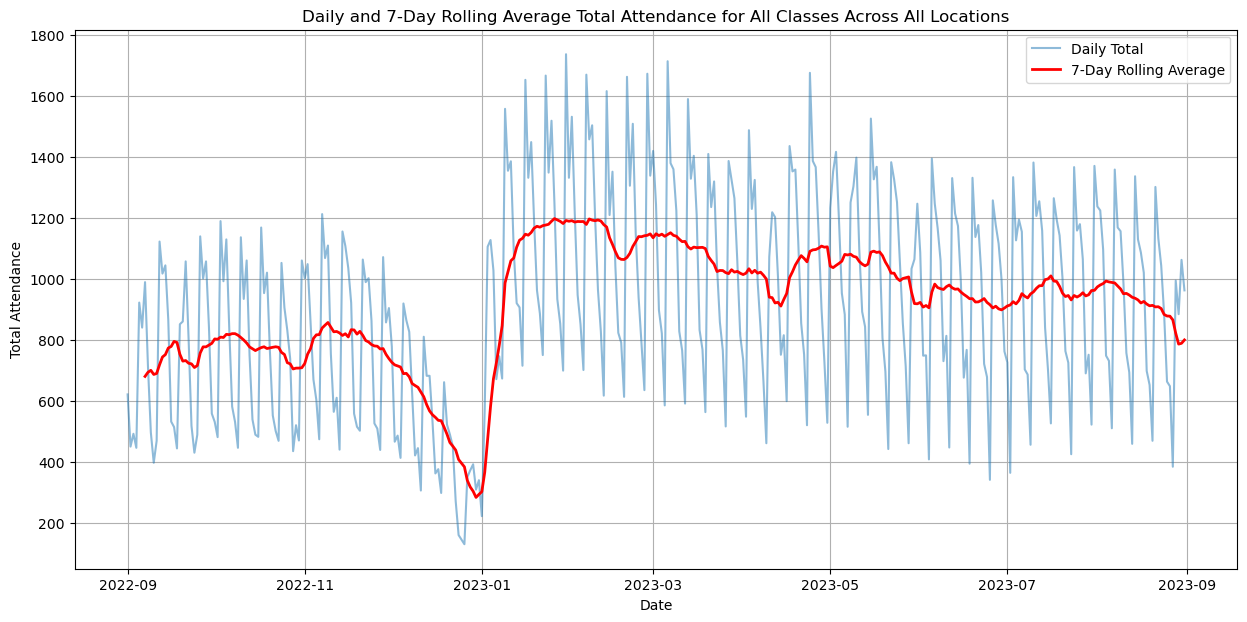

In [36]:
# Make sure 'start_date_time' is in datetime format
timetable_class_data_clean['start_date_time'] = pd.to_datetime(timetable_class_data_clean['start_date_time'])

# Create a 'date' column by extracting the date from 'start_date_time'
timetable_class_data_clean['date'] = timetable_class_data_clean['start_date_time'].dt.date

# Group by 'date' and sum up the 'Total2' values for all classes and locations
daily_total_attendance = timetable_class_data_clean.groupby('date')['Total2'].sum()

# Now create a time series plot
plt.figure(figsize=(15, 7))  # Adjust the figure size as needed

# Calculate a 7-day rolling average of the attendance
rolling_average = daily_total_attendance.rolling(window=7).mean()

# Plot the original daily totals
daily_total_attendance.plot(kind='line', alpha=0.5, label='Daily Total')

# Plot the rolling average on top
rolling_average.plot(kind='line', color='red', linewidth=2, label='7-Day Rolling Average')

plt.title('Daily and 7-Day Rolling Average Total Attendance for All Classes Across All Locations')
plt.xlabel('Date')
plt.ylabel('Total Attendance')
plt.legend()
plt.grid(True)
plt.show()

## Daily Average Attendance for All Classes - Time Series Insights

1) After the initial dip, there is a recovery, where attendance rises and then stabilizes. This could coincide with New Year resolutions leading to an increase in gym attendance, which is a common annual trend.

2) The blue line, which represents daily attendance, shows significant variability, indicating that certain days of the week consistently have higher or lower attendance. The high spikes could represent popular days (like Mondays or mid-week), and the troughs could represent weekends or typical rest days for members.

In [37]:
timetable_class_data_clean


booking_id class_name  center_id   state     start_date_time  \
0      168book70613        lbt        168  ACTIVE 2022-09-01 07:30:00   
1      168book70613        lbt        168  ACTIVE 2022-09-01 07:30:00   
2      168book70613        lbt        168  ACTIVE 2022-09-01 07:30:00   
3      264book26982   bodytone        264  ACTIVE 2022-09-01 07:30:00   
4      264book26982   bodytone        264  ACTIVE 2022-09-01 07:30:00   
...             ...        ...        ...     ...                 ...   
60123  264book50722    yoga £2        264  ACTIVE 2023-08-31 21:00:00   
60124  264book50722    yoga £2        264  ACTIVE 2023-08-31 21:00:00   
60125  168book89730   circuits        168  ACTIVE 2023-08-31 21:15:00   
60126  168book89730   circuits        168  ACTIVE 2023-08-31 21:15:00   
60127  168book89730   circuits        168  ACTIVE 2023-08-31 21:15:00   

           stop_date_time  class_capacity participation_status  female  male  \
0     2022-09-01 08:00:00              23            CANCELLED       2     0   
1     2022-09-01 08:00:00              23              NO SHOW       1     0   
2     2022-09-01 08:00:00              23             ATTENDED       1     0   
3     2022-09-01 08:00:00              12            CANCELLED       2     0   
4     2022-09-01 08:00:00              12             ATTENDED       3     1   
...                   ...             ...                  ...     ...   ...   
60123 2023-08-31 22:00:00              12              NO SHOW       1     0   
60124 2023-08-31 22:00:00              12             ATTENDED       4     3   
60125 2023-08-31 22:00:00              30             ATTENDED       4     0   
60126 2023-08-31 22:00:00              30            CANCELLED       1     0   
60127 2023-08-31 22:00:00              30              NO SHOW       1     0   

       ...  age_over_45  Total2   class_key  space_type  Timetable/Extra  \
0      ...            0       2        6693      STUDIO        Timetable   
1      ...            0       1        6694      STUDIO        Timetable   
2      ...            0       1        6695      STUDIO        Timetable   
3      ...            1       3  8589942994      STUDIO        Timetable   
4      ...            3       6  8589942995      STUDIO        Timetable   
...    ...          ...     ...         ...         ...              ...   
60123  ...            1       1  8589948930      STUDIO        Timetable   
60124  ...            5      10  8589948931      STUDIO        Timetable   
60125  ...            2       4       11763      STUDIO        Timetable   
60126  ...            1       1       11764      STUDIO        Timetable   
60127  ...            1       2       11765      STUDIO        Timetable   

       Column1    location  standardized_class_name  year_month        date  
0            0  location_5                      LBT     2022-09  2022-09-01  
1            0  location_5                      LBT     2022-09  2022-09-01  
2            0  location_5                      LBT     2022-09  2022-09-01  
3            1  location_8                 Bodytone     2022-09  2022-09-01  
4            2  location_8                 Bodytone     2022-09  2022-09-01  
...        ...         ...                      ...         ...         ...  
60123        0  location_8                     Yoga     2023-08  2023-08-31  
60124        3  location_8                     Yoga     2023-08  2023-08-31  
60125        0  location_5                 Circuits     2023-08  2023-08-31  
60126        0  location_5                 Circuits     2023-08  2023-08-31  
60127        1  location_5                 Circuits     2023-08  2023-08-31  

[50295 rows x 27 columns]

## Seasonal Attendance Trends for All Classes Across All Locations - Insights

<ins> **High Performing Locations (5, 3, and 7):** </ins>

**Location 5:**

Dance and Combat classes show a significant peak during the early months, suggesting high interest possibly associated with New Year resolutions.
Pilates displays consistent growth over time, indicating a steady gain in popularity.
There is a noticeable drop in Cycle class attendance towards the end of the period, which may require investigation into potential causes such as seasonal changes or schedule conflicts.

**Location 3:**

Pump and Strength classes seem to maintain steady popularity throughout the year, with Strength classes showing a marked peak in the mid-year which could be capitalized upon.
Circuits and Burn it fluctuate but generally trend upward, indicating growing interest that should be encouraged.

**Location 7:**

The Cycle class stands out with high peaks, especially in the middle of the year, suggesting a seasonal preference that could be due to weather changes impacting outdoor activities.
There is a marked decrease in Pump and Bodytone towards the end of the period, which might be due to changing preferences or external factors such as holidays.

<ins> **Lower Performing Locations (8, 2, and 4):** </ins> 

**Location 4:**

Aerobics and Combat show strong seasonality with higher attendance in the later and earlier months of the year, respectively.
Yoga and Zumba have smaller fluctuations, indicating a stable but less popular option among the members.

**Location 2:**

Cycle has high peaks, especially in the spring, indicating possible seasonal interest.
There's a large drop in attendance for most classes from July to August, possibly due to summer vacations.

**Location 8:**

Strength and Dance classes peak around the spring and early summer, indicating a trend where members may be preparing for summer activities.
Similar to location 2, there's a notable drop in the summer months for almost all classes

<ins> **General Insights:** </ins> 

1) Trending classes such as Pilates, Dance, and Combat could be offered more frequently or promoted during their peak popularity times.

2) Seasonality greatly affects attendance, with a general trend of increased participation in the early months, possibly associated with New Year's resolutions and preparations for summer during the spring.

3) The summer drop suggests that gyms could benefit from modifying schedules or offering outdoor or shorter-duration classes to accommodate the change in member schedules and preferences.

4) Consistent but lower popularity classes like Yoga might benefit from targeted promotions to boost attendance, or look to replace with higher performing, none-timetable class. 

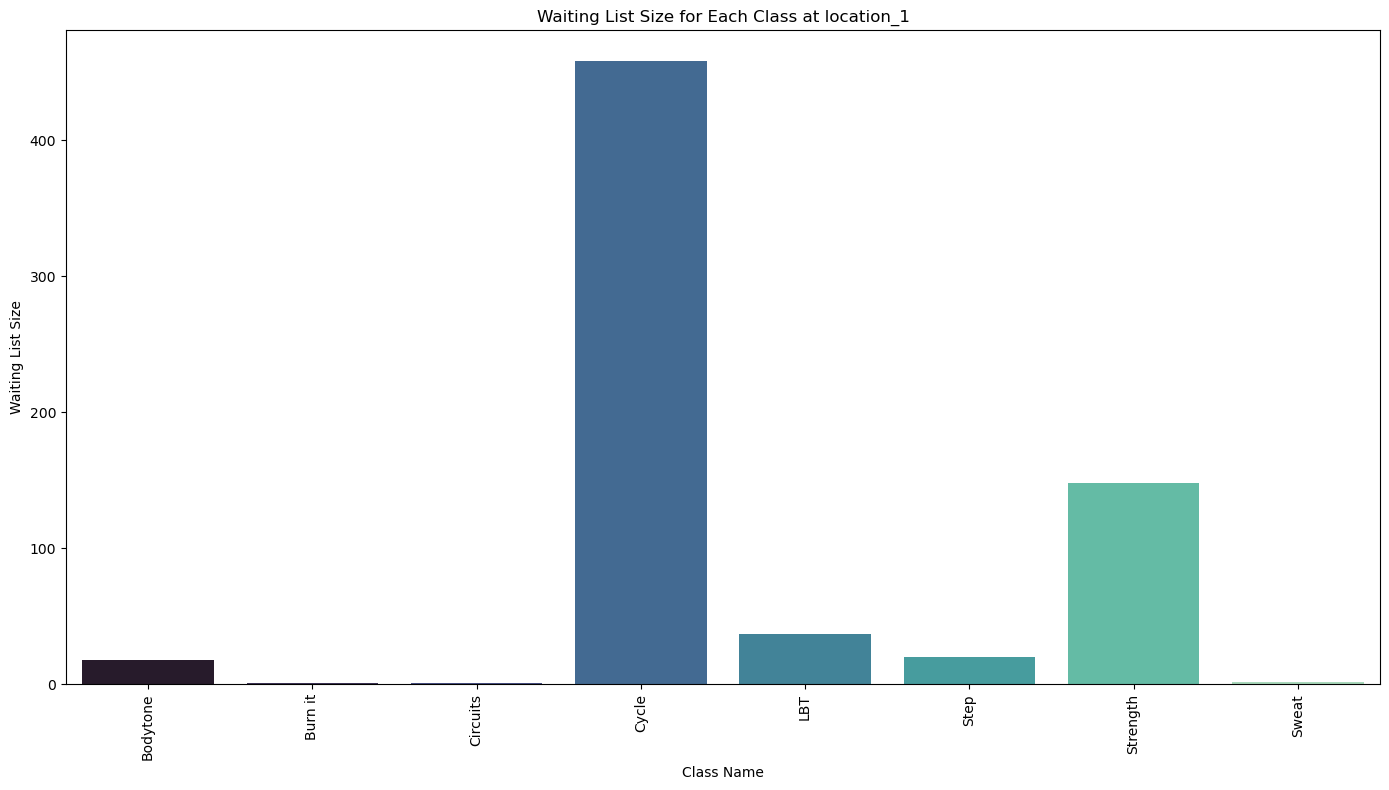

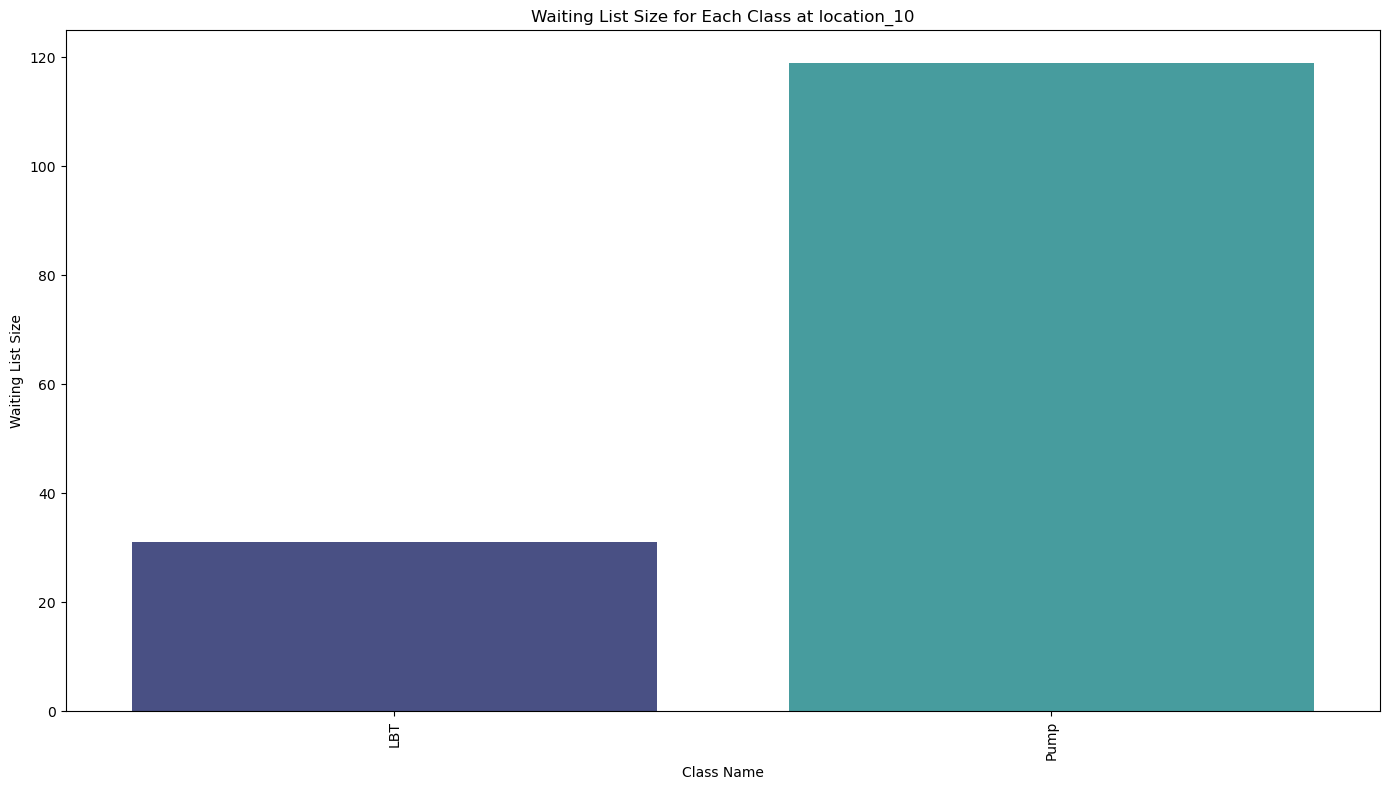

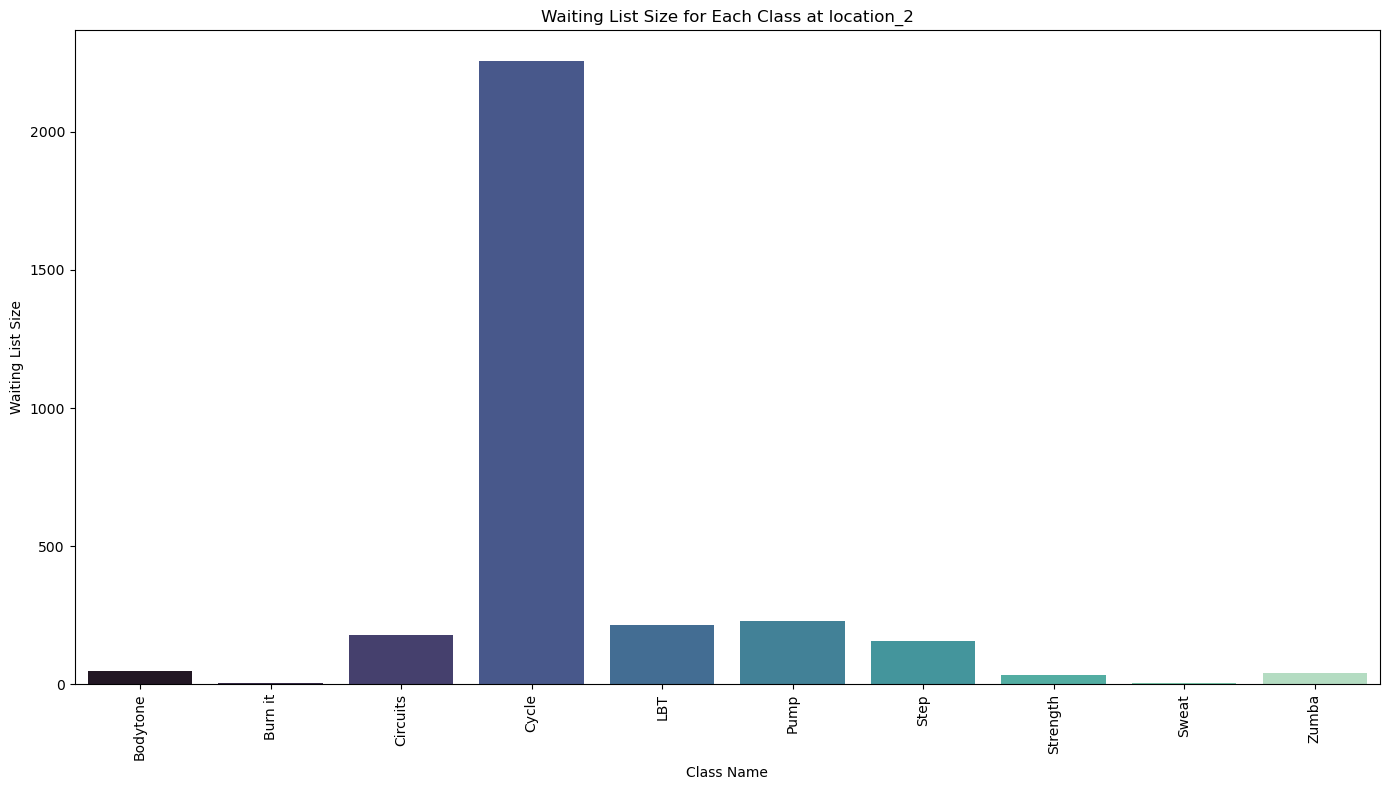

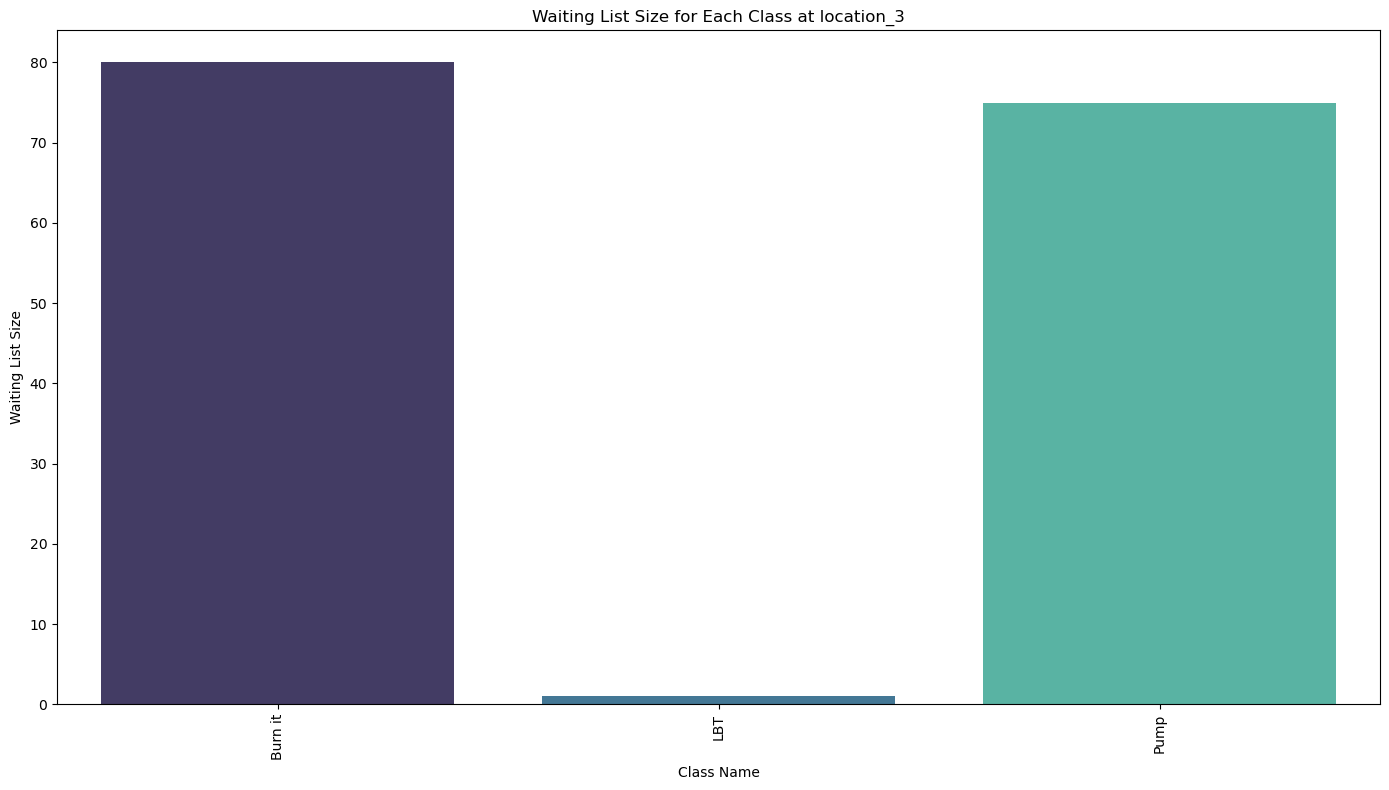

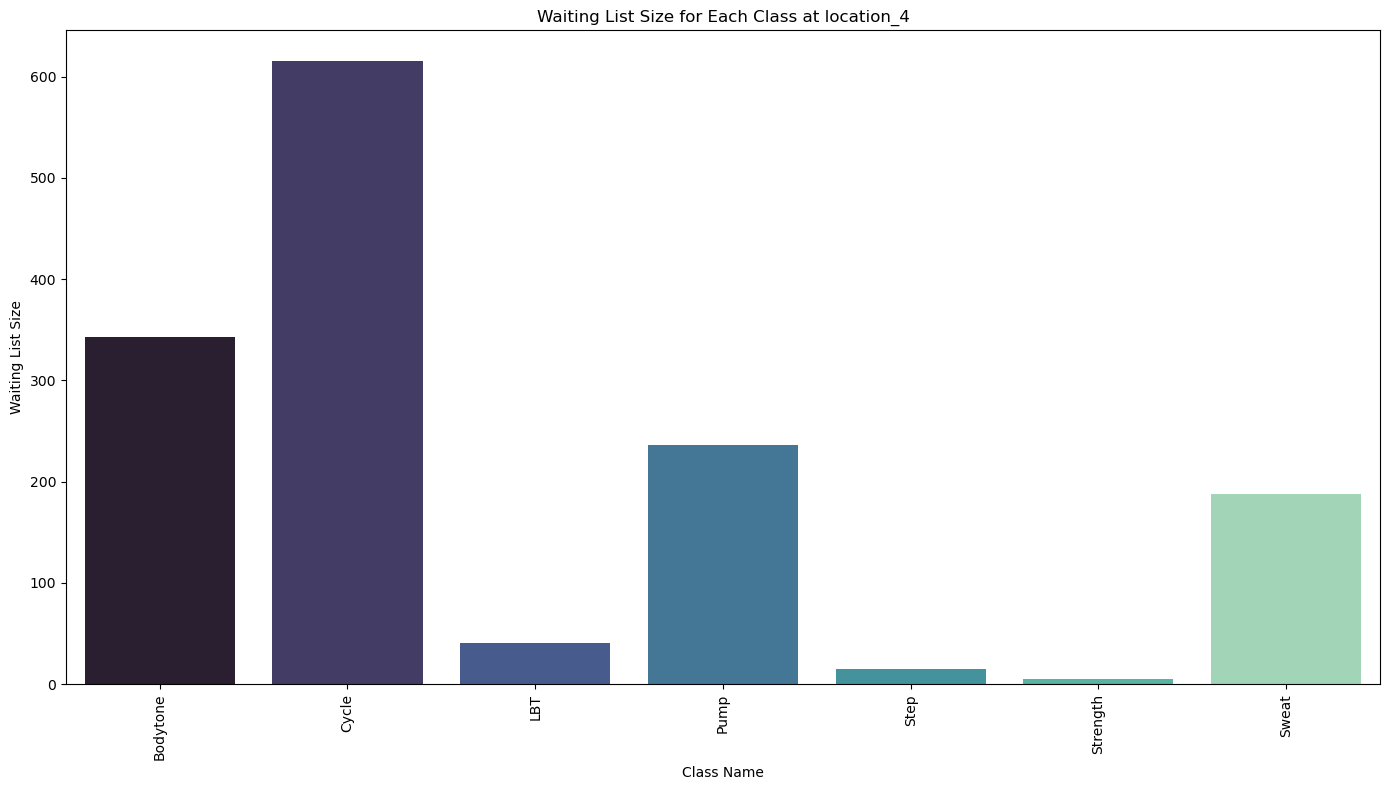

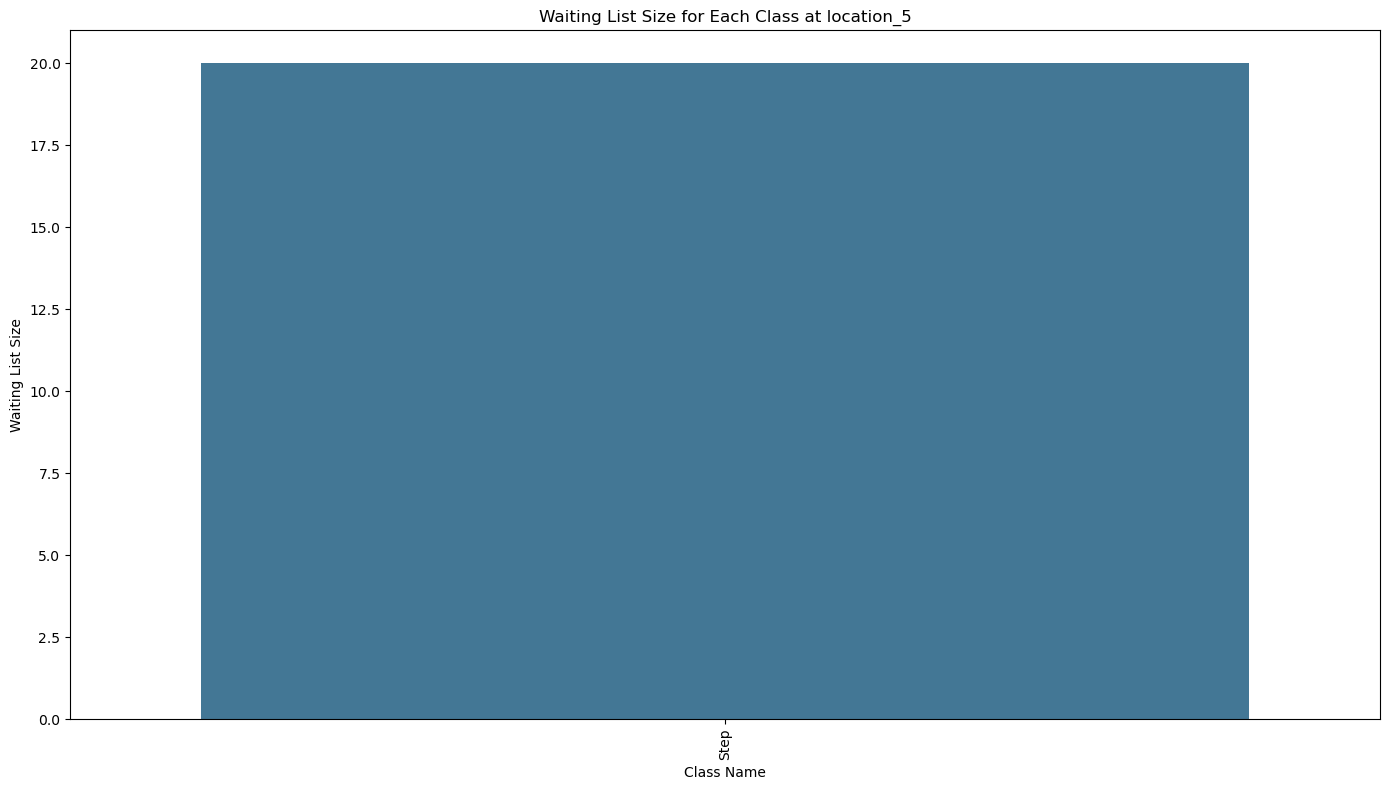

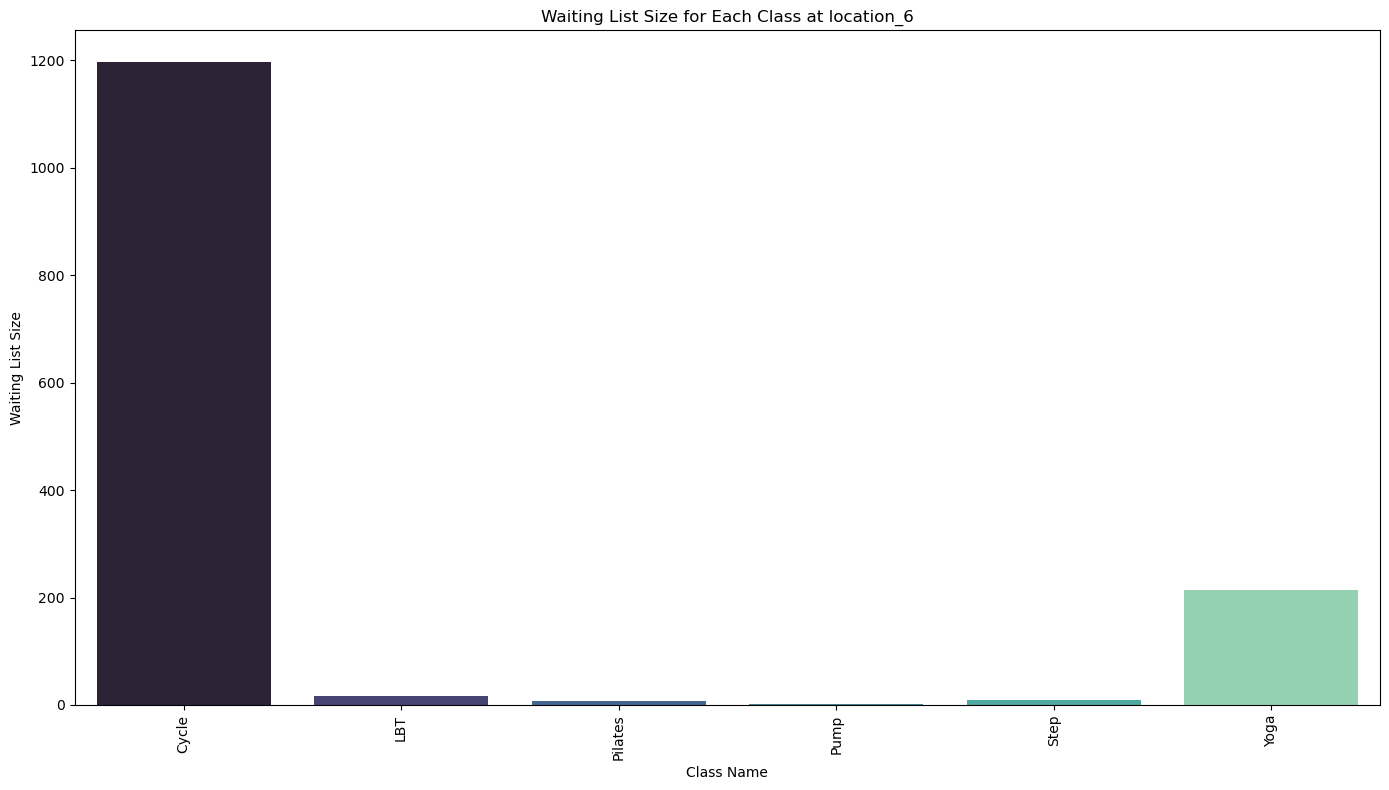

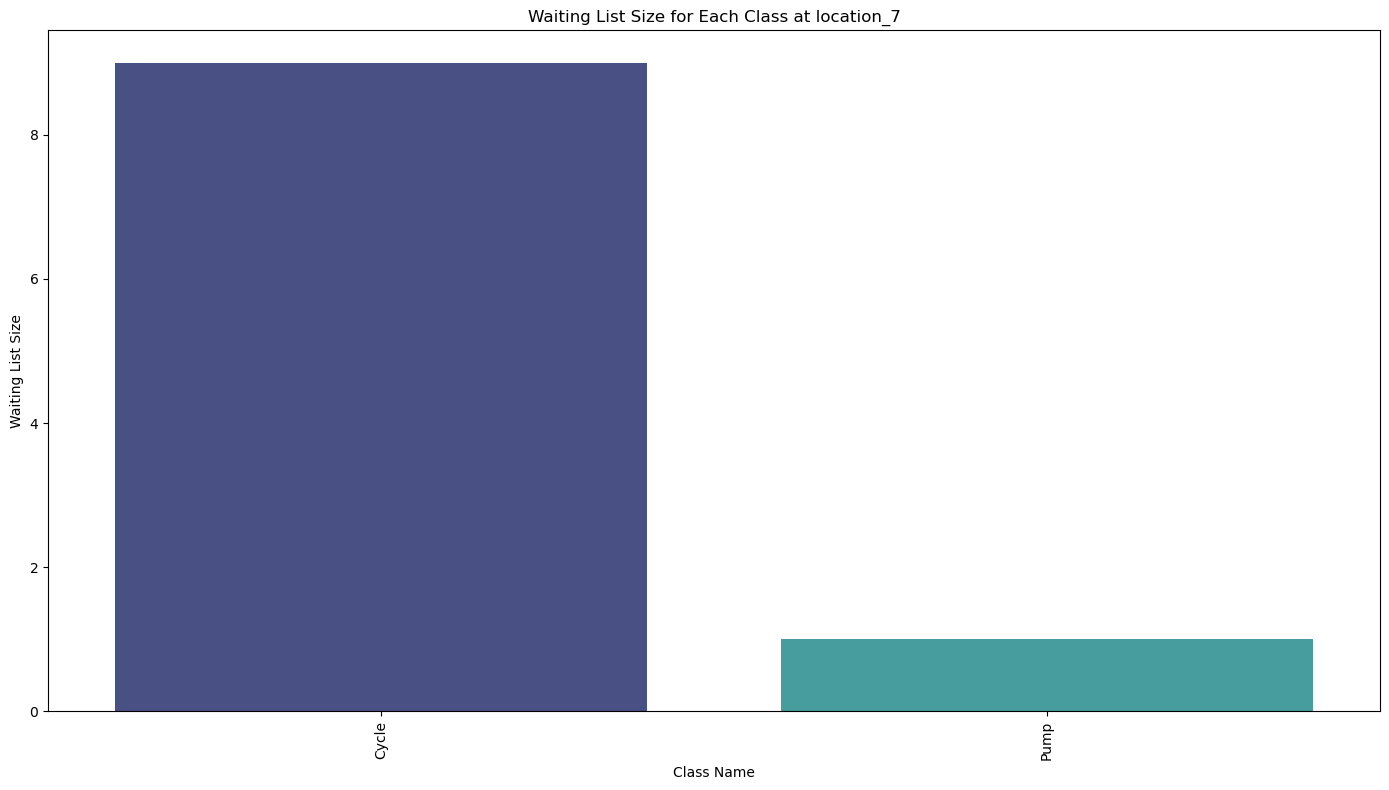

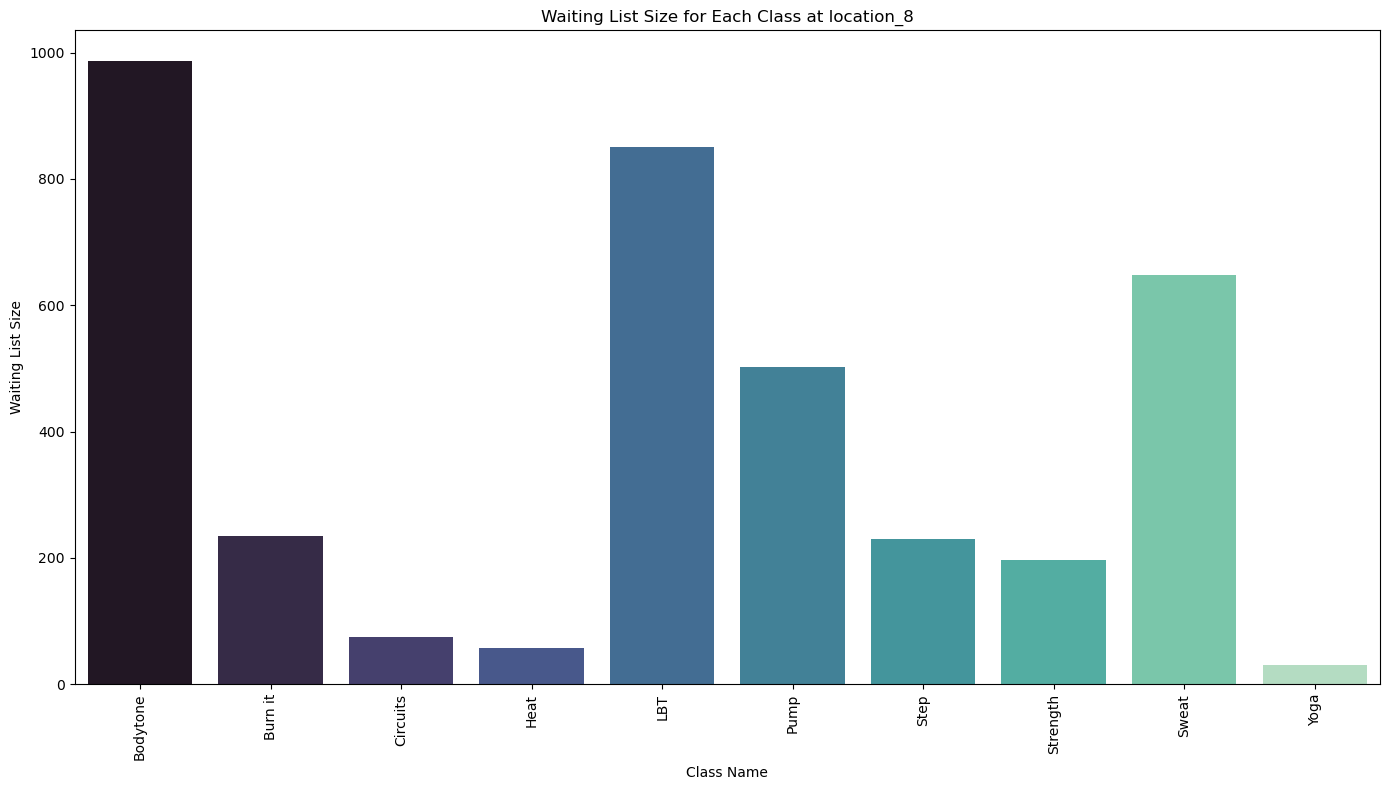

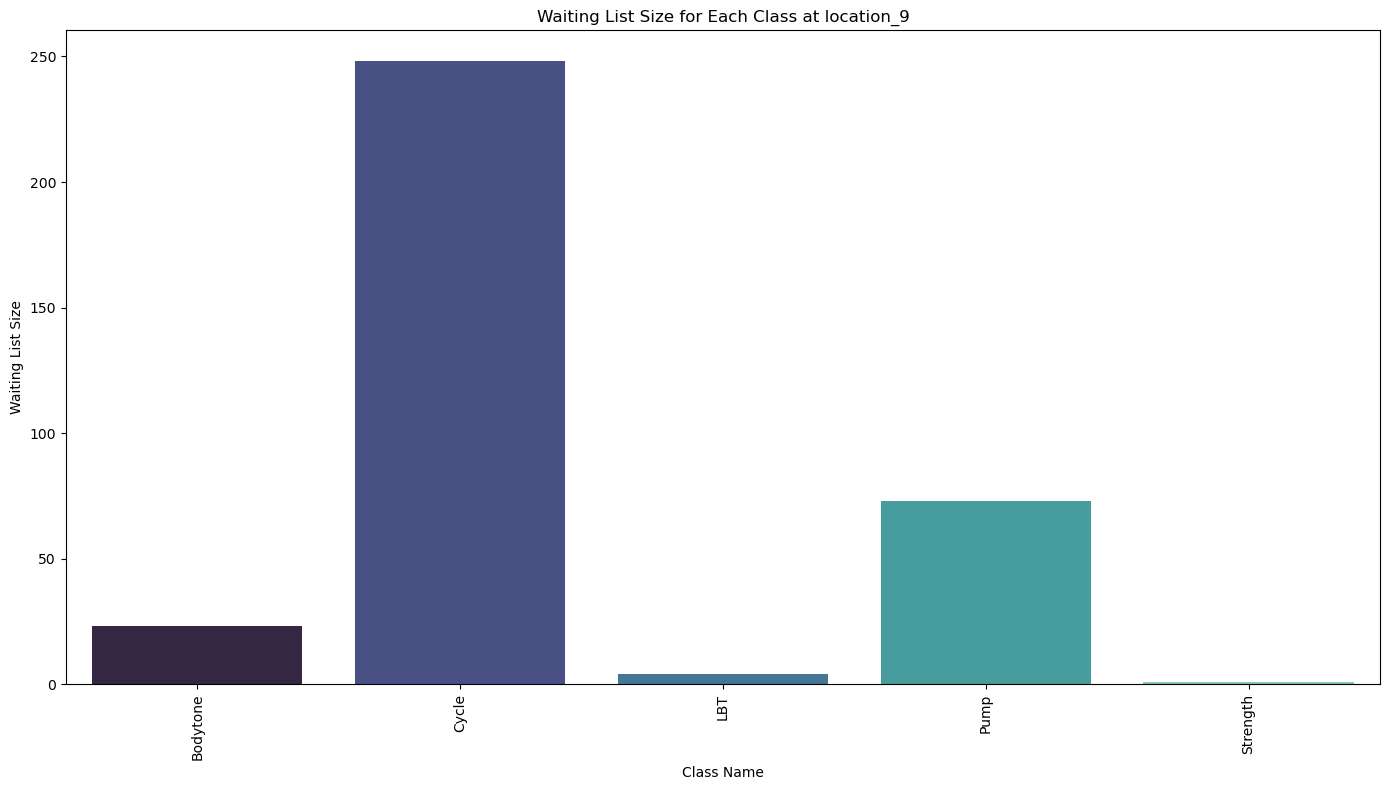

In [38]:
# Filter for 'WAITING LIST' status
waiting_list_df = timetable_class_data_clean[timetable_class_data_clean['participation_status'] == 'WAITING LIST']

# Aggregate the waiting list counts by location and class
waiting_list_counts = waiting_list_df.groupby(['location', 'standardized_class_name']).agg({
    'Total2': 'sum'  # Assuming 'Total2' represents the count of people on the waiting list
}).reset_index()

# Rename the 'Total2' column to reflect that it represents the waiting list size
waiting_list_counts.rename(columns={'Total2': 'waiting_list_size'}, inplace=True)

# Create a visualization for each location for waiting list size vs class
for location in waiting_list_counts['location'].unique():
    data_to_plot = waiting_list_counts[waiting_list_counts['location'] == location]

    plt.figure(figsize=(14, 8))
    sns.barplot(data=data_to_plot, x='standardized_class_name', y='waiting_list_size', palette='mako')
    plt.title(f'Waiting List Size for Each Class at {location}')
    plt.xlabel('Class Name')
    plt.ylabel('Waiting List Size')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# 3.2 Space Analysis - Alasdair Bell

### What are the differences in popularity between classes in different group exercise spaces?

Assumptions sweat in centre 293 conducted in gym floor

In [39]:
# Import and view the dataset

class_data_split = pd.read_csv('class_data_split.csv')

print(class_data_split.shape)
print(class_data_split.info())
class_data_split.head()

(60128, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            60128 non-null  object
 1   class_name            60128 non-null  object
 2   center_id             60128 non-null  int64 
 3   state                 60128 non-null  object
 4   start_date_time       60128 non-null  object
 5   stop_date_time        60128 non-null  object
 6   class_capacity        60128 non-null  int64 
 7   participation_status  60128 non-null  object
 8   female                60128 non-null  int64 
 9   male                  60128 non-null  int64 
 10  unknown               60128 non-null  int64 
 11  Total                 60128 non-null  int64 
 12  age_16_17             60128 non-null  int64 
 13  age_18_22             60128 non-null  int64 
 14  age_23_28             60128 non-null  int64 
 15  age_29_34             60

booking_id class_name  center_id   state   start_date_time  \
0  168book70613        lbt        168  ACTIVE  01/09/2022 07:30   
1  168book70613        lbt        168  ACTIVE  01/09/2022 07:30   
2  168book70613        lbt        168  ACTIVE  01/09/2022 07:30   
3  264book26982   bodytone        264  ACTIVE  01/09/2022 07:30   
4  264book26982   bodytone        264  ACTIVE  01/09/2022 07:30   

     stop_date_time  class_capacity participation_status  female  male  ...  \
0  01/09/2022 08:00              23            CANCELLED       2     0  ...   
1  01/09/2022 08:00              23              NO SHOW       1     0  ...   
2  01/09/2022 08:00              23             ATTENDED       1     0  ...   
3  01/09/2022 08:00              12            CANCELLED       2     0  ...   
4  01/09/2022 08:00              12             ATTENDED       3     1  ...   

   age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  age_over_45  Total2  \
0          0          0          0          2          0            0       2   
1          0          0          0          1          0            0       1   
2          0          0          1          0          0            0       1   
3          0          0          1          0          1            1       3   
4          0          0          1          0          2            3       6   

    class_key  space_type  Timetable/Extra  
0        6693      STUDIO        Timetable  
1        6694      STUDIO        Timetable  
2        6695      STUDIO        Timetable  
3  8589942994      STUDIO        Timetable  
4  8589942995      STUDIO        Timetable  

[5 rows x 22 columns]

## 3.2.1 Space Attendance General

- Filter for only attended
- Use Total2

In [40]:
# Filter dataset to include only rows where 'participation_status' is 'ATTENDED'
attended_space_data = class_data_split[class_data_split['participation_status'] == 'ATTENDED']

# Analyzing space type usage in terms of Total2 but only for attended sessions
attendance_by_space_type_attended = attended_space_data.groupby('space_type')['Total2'].sum().reset_index()

# Sorting the results by attendance in descending order for better readability
attendance_by_space_type = attendance_by_space_type_attended.sort_values(by='Total2', ascending=False)

attendance_by_space_type

space_type  Total2
3      STUDIO  132646
2        SPIN   39883
0  FUNCTIONAL   13087
1   GYM FLOOR    9445

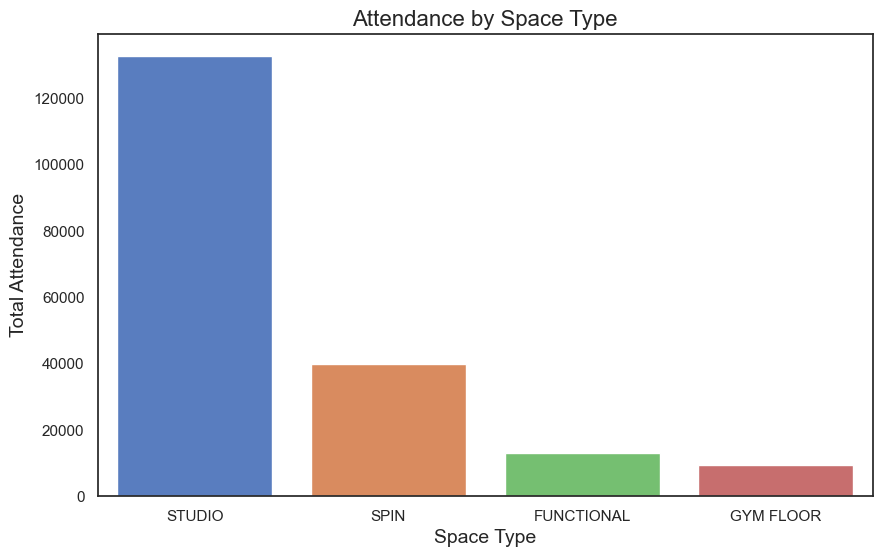

In [41]:
# Create a bar plot
sns.set_theme(style="white", rc={"axes.grid": False})  # Disabling the gridlines

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="space_type", y="Total2", data=attendance_by_space_type, palette="muted")

plt.title('Attendance by Space Type', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Total Attendance', fontsize=14)

plt.show()

## 3.2.2 Space attendance by gender

In [42]:
# Analyse attendance by gender in the different spaces -  only for attended sessions
gender_attendance_by_space = attended_space_data.groupby('space_type')[['female', 'male']].sum().reset_index()

# Calculating the total attendance and percentages for each gender within each space type
gender_attendance_by_space['total_attendance'] = gender_attendance_by_space['female'] + gender_attendance_by_space['male']
gender_attendance_by_space['female_percentage'] = (gender_attendance_by_space['female'] / gender_attendance_by_space['total_attendance']) * 100
gender_attendance_by_space['male_percentage'] = (gender_attendance_by_space['male'] / gender_attendance_by_space['total_attendance']) * 100

# Selecting relevant columns for clearer presentation
percentage_columns = ['space_type', 'female_percentage', 'male_percentage']
gender_percentage_attendance = gender_attendance_by_space[percentage_columns]

gender_percentage_attendance

space_type  female_percentage  male_percentage
0  FUNCTIONAL          74.973272        25.026728
1   GYM FLOOR          72.635360        27.364640
2        SPIN          73.530668        26.469332
3      STUDIO          84.746919        15.253081

In [43]:
# Select relevant columns for presentation in absolute terms for attended sessions
columns_attended = ['space_type', 'female', 'male']
gender_attendance = gender_attendance_by_space[columns_attended]

gender_attendance

space_type  female   male
0  FUNCTIONAL    7714   2575
1   GYM FLOOR    5460   2057
2        SPIN   24096   8674
3      STUDIO   90647  16315

- Functional: A total of 10,289 attendees with 7,714 females and 2,575 males.
- Spin: A total of 32,770 attendees with 24,096 females and 8,674 males.
- Studio: A total of 106,962 attendees with 90,647 females and 16,315 males.
- Weights Area: A total of 4,896 attendees with 3,791 females and 1,105 males.

This summary indicates that the Studio space type has the highest attendance overall, with a significantly higher female attendance compared to male. Spin follows as the second most popular space type, also with a higher female attendance. Functional spaces and Weights Areas have the lowest total attendances but still show a preference towards female attendees.

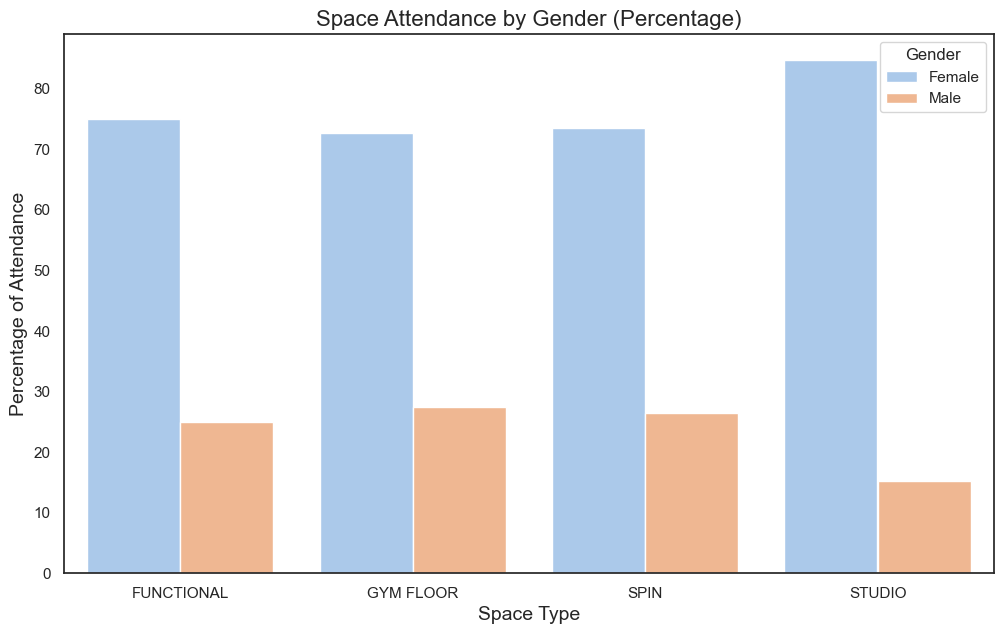

In [44]:
# Melt the dataframe for easier plotting with seaborn, focusing on percentage data for attended sessions
gender_percentage_melted_attended = gender_percentage_attendance.melt(id_vars="space_type", var_name="gender", value_name="percentage")

# Mapping the 'gender' to a more readable format
gender_percentage_melted_attended['gender'] = gender_percentage_melted_attended['gender'].map(lambda x: x.split('_')[0].capitalize())

# Creating the percentage bar plot for attended sessions
sns.set_theme(style="white", rc={"axes.grid": False})  # Re-applying settings to remove gridlines
plt.figure(figsize=(12, 7))
percentage_plot_attended = sns.barplot(x="space_type", y="percentage", hue="gender", data=gender_percentage_melted_attended, palette="pastel")

plt.title('Space Attendance by Gender (Percentage)', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Percentage of Attendance', fontsize=14)
plt.legend(title='Gender')

plt.show()

This bar chart clearly delineates the proportion of female and male attendees within each space type: STUDIO, SPIN, and FUNCTIONAL, highlighting the significant dominance of female attendance across all categories

## 3.2.3 Space attendance by age group

In [45]:
# Filtering the dataset for attended sessions and selecting columns related to age groups and space type
attended_age_group_data = attended_space_data[['space_type', 'age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45', 'Total2']]

# Grouping by space type and summing the attendance in each age group for attended sessions
attended_age_group_attendance = attended_age_group_data.groupby('space_type').sum().reset_index()

# Calculating the percentage of each age group's attendance in each space type for attended sessions
for age_group in ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']:  
    attended_age_group_attendance[f'{age_group}_percentage'] = (attended_age_group_attendance[age_group] / attended_age_group_attendance['Total2']) * 100

# Selecting relevant percentage columns for presentation
attended_percentage_columns = ['space_type'] + [f'{col}_percentage' for col in ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']]
attended_age_group_percentage_attendance = attended_age_group_attendance[attended_percentage_columns]

attended_age_group_percentage_attendance

space_type  age_16_17_percentage  age_18_22_percentage  \
0  FUNCTIONAL              0.122259              2.628563   
1   GYM FLOOR              1.344627              6.109052   
2        SPIN              0.471379              5.491061   
3      STUDIO              0.364881              5.056315   

   age_23_28_percentage  age_29_34_percentage  age_35_44_percentage  \
0             13.372049             16.130511             20.745778   
1             18.337745             17.480148             19.947062   
2             17.047364             15.761101             17.619036   
3             18.134735             17.858058             18.718243   

   age_over_45_percentage  
0               47.000841  
1               36.781366  
2               43.610059  
3               39.867768

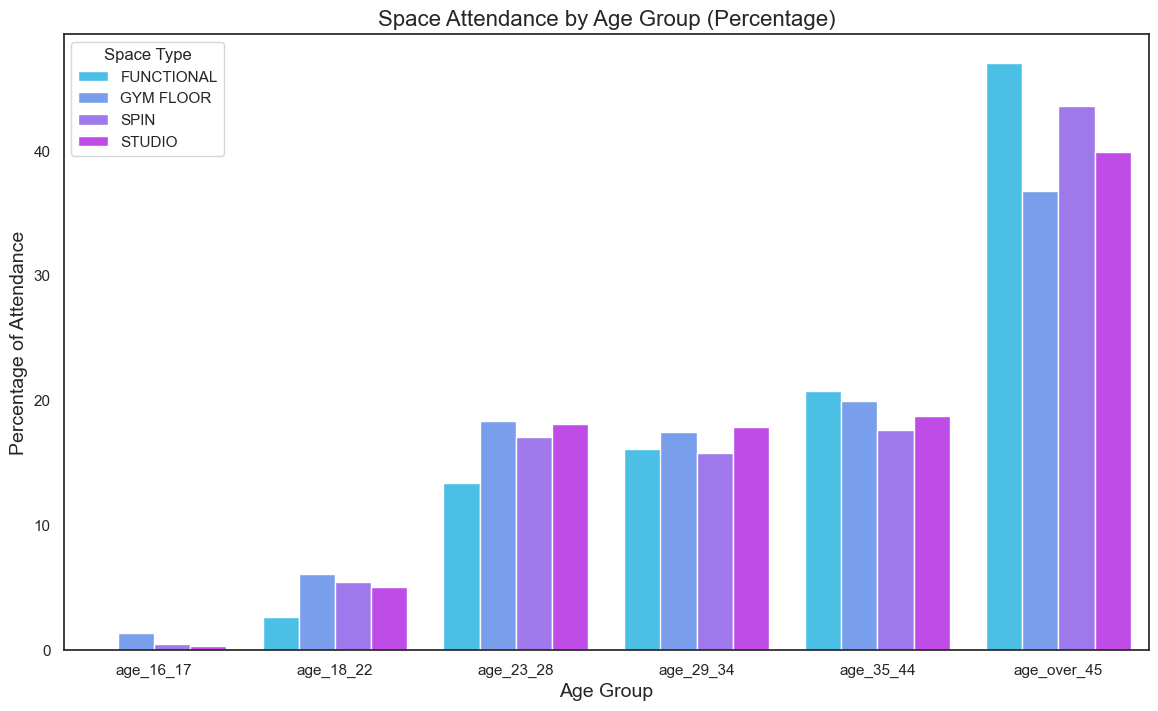

In [46]:
# Melt the dataframe for easier plotting with seaborn, focusing on percentage data for attended sessions and age groups
attended_age_group_percentage_melted = attended_age_group_percentage_attendance.melt(id_vars="space_type", var_name="age_group", value_name="percentage")

# Mapping the 'age_group' to a more readable format by removing '_percentage'
attended_age_group_percentage_melted['age_group'] = attended_age_group_percentage_melted['age_group'].str.replace('_percentage', '')

# Creating the percentage bar plot for attended sessions and age groups
plt.figure(figsize=(14, 8))
attended_age_percentage_plot = sns.barplot(x="age_group", y="percentage", hue="space_type", data=attended_age_group_percentage_melted, palette="cool")

plt.title('Space Attendance by Age Group (Percentage)', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Percentage of Attendance', fontsize=14)

plt.legend(title='Space Type')

plt.show()

### Functional Space:

- A significant majority (47.00%) of the attendees are over 45 years old, showing a strong preference among the older age groups for functional training sessions.
- The next largest group is those aged 35-44, making up 20.75% of the attendance.
- The percentages gradually decrease through the younger age groups, with the least attendance from those aged 16-17 (0.12%).

### Spin Classes:

- The largest attendance group is also those over 45 years old, but with a smaller proportion (43.61%) compared to the Functional space.
- Younger age groups show relatively more interest in Spin classes than in Functional, with ages 18-22 and 23-28 combined making up over 22% of attendance.
- Children and teenagers (age 16-17) represent a small fraction (0.47%) of the participants.

### Studio:

- The Studio space is popular across a broad age range, with the largest group being over 45 years old (39.87%), indicating a wide appeal.
- Attendance is well distributed among the middle age groups (23-28, 29-34, 35-44), each constituting roughly 18% of the total.
- The youngest age group (16-17) again shows the least attendance (0.36%).

### Gym Floor:

- The Weights Area shows a somewhat more even distribution across age groups, especially among adults, with the highest percentage still being those over 45 years old (35.38%).
- Notably, the Weights Area has a higher percentage of younger adults (19.68% for ages 23-28 and 18.74% for ages 29-34) compared to other spaces.
- The attendance of the youngest age group (16-17) remains low (0.67%), but it is higher here than in other spaces.

These results illustrate how different age groups are drawn to various types of spaces for physical activities, with older participants showing a significant presence across all spaces, particularly in Functional and Spin classes. Meanwhile, younger adults (especially those aged 23-34) show a relatively higher inclination towards the Weights Area, indicating a possible preference for strength training. This data can inform targeted programming and marketing strategies to cater to the preferences of each age group.

## 3.2.4 Space attendance by Gym

In [47]:
# Group the attended data by 'center_id' and 'space_type' to analyze space use in all gyms based on Total2 for attended sessions
attended_space_use_in_gyms = attended_space_data.groupby(['center_id', 'space_type'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Add a total attendance column to see overall attendance in each gym for attended sessions
attended_space_use_in_gyms['Total Attendance'] = attended_space_use_in_gyms.sum(axis=1)

# Sorting by 'Total Attendance' for better insight into which gyms have the highest usage for attended sessions
attended_space_use_in_gyms = attended_space_use_in_gyms.sort_values(by='Total Attendance', ascending=False)

attended_space_use_in_gyms

space_type  center_id  FUNCTIONAL  GYM FLOOR   SPIN  STUDIO  Total Attendance
1                  28        1700       1559  12659   23539             39485
5                 174           0        556  10233   15134             26097
3                  34        2581        887   7073   14805             25380
4                 168           0       1287      0   22596             24051
0                  14        1111        534   5264   14567             21490
7                 264        5204        432      0   11863             17763
9                 314           0       1255      0   10964             12533
2                  30        1607        283      0   10211             12131
8                 293           0       1575   3075    6197             11140
6                 216         884       1077   1579    2770              6526

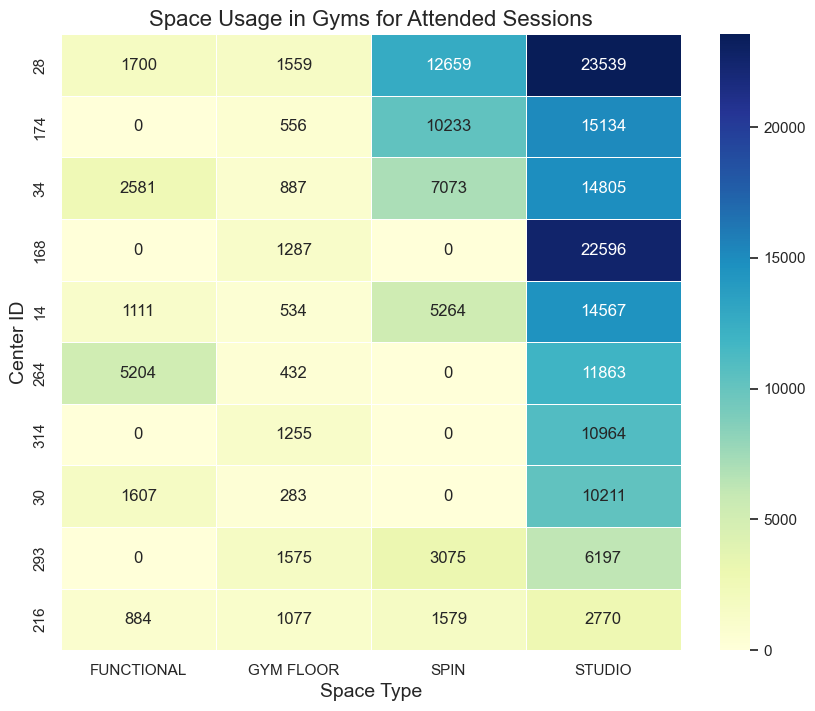

In [48]:
# Prepare the data for the heatmap: dropping the 'Total Attendance' column and setting 'center_id' as the index
heatmap_data = attended_space_use_in_gyms.drop('Total Attendance', axis=1).set_index('center_id')

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

plt.title('Space Usage in Gyms for Attended Sessions', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Center ID', fontsize=14)

plt.show()

The color intensity indicates the level of attendance, with darker shades representing higher attendance numbers. This visualization helps to quickly identify which spaces are most popular in each gym and compare usage patterns across different gyms. 

#### Gym Attendance Summary:
- Center 28 has the highest overall attendance, with a total of 39,485, predominantly in the 'STUDIO' and 'SPIN' spaces.
- Center 174 and Center 34 follow, with total attendances of 26,097 and 25,380, respectively, with strong performances in 'SPIN' and 'STUDIO' spaces.
- Other centers like Center 168 and Center 14 also show considerable attendance figures, particularly in 'STUDIO'.
#### Heatmap Insights:
- The heatmap visualizes the distribution of 'Total2' values across different 'space_type' categories for each gym ('center_id').
- 'STUDIO' and 'SPIN' spaces are the most utilized across the centers, showing higher values in these categories.
- Some centers like Center 264 show a significant preference for 'FUNCTIONAL' spaces compared to others.

This analysis indicates that certain types of spaces ('STUDIO' and 'SPIN') are more popular in terms of attendance across the centers, suggesting potential areas for resource allocation or further promotional activities.

In [49]:
attended_space_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22959 entries, 2 to 60125
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            22959 non-null  object
 1   class_name            22959 non-null  object
 2   center_id             22959 non-null  int64 
 3   state                 22959 non-null  object
 4   start_date_time       22959 non-null  object
 5   stop_date_time        22959 non-null  object
 6   class_capacity        22959 non-null  int64 
 7   participation_status  22959 non-null  object
 8   female                22959 non-null  int64 
 9   male                  22959 non-null  int64 
 10  unknown               22959 non-null  int64 
 11  Total                 22959 non-null  int64 
 12  age_16_17             22959 non-null  int64 
 13  age_18_22             22959 non-null  int64 
 14  age_23_28             22959 non-null  int64 
 15  age_29_34             22959 non-null

## 3.2.5 Attendence by time of day

In [50]:
# Convert attended data to datetime

attended_space_data['start_date_time'] = pd.to_datetime(attended_space_data['start_date_time'])

attended_space_data['stop_date_time'] = pd.to_datetime(attended_space_data['stop_date_time'])


print(attended_space_data.info())
attended_space_data



<class 'pandas.core.frame.DataFrame'>
Int64Index: 22959 entries, 2 to 60125
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   booking_id            22959 non-null  object        
 1   class_name            22959 non-null  object        
 2   center_id             22959 non-null  int64         
 3   state                 22959 non-null  object        
 4   start_date_time       22959 non-null  datetime64[ns]
 5   stop_date_time        22959 non-null  datetime64[ns]
 6   class_capacity        22959 non-null  int64         
 7   participation_status  22959 non-null  object        
 8   female                22959 non-null  int64         
 9   male                  22959 non-null  int64         
 10  unknown               22959 non-null  int64         
 11  Total                 22959 non-null  int64         
 12  age_16_17             22959 non-null  int64         
 13  age_18_22       

booking_id   class_name  center_id   state     start_date_time  \
2      168book70613          lbt        168  ACTIVE 2022-01-09 07:30:00   
4      264book26982     bodytone        264  ACTIVE 2022-01-09 07:30:00   
5      28book119830          lbt         28  ACTIVE 2022-01-09 07:30:00   
8      30book103007  strength 30         30  ACTIVE 2022-01-09 07:30:00   
12     174book60027        cycle        174  ACTIVE 2022-01-09 07:30:00   
...             ...          ...        ...     ...                 ...   
60116  314book35436    zumba® £4        314  ACTIVE 2023-08-31 20:30:00   
60119  34book134452          lbt         34  ACTIVE 2023-08-31 21:15:00   
60121  14book157206    zumba® £2         14  ACTIVE 2023-08-31 21:00:00   
60124  264book50722      yoga £2        264  ACTIVE 2023-08-31 21:00:00   
60125  168book89730     circuits        168  ACTIVE 2023-08-31 21:15:00   

           stop_date_time  class_capacity participation_status  female  male  \
2     2022-01-09 08:00:00              23             ATTENDED       1     0   
4     2022-01-09 08:00:00              12             ATTENDED       3     1   
5     2022-01-09 08:00:00              30             ATTENDED       7     0   
8     2022-01-09 08:00:00              16             ATTENDED       2     0   
12    2022-01-09 08:15:00              24             ATTENDED       2     0   
...                   ...             ...                  ...     ...   ...   
60116 2023-08-31 21:15:00              30             ATTENDED       1     0   
60119 2023-08-31 21:45:00              26             ATTENDED       7     0   
60121 2023-08-31 22:00:00              30             ATTENDED       8     0   
60124 2023-08-31 22:00:00              12             ATTENDED       4     3   
60125 2023-08-31 22:00:00              30             ATTENDED       4     0   

       ...  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
2      ...          0          0          1          0          0   
4      ...          0          0          1          0          2   
5      ...          0          0          2          2          0   
8      ...          0          0          1          1          0   
12     ...          0          1          0          1          0   
...    ...        ...        ...        ...        ...        ...   
60116  ...          0          0          0          1          0   
60119  ...          0          2          1          2          0   
60121  ...          0          1          3          2          1   
60124  ...          0          0          2          0          3   
60125  ...          0          0          2          0          0   

       age_over_45  Total2    class_key  space_type  Timetable/Extra  
2                0       1         6695      STUDIO        Timetable  
4                3       6   8589942995      STUDIO        Timetable  
5                3       7  17179869258      STUDIO        Timetable  
8                0       2  17179882988  FUNCTIONAL        Timetable  
12               0       2        12594        SPIN        Timetable  
...            ...     ...          ...         ...              ...  
60116            0       1  25769812222      STUDIO        Timetable  
60119            2       7  25769820293      STUDIO        Timetable  
60121            3      10         5825      STUDIO        Timetable  
60124            5      10   8589948931      STUDIO        Timetable  
60125            2       4        11763      STUDIO        Timetable  

[22959 rows x 22 columns]

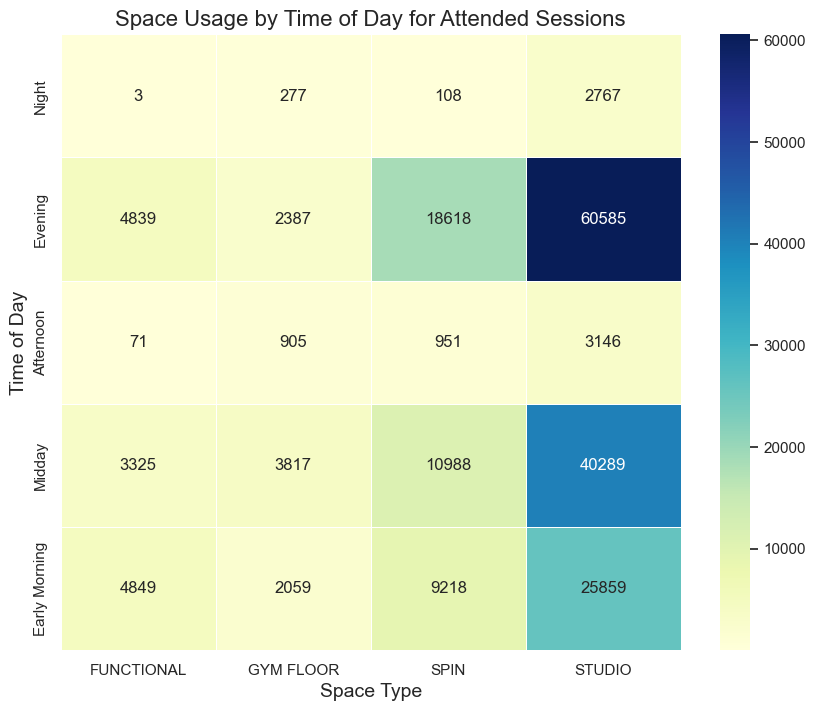

In [51]:
# Define a function to categorize hours into detailed time of day segments
def categorize_detailed_time_of_day(hour):
    if 5 <= hour < 10:
        return 'Early Morning'
    elif 10 <= hour < 14:
        return 'Midday'
    elif 14 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from 'start_date_time'
attended_space_data['hour'] = attended_space_data['start_date_time'].dt.hour

# Apply the time of day categorization
attended_space_data['detailed_time_of_day'] = attended_space_data['hour'].apply(categorize_detailed_time_of_day)

# Group by the detailed time of day and space type, summing 'Total2' for analysis
space_usage_by_detailed_time_final = attended_space_data.groupby(['detailed_time_of_day', 'space_type'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Inverting the order for the heatmap
ordered_space_usage = space_usage_by_detailed_time_final.set_index('detailed_time_of_day').loc[
    ['Night', 'Evening', 'Afternoon', 'Midday', 'Early Morning']
].reset_index()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_space_usage.set_index('detailed_time_of_day'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

plt.title('Space Usage by Time of Day for Attended Sessions', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)

plt.show()


### Early Morning: 
This time segment shows significant usage across all space types, with the highest attendance in the Studio space, followed by Spin, Functional, and the Gym floor.
### Midday: 

Midday also sees substantial usage, particularly in the Studio and Spin spaces, with Functional and Gym floor following.
### Afternoon: 
In the afternoon, Studio space usage remains high, with a notable amount of attendance in Spin and lower figures for Functional and Gym floor.
### Evening: 
The evening period is the peak time for Studio and Spin spaces, showing the highest attendance numbers across all segments, with lesser but still considerable usage in Functional and Gym floor.
### Night: 
Usage drops significantly at night across all spaces, with the least attendance, though Studio and Spin still see some activity.

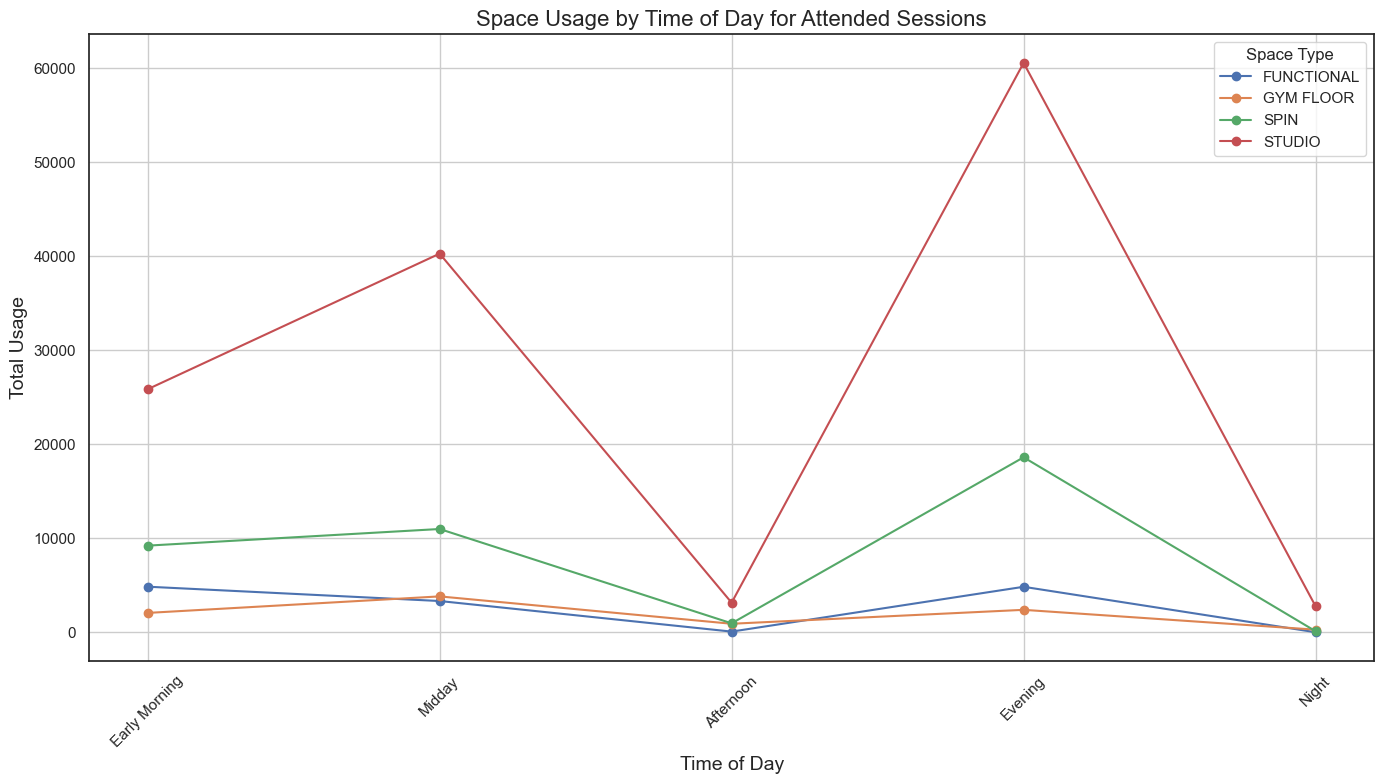

In [52]:
# Ensuring the data is in the correct order for the line chart
space_usage_by_detailed_time_ordered = space_usage_by_detailed_time_final.set_index('detailed_time_of_day').loc[
    ['Early Morning', 'Midday', 'Afternoon', 'Evening', 'Night']
].reset_index()

# Plotting the line chart
plt.figure(figsize=(14, 8))

for column in space_usage_by_detailed_time_ordered.columns[1:]:  # Skip the first column which is 'detailed_time_of_day'
    plt.plot(space_usage_by_detailed_time_ordered['detailed_time_of_day'], space_usage_by_detailed_time_ordered[column], marker='o', label=column)

plt.title('Space Usage by Time of Day for Attended Sessions', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Total Usage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Space Type')

plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2.6 Seasonal Analysis of Space usage

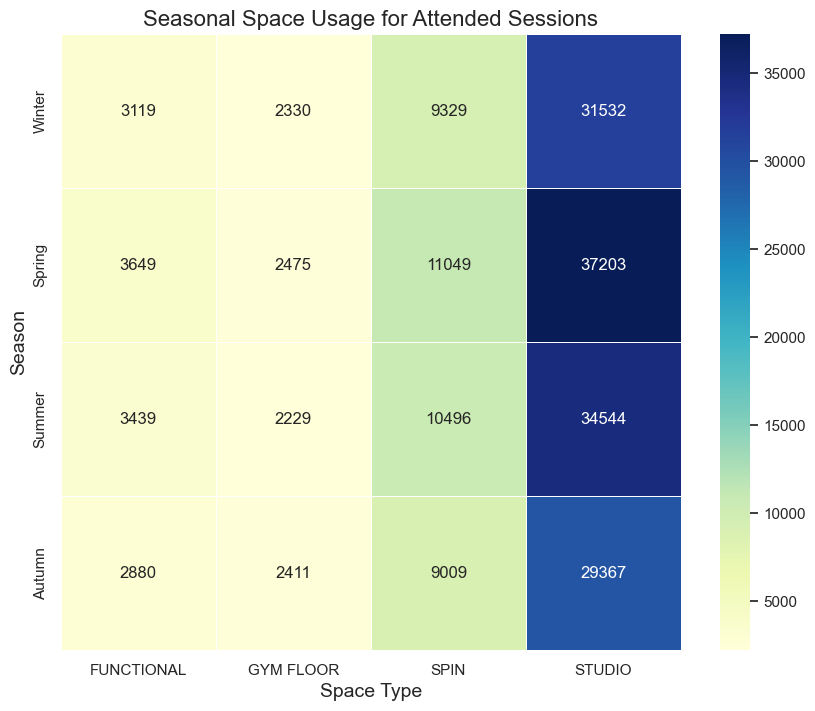

In [53]:
# To analyze seasonal space usage, first, we need to define the seasons based on the month of the year.

def categorize_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:  # December to February
        return 'Winter'

# Extract the month from 'start_date_time'
attended_space_data['month'] = attended_space_data['start_date_time'].dt.month

# Apply the season categorization
attended_space_data['season'] = attended_space_data['month'].apply(categorize_season)

# Group by 'season' and 'space_type', summing 'Total2' for analysis
space_usage_by_season = attended_space_data.groupby(['season', 'space_type'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Ordering the seasons for the heatmap
ordered_space_usage_season = space_usage_by_season.set_index('season').loc[
    ['Winter', 'Spring', 'Summer', 'Autumn']
].reset_index()

# Creating the heatmap for seasonal space usage
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_space_usage_season.set_index('season'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

plt.title('Seasonal Space Usage for Attended Sessions', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Season', fontsize=14)

plt.show()


#### Seasonal Space Usage Summary:
- Spring: Shows a strong preference for 'STUDIO' usage, which is notably higher compared to other seasons. 'SPIN' also has considerable use.
- Summer: The usage pattern is quite similar to Spring, with 'STUDIO' still being the most used space, although 'SPIN' shows a slight decrease.
- Autumn: 'STUDIO' remains the dominant space type, although there's a noticeable drop in usage for other types like 'SPIN' and 'FUNCTIONAL'.
- Winter: This season shows the lowest overall usage among all seasons, especially for 'SPIN' and 'FUNCTIONAL' spaces.

The data clearly indicates that the 'STUDIO' space type is consistently the most utilized across all seasons, with usage peaking during Spring and Summer. The other space types show more variation and generally lower usage across seasons. This information can be useful for targeted marketing strategies and operational planning based on seasonal demand.

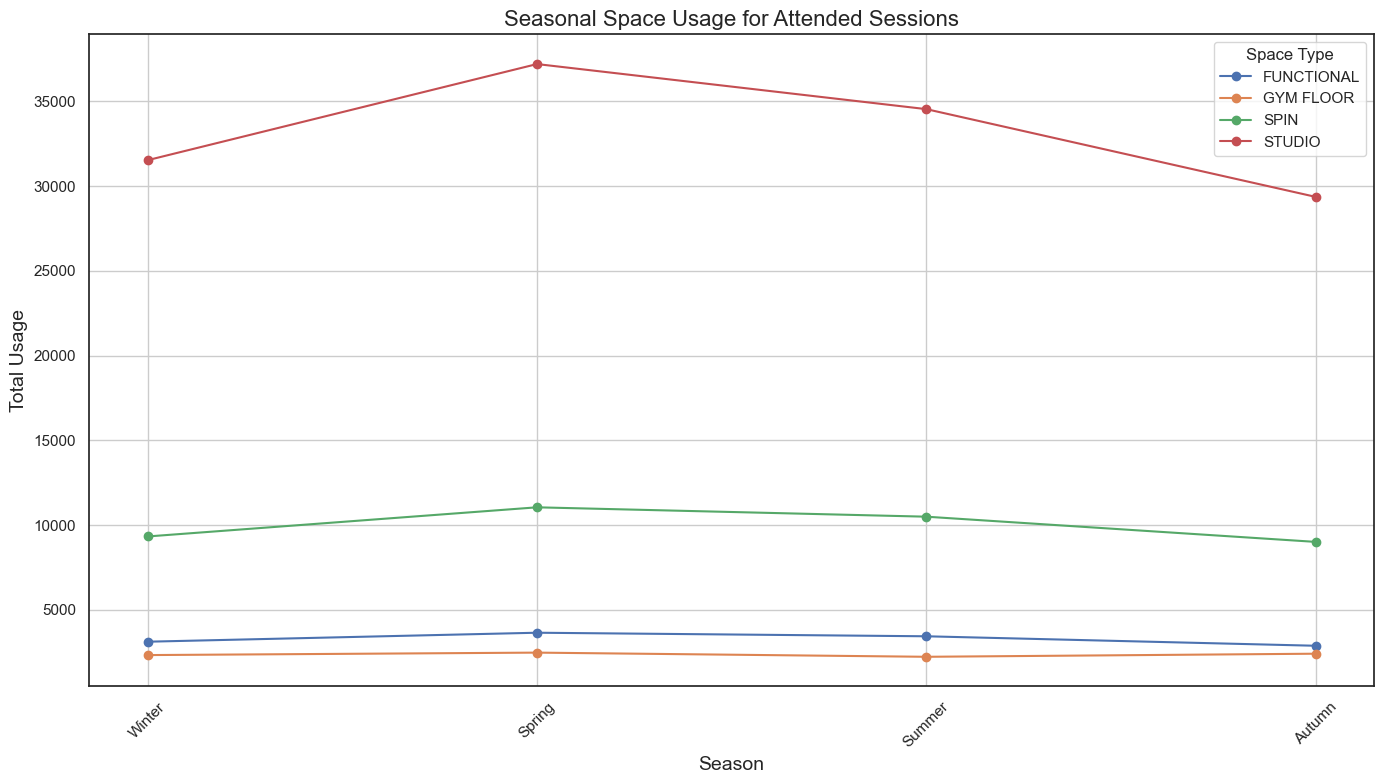

In [54]:
# Ensuring the data is in the correct seasonal order for the line chart
space_usage_by_season_ordered = space_usage_by_season.set_index('season').loc[
    ['Winter', 'Spring', 'Summer', 'Autumn']
].reset_index()

# Plotting the line chart for seasonal space usage
plt.figure(figsize=(14, 8))

for column in space_usage_by_season_ordered.columns[1:]:  # Skip the first column which is 'season'
    plt.plot(space_usage_by_season_ordered['season'], space_usage_by_season_ordered[column], marker='o', label=column)

plt.title('Seasonal Space Usage for Attended Sessions', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Total Usage', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Space Type')

plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2.7 Weekly attendance by space

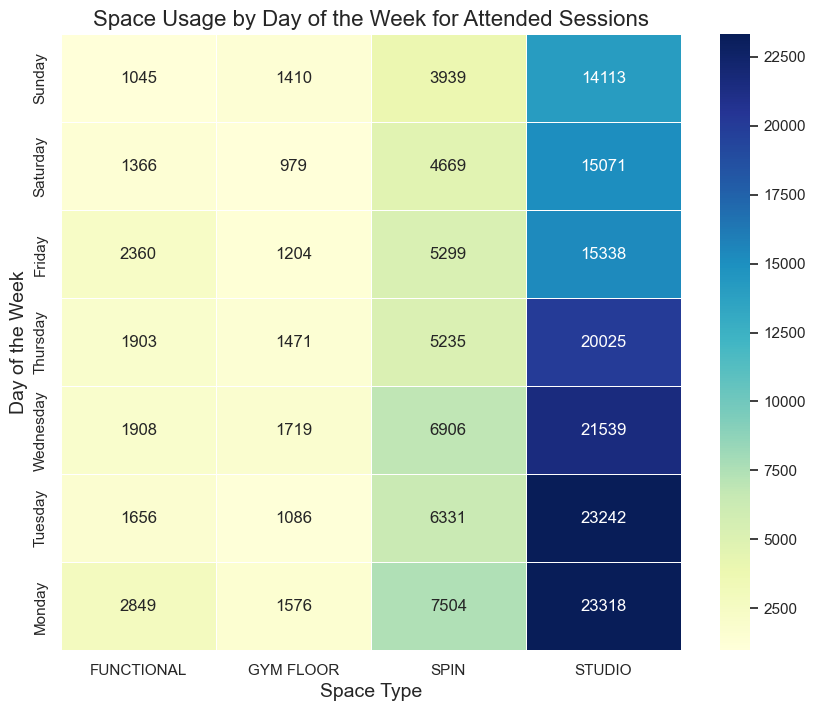

In [55]:
# Extracting the day of the week from 'start_date_time' (Monday=0, Sunday=6)
attended_space_data['day_of_week'] = attended_space_data['start_date_time'].dt.dayofweek

# Mapping the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
attended_space_data['day_name'] = attended_space_data['day_of_week'].map(days)

# Grouping by 'day_name' and 'space_type', summing 'Total2' for analysis
space_usage_by_day_of_week = attended_space_data.groupby(['day_name', 'space_type'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Reversing the order of days for the heatmap (Monday at the bottom, Sunday at the top)
ordered_days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
ordered_space_usage_day_of_week = space_usage_by_day_of_week.set_index('day_name').reindex(ordered_days).reset_index()

# Creating the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_space_usage_day_of_week.set_index('day_name'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

plt.title('Space Usage by Day of the Week for Attended Sessions', fontsize=16)
plt.xlabel('Space Type', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)

plt.show()

In [56]:
space_usage_by_day_of_week

space_type   day_name  FUNCTIONAL  GYM FLOOR  SPIN  STUDIO
0              Friday        2360       1204  5299   15338
1              Monday        2849       1576  7504   23318
2            Saturday        1366        979  4669   15071
3              Sunday        1045       1410  3939   14113
4            Thursday        1903       1471  5235   20025
5             Tuesday        1656       1086  6331   23242
6           Wednesday        1908       1719  6906   21539

In [57]:
# Grouping by 'day_name' and 'space_type', summing 'Total2' for analysis for attended sessions
space_usage_by_day_of_week = attended_space_data.groupby(['day_name', 'space_type'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Adding a 'Total' column by summing across all space types for each day
space_usage_by_day_of_week['Total'] = space_usage_by_day_of_week.drop('day_name', axis=1).sum(axis=1)

space_usage_by_day_of_week = space_usage_by_day_of_week.sort_values(by='Total', ascending=False).reset_index(drop=True)

space_usage_by_day_of_week

space_type   day_name  FUNCTIONAL  GYM FLOOR  SPIN  STUDIO  Total
0              Monday        2849       1576  7504   23318  35247
1             Tuesday        1656       1086  6331   23242  32315
2           Wednesday        1908       1719  6906   21539  32072
3            Thursday        1903       1471  5235   20025  28634
4              Friday        2360       1204  5299   15338  24201
5            Saturday        1366        979  4669   15071  22085
6              Sunday        1045       1410  3939   14113  20507

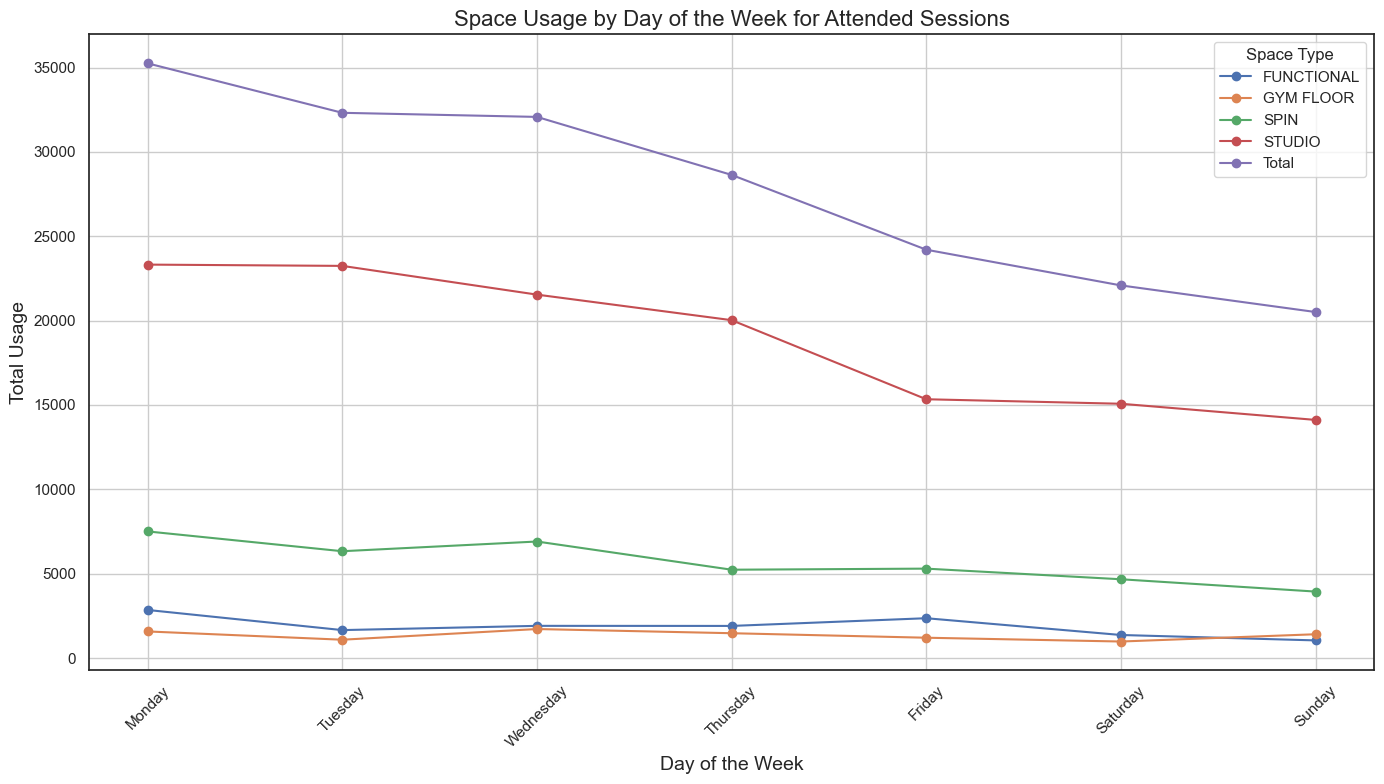

In [58]:
# Ensure the data is ordered correctly for the line chart, from Monday to Sunday
space_usage_day_of_week_ordered_for_line_chart = space_usage_by_day_of_week.set_index('day_name').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).reset_index()

plt.figure(figsize=(14, 8))

# Plot each space type as a separate line
for column in space_usage_day_of_week_ordered_for_line_chart.columns[1:]:  # Skipping 'day_name'
    plt.plot(space_usage_day_of_week_ordered_for_line_chart['day_name'], space_usage_day_of_week_ordered_for_line_chart[column], marker='o', label=column)

plt.title('Space Usage by Day of the Week for Attended Sessions', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Total Usage', fontsize=14)
plt.xticks(rotation=45)  # Helps with readability of the day names
plt.legend(title='Space Type')
plt.grid(True)
plt.tight_layout()  # Adjusts subplots to fit into the figure area.
plt.show()

#### Analysis of Space Usage by Day:
- Monday: Shows the highest total usage across all types of spaces with 35,247. 'STUDIO' leads significantly, suggesting it's the most popular start to the week.
- Tuesday and Wednesday: Both days also show strong usage, especially in 'STUDIO' and 'SPIN', with totals of 32,315 and 32,072 respectively. These midweek days continue to maintain high engagement levels.
- Thursday: Sees a dip in total usage (28,634) compared to earlier in the week, but 'STUDIO' remains highly attended.
- Friday: Marks a further decline in total gym usage to 24,201, with decreases across all space types except for 'FUNCTIONAL' which peaks on this day.
- Saturday: Weekend usage begins with a total of 22,085, which is lower than any weekday. While 'STUDIO' and 'SPIN' still have considerable attendance, the overall participation drops.
- Sunday: Shows the lowest attendance of the week with a total of 20,507. Despite a higher attendance in 'GYM FLOOR' compared to Saturday, all other spaces see reduced numbers.
#### Summary:
The data indicates that gym attendance is highest at the beginning of the week, particularly in 'STUDIO' spaces, and gradually declines towards the weekend. 

## 3.2.8 Space utilisation

In [59]:
# To understand if the space is being used optimally, we can compare the class capacity (class_capacity) with the total attendance (Total2)
# for each space type, considering only sessions marked as "ATTENDED".

# Grouping the data by 'space_type' to calculate the sum of 'Total2' and the sum of 'class_capacity'
space_usage_vs_capacity = attended_space_data.groupby('space_type').agg(
    total_attendance=pd.NamedAgg(column='Total2', aggfunc='sum'),
    total_capacity=pd.NamedAgg(column='class_capacity', aggfunc='sum')
).reset_index()

# Calculating the utilization percentage as total_attendance / total_capacity
space_usage_vs_capacity['utilization_percentage'] = round(((space_usage_vs_capacity['total_attendance'] / space_usage_vs_capacity['total_capacity']) * 100), 2)

space_usage_vs_capacity

space_type  total_attendance  total_capacity  utilization_percentage
0  FUNCTIONAL             13087           28794                   45.45
1   GYM FLOOR              9445           19373                   48.75
2        SPIN             39883           66795                   59.71
3      STUDIO            132646          348644                   38.05

#### Spin Space Utilization: 
- Spin has the highest utilization percentage at approximately 60%.
- This indicates high popularity and strong demand for spin classes.
- Considerations might include increasing capacity or adding more classes to meet demand.
#### Functional and Gym Floor Utilization:
- Functional space and Gym Floor have utilization percentages of 45% and 49%, respectively.
- Indicates a healthy interest but suggests potential for increased participation.
- Opportunities may exist to optimize scheduling and capacity to enhance utilization.
#### Studio Space Utilization:
- Studio space has the lowest utilization at 38%.
- Despite its versatility for hosting various classes, utilization is relatively low.
- This low figure could suggest an oversupply of studio space, a need for more diverse class offerings.
- Potential mismatches in class scheduling with member preferences or availability.


#### Insights:

- Underutilization Across Spaces: All four space types show signs of underutilization, with none reaching or exceeding 60% capacity usage. This suggests there is significant room for increasing attendance and better leveraging existing resources.

- Opportunities for Improvement: The relatively low utilization rates highlight opportunities for gyms to enhance marketing efforts, adjust class schedules, and introduce new programs aimed at increasing participation. Focusing on community-building activities and personalized member engagement could help in drawing more attendees.

- Strategic Planning: Understanding these utilization patterns can aid in strategic planning for class offerings, space renovations, or expansions. For example, reallocating space from underutilized areas to those with higher demand or adjusting the size of class spaces to better match attendance patterns.

- Efficiency Measures: The data suggests a need for efficiency measures, such as dynamic scheduling based on demand, targeted promotions for low-attendance classes, or reevaluating the types of classes offered in underutilized spaces.

- Improving space utilization not only enhances the member experience by offering more of what they want but also contributes to the financial health of the gym by maximizing the return on investment in space and resources

## 3.2.9 Space utilisation if everyone that booked attended.

In [60]:
# Calculate the total bookings (Total2) for each space type without the 'ATTENDED' filter,
# using the total capacity figures from the previous attended analysis for a direct comparison.
total_bookings_no_filter = class_data_split.groupby('space_type')['Total2'].sum().reset_index()

# Merge total bookings with the total capacity from the attended analysis
space_usage_vs_capacity_with_bookings = space_usage_vs_capacity[['space_type', 'total_capacity']].merge(
    total_bookings_no_filter, on='space_type', how='left'
)

# Calculating the utilization percentage based on total bookings using the same capacity figures
space_usage_vs_capacity_with_bookings['utilization_percentage_bookings'] = round((
    space_usage_vs_capacity_with_bookings['Total2'] / space_usage_vs_capacity_with_bookings['total_capacity']
) * 100,2)

space_usage_vs_capacity_with_bookings.rename(columns={'Total2': 'total_bookings'}, inplace=True)

space_usage_vs_capacity_with_bookings

space_type  total_capacity  total_bookings  utilization_percentage_bookings
0  FUNCTIONAL           28794           26009                            90.33
1   GYM FLOOR           19373           16837                            86.91
2        SPIN           66795           86481                           129.47
3      STUDIO          348644          234068                            67.14

### Insights:

#### Spin Utilization Based on Bookings:
- Spin class bookings show a utilization percentage of 129%, significantly exceeding the total capacity.
- This overbooking suggests a demand that surpasses available supply, possibly due to double bookings, waitlists, or non-attending members.
- This highlights the need to increase spin class capacity or improve booking and attendance management.

#### Gym Floor Utilization:
- Gym Floor shows a high utilization percentage of 86% based on bookings, nearing total capacity.
- This indicates a strong and consistent demand for weight training spaces, 
with little room for additional bookings without risking overcapacity.

#### Functional Space Utilization:
- Functional space booking utilization is 90%, closely approaching total capacity.
- This high demand shows that the space is being used effectively, 
with limited margin for growth without expanding capacity or optimizing the schedule.

#### Studio Utilization Based on Bookings:
- Studio space has a booking utilization of 67%, which is an improvement over its 
attendance-based utilization but still below full capacity.
- This suggests potential excess capacity in studio spaces or opportunities to increase bookings through enhanced marketing, diversifying 
class offerings.


#### Overall Insights:

Capacity Management: The overbooking in Spin and nearly full bookings in Gym Floor and Functional spaces suggest a need for capacity management, possibly through increased space, additional class times, or improved booking systems to prevent overbooking and optimize space use.

Demand Assessment and Space Reallocation: The significant overbooking in Spin classes highlights a mismatch between supply and demand, suggesting a potential to reallocate space or resources from underutilized areas (like Studio) to meet the high demand in Spin classes.

Studio Space Opportunity: While Studio spaces are less utilized based on both attendance and bookings compared to other areas, they present an opportunity to increase utilization through strategic adjustments in offerings or promoting underbooked classes more effectively.

Member Engagement and Retention: Understanding the reasons behind the booking patterns and addressing the overbooking issue, especially in Spin classes, can enhance member satisfaction and retention by ensuring members can participate in their preferred activities.

This analysis indicates where demand exceeds capacity, where there is room for growth, and how space utilization can be optimized to better meet member needs and preferences.

# 3.3 Class Inclusion Score - Alasdair Bell

## 3.3.1 Load and Explore data

In [61]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import date2num, MonthLocator
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Import and view the dataset

class_data = pd.read_csv('class_data_final.csv')

print(class_data.shape)
print(class_data.info())
class_data.head()

(60128, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60128 entries, 0 to 60127
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   booking_id            60128 non-null  object
 1   class_name            60128 non-null  object
 2   center_id             60128 non-null  int64 
 3   state                 60128 non-null  object
 4   start_date_time       60128 non-null  object
 5   stop_date_time        60128 non-null  object
 6   class_capacity        60128 non-null  int64 
 7   participation_status  60128 non-null  object
 8   female                60128 non-null  int64 
 9   male                  60128 non-null  int64 
 10  unknown               60128 non-null  int64 
 11  Total                 60128 non-null  int64 
 12  age_16_17             60128 non-null  int64 
 13  age_18_22             60128 non-null  int64 
 14  age_23_28             60128 non-null  int64 
 15  age_29_34             60

booking_id class_name  center_id   state   start_date_time  \
0  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
1  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
2  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
3  264book26982   Bodytone        264  ACTIVE  01/09/2022 07:30   
4  264book26982   Bodytone        264  ACTIVE  01/09/2022 07:30   

     stop_date_time  class_capacity participation_status  female  male  ...  \
0  01/09/2022 08:00              23            CANCELLED       2     0  ...   
1  01/09/2022 08:00              23              NO SHOW       1     0  ...   
2  01/09/2022 08:00              23             ATTENDED       1     0  ...   
3  01/09/2022 08:00              12            CANCELLED       2     0  ...   
4  01/09/2022 08:00              12             ATTENDED       3     1  ...   

   age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  age_over_45  Total2  \
0          0          0          0          2          0            0       2   
1          0          0          0          1          0            0       1   
2          0          0          1          0          0            0       1   
3          0          0          1          0          1            1       3   
4          0          0          1          0          2            3       6   

    class_key  space_type  Timetable/Extra  
0        6693      STUDIO        Timetable  
1        6694      STUDIO        Timetable  
2        6695      STUDIO        Timetable  
3  8589942994      STUDIO        Timetable  
4  8589942995      STUDIO        Timetable  

[5 rows x 22 columns]

## 3.3.2 Data Cleaning and Preparation

In [63]:
# Capitalise first words of Extra classes

class_data.loc[class_data['Timetable/Extra'] == 'Extra', 'class_name'] = class_data.loc[class_data['Timetable/Extra'] == 'Extra', 'class_name'].apply(lambda x: x.capitalize())

### Normalise attendance figures based on number of centres

In [64]:
# Step 1: Count the number of centers offering each class
centers_per_class = class_data.groupby('class_name')['center_id'].nunique().reset_index(name='centers_offering')

# Step 2: Merge this count back with your main DataFrame
class_data = class_data.merge(centers_per_class, on='class_name', how='left')

# Step 3: Normalize attendance figures
class_data['normalized_Total2'] = class_data['Total2'] / class_data['centers_offering']
class_data['normalized_male'] = class_data['male'] / class_data['centers_offering']
class_data['normalized_female'] = class_data['female'] / class_data['centers_offering']

In [65]:
# Remove Sporadic Classes

# List of classes to exclude
classes_to_exclude = ['Bhf charity class', 'Box fit for heart month', 'Charity class', 'Get started']

# Filter out the specified classes
class_data = class_data[~class_data['class_name'].isin(classes_to_exclude)]

# Display the top rows of the filtered DataFrame to verify
class_data.head()

booking_id class_name  center_id   state   start_date_time  \
0  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
1  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
2  168book70613        LBT        168  ACTIVE  01/09/2022 07:30   
3  264book26982   Bodytone        264  ACTIVE  01/09/2022 07:30   
4  264book26982   Bodytone        264  ACTIVE  01/09/2022 07:30   

     stop_date_time  class_capacity participation_status  female  male  ...  \
0  01/09/2022 08:00              23            CANCELLED       2     0  ...   
1  01/09/2022 08:00              23              NO SHOW       1     0  ...   
2  01/09/2022 08:00              23             ATTENDED       1     0  ...   
3  01/09/2022 08:00              12            CANCELLED       2     0  ...   
4  01/09/2022 08:00              12             ATTENDED       3     1  ...   

   age_35_44  age_over_45  Total2   class_key  space_type  Timetable/Extra  \
0          0            0       2        6693      STUDIO        Timetable   
1          0            0       1        6694      STUDIO        Timetable   
2          0            0       1        6695      STUDIO        Timetable   
3          1            1       3  8589942994      STUDIO        Timetable   
4          2            3       6  8589942995      STUDIO        Timetable   

   centers_offering  normalized_Total2  normalized_male  normalized_female  
0                10                0.2              0.0                0.2  
1                10                0.1              0.0                0.1  
2                10                0.1              0.0                0.1  
3                10                0.3              0.0                0.2  
4                10                0.6              0.1                0.3  

[5 rows x 26 columns]

## 3.3.3 - Calculate Metrics

### Average Monthly Attendance to Capacity

In [66]:
# Filter the dataset for entries with participation status as "ATTENDED"
attended_classes = class_data[class_data['participation_status'] == 'ATTENDED']

In [67]:
# Monthly attendance

# Convert the start_date_time column to datetime format to extract the year and month
attended_classes['start_date_time'] = pd.to_datetime(attended_classes['start_date_time'], format='%d/%m/%Y %H:%M')

# Extract year and month from the start_date_time for grouping
attended_classes['YearMonth'] = attended_classes['start_date_time'].dt.to_period('M')

# Group by class name and YearMonth to calculate average attendance, average capacity, and attendance to capacity ratio
monthly_attendance_capacity = attended_classes.groupby(['class_name', 'YearMonth']).agg({
    'Total2': 'mean',  # Average attendance
    'class_capacity': 'mean',  # Average capacity
}).reset_index()

#Rename columns for clarity after applying the "ATTENDED" filter
monthly_attendance_capacity.columns = ['Class Name', 'Month', 'Average Monthly Attendance',
                                       'Average Monthly Capacity']

# Calculate the attendance to capacity ratio
monthly_attendance_capacity['Attendance to Capacity Ratio'] = monthly_attendance_capacity['Average Monthly Attendance'] / monthly_attendance_capacity['Average Monthly Capacity']

monthly_attendance_capacity.to_csv('monthly_attendance_capacity.csv')

monthly_attendance_capacity

Class Name    Month  Average Monthly Attendance  \
0    Absolute abs  2022-09                    4.954545   
1    Absolute abs  2022-10                    4.567901   
2    Absolute abs  2022-11                    5.447368   
3    Absolute abs  2022-12                    3.793103   
4    Absolute abs  2023-01                    6.000000   
..            ...      ...                         ...   
330         Zumba  2023-04                   10.708333   
331         Zumba  2023-05                    8.884615   
332         Zumba  2023-06                    7.285714   
333         Zumba  2023-07                    9.066667   
334         Zumba  2023-08                    9.656250   

     Average Monthly Capacity  Attendance to Capacity Ratio  
0                   26.348485                      0.188039  
1                   25.876543                      0.176527  
2                   25.618421                      0.212635  
3                   26.000000                      0.145889  
4                   25.000000                      0.240000  
..                        ...                           ...  
330                 27.500000                      0.389394  
331                 29.076923                      0.305556  
332                 28.285714                      0.257576  
333                 28.133333                      0.322275  
334                 27.812500                      0.347191  

[335 rows x 5 columns]

### Key Demand Metric 1: Growth Score - Monthly Attendance Coefficients

In [68]:
# Step 1: Prepare the data
attended_classes['year_month'] = attended_classes['start_date_time'].dt.to_period('M')
monthly_attendance_all = attended_classes.groupby(['class_name', 'year_month'])['normalized_Total2'].sum().unstack(fill_value=0)

# Extended code to calculate coefficients and R² values for all classes
model_fits = []

for class_name, row in monthly_attendance_all.iterrows():
    X = np.arange(len(row)).reshape(-1, 1)  # Time as a simple linear range
    Y = row.values.reshape(-1, 1)  # Monthly attendance figures
    model = LinearRegression().fit(X, Y)
    
    # Calculating the R² value
    r_squared = model.score(X, Y)
    
    model_fits.append({
        'Class Name': class_name,
        'Coefficient': model.coef_[0][0],
        'R²': r_squared
    })

# Convert the list of dictionaries to a DataFrame
model_fits_df = pd.DataFrame(model_fits)

# Sort the DataFrame by the coefficient to identify the highest, as before
coefficients_sorted = model_fits_df.sort_values(by='Coefficient', ascending=False)

coefficients_sorted.head()

Class Name  Coefficient        R²
9       Cycle    13.802448  0.276847
14        LBT     9.280769  0.353050
1    Aerobics     5.085664  0.672884
6    Circuits     4.342657  0.301697
10      Dance     3.848485  0.596817

### Example Monthly Attendance Regression

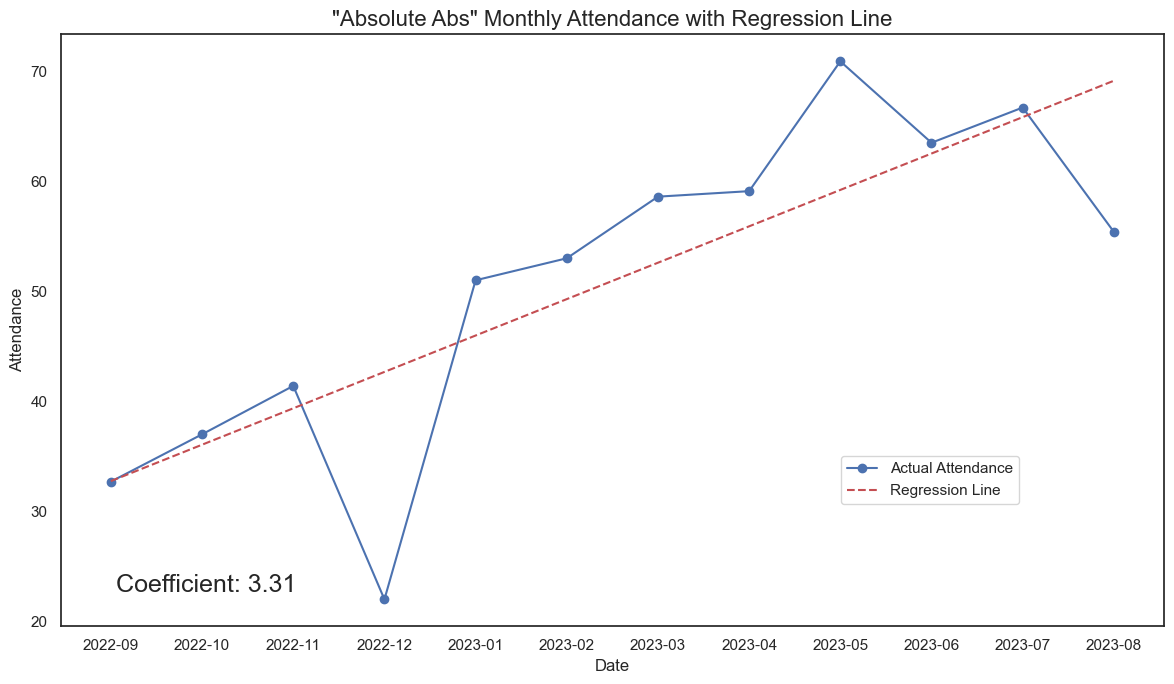

In [69]:
# Extract the monthly attendance data for 'absolute abs'
absolute_abs_attendance = monthly_attendance_all.loc['Absolute abs']

# Prepare the data for regression
X = np.arange(len(absolute_abs_attendance)).reshape(-1, 1)  # Time as a simple linear range
Y = absolute_abs_attendance.values.reshape(-1, 1)  # Monthly attendance figures

# Fit the linear regression model again if needed
model = LinearRegression().fit(X, Y)

# Predict the regression line
Y_pred = model.predict(X)

# Calculate R-squared value
r_squared = model.score(X, Y)

# Extract and format date labels from the 'year_month' index (assuming this is already defined as date_labels)
date_labels = absolute_abs_attendance.index.astype(str)

# Plotting with adjustments for legend and annotations
plt.figure(figsize=(14, 7))
plt.plot(date_labels, Y, 'b-o', label='Actual Attendance')  # Actual attendance as a line plot
plt.plot(date_labels, Y_pred, 'r--', label='Regression Line')  # Regression line

# Coefficient annotation only
coefficient = model.coef_[0][0]  # Slope of the regression line
annotation_text = f'Coefficient: {coefficient:.2f}'
# Move the annotation to a different part of the graph if needed, e.g., bottom left
plt.text(0.05, 0.05, annotation_text, ha='left', va='bottom', transform=plt.gca().transAxes,
         bbox=dict(boxstyle="round", alpha=0.5, facecolor='white'), fontsize=18)

plt.title('"Absolute Abs" Monthly Attendance with Regression Line', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Attendance')


# Adjusting legend position outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(0.7, 0.3))  # Place legend outside the plot
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the outside legend
plt.show()

### Key Demand Metric 2: Monthly Average Attendance to Capacity Ratio Coefficients

In [70]:
# Ensure 'Month' is in a sortable format (it should be if it's a PeriodIndex from dt.to_period('M'))
# Convert 'Month' to a numeric value for linear regression
monthly_attendance_capacity['MonthNumeric'] = monthly_attendance_capacity['Month'].apply(lambda x: x.ordinal)

# Initialize a DataFrame to store the coefficients for each class
coefficients = []

for class_name in monthly_attendance_capacity['Class Name'].unique():
    class_data_cap = monthly_attendance_capacity[monthly_attendance_capacity['Class Name'] == class_name]
    
    # Prepare X (MonthNumeric) and Y (Attendance to Capacity Ratio) for regression
    X = class_data_cap[['MonthNumeric']]
    Y = class_data_cap['Attendance to Capacity Ratio']
    
    # Perform linear regression
    model = LinearRegression().fit(X, Y)
    
    # Store the coefficient and class name
    coefficient = model.coef_[0]
    coefficients.append({'Class Name': class_name, 'Coefficient': coefficient, 'R²': model.score(X, Y)})

# Convert the list of dictionaries into a DataFrame for easy viewing
coefficients_attended_cap = pd.DataFrame(coefficients).sort_values(by='Coefficient', ascending=False)

coefficients_attended_cap

Class Name  Coefficient        R²
1                        Aerobics     0.105689  0.441441
4                         Box fit     0.044386  0.572807
12                           Heat     0.028499  0.157602
29                           Yoga     0.023548  0.797905
30                          Zumba     0.021117  0.586556
9                           Cycle     0.020549  0.544490
21                         Metcon     0.019262  0.435145
26                        Stretch     0.012235  0.687535
25                       Strength     0.011529  0.367984
13                     Kettlebell     0.010240  0.149422
0                    Absolute abs     0.009955  0.519340
22                        Pilates     0.009932  0.059646
14                            LBT     0.008445  0.180386
6                        Circuits     0.006286  0.136031
3                        Bootcamp     0.006004  0.274411
23                           Pump     0.005929  0.104440
2                        Bodytone     0.005014  0.066543
28  Womens weightlifting workshop     0.002892  0.017788
5                         Burn it     0.001239  0.009649
24                           Step     0.000496  0.000332
18                   Learn to run     0.000000  1.000000
8             Complimentary 1-2-1    -0.002739  0.000529
27                          Sweat    -0.003033  0.043348
17          Learn to olympic lift    -0.003301  0.008037
16                  Learn to lift    -0.003957  0.108714
10                          Dance    -0.004594  0.017583
7                          Combat    -0.007760  0.043621
20          Learn to train glutes    -0.009019  0.083890
19                 Learn to squat    -0.024396  0.237993
15              Learn to deadlift    -0.027138  0.359390
11                     Functional    -0.055208  0.448432

In [71]:
monthly_attendance_capacity

Class Name    Month  Average Monthly Attendance  \
0    Absolute abs  2022-09                    4.954545   
1    Absolute abs  2022-10                    4.567901   
2    Absolute abs  2022-11                    5.447368   
3    Absolute abs  2022-12                    3.793103   
4    Absolute abs  2023-01                    6.000000   
..            ...      ...                         ...   
330         Zumba  2023-04                   10.708333   
331         Zumba  2023-05                    8.884615   
332         Zumba  2023-06                    7.285714   
333         Zumba  2023-07                    9.066667   
334         Zumba  2023-08                    9.656250   

     Average Monthly Capacity  Attendance to Capacity Ratio  MonthNumeric  
0                   26.348485                      0.188039           632  
1                   25.876543                      0.176527           633  
2                   25.618421                      0.212635           634  
3                   26.000000                      0.145889           635  
4                   25.000000                      0.240000           636  
..                        ...                           ...           ...  
330                 27.500000                      0.389394           639  
331                 29.076923                      0.305556           640  
332                 28.285714                      0.257576           641  
333                 28.133333                      0.322275           642  
334                 27.812500                      0.347191           643  

[335 rows x 6 columns]

### Example Month Attendance Capacity Ratio Regression

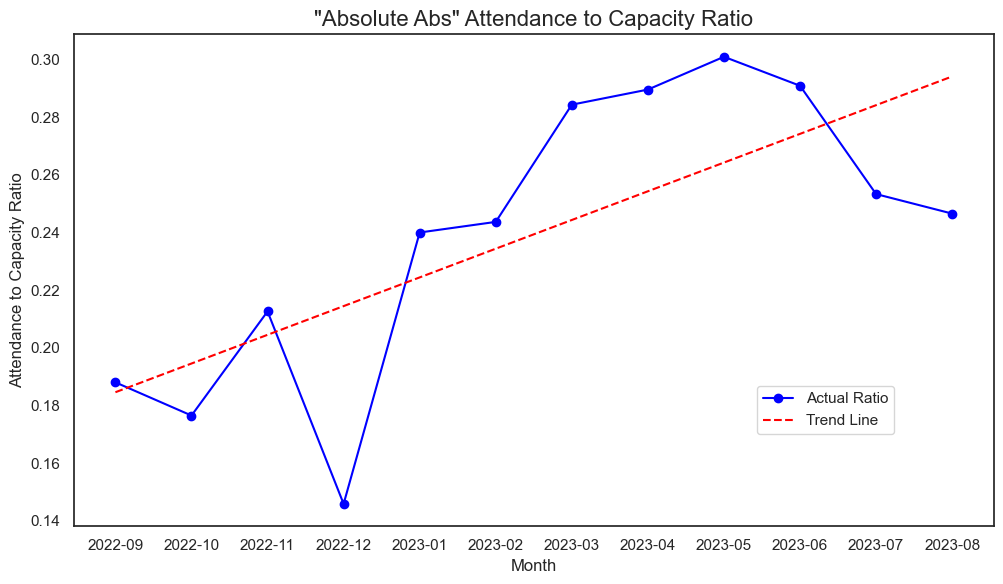

In [72]:
# Filter the DataFrame for a specific class, e.g., "Absolute abs"
class_specific_data = monthly_attendance_capacity[monthly_attendance_capacity['Class Name'] == 'Absolute abs']

# Ensure the data is sorted by Month if it's not already
class_specific_data.sort_values('Month', inplace=True)

# Prepare data for regression
X = np.arange(len(class_specific_data.index)).reshape(-1, 1)  # Use a simple integer sequence for X
Y = class_specific_data['Attendance to Capacity Ratio'].values.reshape(-1, 1)

# Perform linear regression
model = LinearRegression().fit(X, Y)
# Predict Y values for the trend line
Y_pred = model.predict(X)

# Calculate R-squared
r_squared = model.score(X, Y)

# Plotting

plt.figure(figsize=(12, 6))
plt.plot(class_specific_data['Month'].astype(str), Y, label='Actual Ratio', color = 'blue', marker='o', linestyle='-')
plt.plot(class_specific_data['Month'].astype(str), Y_pred, label='Trend Line', color='red', linestyle='--')


plt.xlabel('Month')
plt.ylabel('Attendance to Capacity Ratio')
plt.title('"Absolute Abs" Attendance to Capacity Ratio', fontsize=16)
plt.legend()
plt.tight_layout()

# Adjusting legend position outside the plot
plt.legend(loc='upper right', bbox_to_anchor=(0.9, 0.3))  # Place legend outside the plot

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the layout to make room for the outside legend

plt.show()


### Key Demand Metric 3: Waiting Lists

In [73]:
# Filter out entries with 'Total2' as 0 for 'WAITING LIST' participation status
filtered_waiting_list_data = class_data[(class_data['participation_status'] == 'WAITING LIST') & (class_data['Total2'] > 0)]

# Step 1: Filter and calculate totals for 'WAITING LIST' and 'ATTENDED'
waiting_list_totals = filtered_waiting_list_data.groupby('class_name')['Total2'].sum().reset_index(name='Total Waiting List')
attended_totals = class_data[class_data['participation_status'] == 'ATTENDED'].groupby('class_name')['Total2'].sum().reset_index(name='Total Attended')

# Merge the waiting list and attended totals on 'class_name' using an 'outer' merge
waiting_list_ratio = pd.merge(waiting_list_totals, attended_totals, on='class_name', how='outer').fillna(0)

# Calculate the 'Waitlist to Attended Ratio'
waiting_list_ratio['Waitlist to Attended Ratio'] = waiting_list_ratio['Total Waiting List'] / waiting_list_ratio['Total Attended']

# Sort the DataFrame by 'Waitlist to Attended Ratio'
waiting_list_ratio.sort_values(by='Waitlist to Attended Ratio', ascending=False, inplace=True)

waiting_list_ratio.rename(columns={'class_name': 'Class Name'}, inplace=True)

waiting_list_ratio.head()

Class Name  Total Waiting List  Total Attended  Waitlist to Attended Ratio
6        Heat                58.0             301                    0.192691
12       Step               450.0            3685                    0.122117
5       Cycle              4781.0           39883                    0.119876
2     Box fit                13.0             120                    0.108333
15      Sweat               841.0            7918                    0.106214

### Key Demand Metric 4: Normalised Attendance

In [74]:
# Calculate total attendance

total_attendance = attended_classes.groupby(['class_name', 'Timetable/Extra'])['normalized_Total2'].sum().reset_index(name='Normalised Attendance')

# Rename Column
total_attendance.rename(columns={'class_name': 'Class Name'}, inplace=True)

# Sort by Total Attendance
total_attendance.sort_values(by='Normalised Attendance', ascending=False)

Class Name Timetable/Extra  Normalised Attendance
9                           Cycle       Timetable            6647.166667
14                            LBT       Timetable            2825.500000
23                           Pump       Timetable            2586.400000
2                        Bodytone       Timetable            2360.500000
6                        Circuits       Timetable            1643.600000
5                         Burn it       Timetable            1102.900000
27                          Sweat       Timetable             989.750000
25                       Strength       Timetable             844.000000
3                        Bootcamp       Timetable             712.250000
0                    Absolute abs           Extra             611.300000
29                           Yoga       Timetable             574.142857
24                           Step       Timetable             526.428571
21                         Metcon           Extra             523.714286
30                          Zumba       Timetable             368.666667
10                          Dance       Timetable             309.333333
13                     Kettlebell           Extra             289.500000
1                        Aerobics       Timetable             199.500000
26                        Stretch           Extra             196.000000
11                     Functional           Extra             156.000000
22                        Pilates       Timetable             140.000000
16                  Learn to lift           Extra             124.000000
7                          Combat       Timetable             123.400000
12                           Heat       Timetable             100.333333
28  Womens weightlifting workshop           Extra              56.222222
15              Learn to deadlift           Extra              45.000000
20          Learn to train glutes           Extra              44.833333
4                         Box fit           Extra              40.000000
8             Complimentary 1-2-1           Extra              37.500000
17          Learn to olympic lift           Extra              32.000000
19                 Learn to squat           Extra              22.166667
18                   Learn to run           Extra               2.000000

## 3.3.4 Merge Metrics

In [75]:
# Merge the filtered metrics into a single DataFrame for analysis
merged_data = pd.merge(coefficients_sorted, coefficients_attended_cap, on='Class Name', suffixes=(' Growth Score', ' Capacity Utilisation'))
merged_data = pd.merge(merged_data,waiting_list_ratio, on='Class Name')
merged_data = pd.merge(merged_data,total_attendance, on='Class Name')

# Drop the 'R-squared', 'Total Waiting List', and 'Total Attended' columns.
columns_to_drop = ['R²_attendance', 'R² Capacity Utilisation', 'R² Growth Score', 'Total Waiting List', 'Total Attended']
for column in columns_to_drop:
    if column in merged_data.columns:
        merged_data.drop(column, axis=1, inplace=True)

merged_data.head()


Class Name  Coefficient Growth Score  Coefficient Capacity Utilisation  \
0      Cycle                 13.802448                          0.020549   
1        LBT                  9.280769                          0.008445   
2   Aerobics                  5.085664                          0.105689   
3   Circuits                  4.342657                          0.006286   
4      Dance                  3.848485                         -0.004594   

   Waitlist to Attended Ratio Timetable/Extra  Normalised Attendance  
0                    0.119876       Timetable            6647.166667  
1                    0.042364       Timetable            2825.500000  
2                    0.000000       Timetable             199.500000  
3                    0.015393       Timetable            1643.600000  
4                    0.000000       Timetable             309.333333

## 3.3.5 Standardise Metrics

### CIS derived from Min max scaling and Weighted Sum model

In [76]:
# Use Min Max Scaling to standardise the metrics

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

merged_data_scaled = merged_data.copy()
merged_data_scaled[['Coefficient Growth Score', 'Coefficient Capacity Utilisation', 'Waitlist to Attended Ratio',
                    'Normalised Attendance']] = scaler.fit_transform(merged_data[['Coefficient Growth Score',
                                                                                     'Coefficient Capacity Utilisation', 'Waitlist to Attended Ratio',
                                                                                      'Normalised Attendance']])

merged_data_scaled['CIS'] = (merged_data_scaled['Coefficient Growth Score'] + 
                             merged_data_scaled['Coefficient Capacity Utilisation'] + 
                             merged_data_scaled['Waitlist to Attended Ratio'] + 
                             merged_data_scaled['Normalised Attendance'])

merged_data_scaled = merged_data_scaled.sort_values(by='CIS', ascending=False)

merged_data_scaled

Class Name  Coefficient Growth Score  \
0                           Cycle                  1.000000   
19                           Heat                  0.244988   
1                             LBT                  0.737661   
2                        Aerobics                  0.494269   
18                        Box fit                  0.253170   
11                       Bodytone                  0.322487   
10                          Sweat                  0.330206   
13                           Pump                  0.280231   
6                            Yoga                  0.405170   
21                           Step                  0.216220   
3                        Circuits                  0.451161   
9                          Metcon                  0.333676   
17                       Strength                  0.253286   
16                     Kettlebell                  0.258647   
5                           Zumba                  0.407682   
14                        Burn it                  0.279197   
7                    Absolute abs                  0.391135   
8                         Stretch                  0.344399   
12                       Bootcamp                  0.303327   
4                           Dance                  0.422490   
15                        Pilates                  0.271021   
20  Womens weightlifting workshop                  0.234867   
22            Complimentary 1-2-1                  0.210468   
25                   Learn to run                  0.197180   
24          Learn to olympic lift                  0.200020   
28                  Learn to lift                  0.160747   
26          Learn to train glutes                  0.179430   
29                         Combat                  0.153565   
23                 Learn to squat                  0.203097   
27              Learn to deadlift                  0.172715   
30                     Functional                  0.000000   

    Coefficient Capacity Utilisation  Waitlist to Attended Ratio  \
0                           0.470843                    0.622113   
19                          0.520254                    1.000000   
1                           0.395615                    0.219856   
2                           1.000000                    0.000000   
18                          0.618989                    0.562213   
11                          0.374292                    0.311533   
10                          0.324276                    0.551212   
13                          0.379975                    0.248407   
6                           0.489481                    0.315072   
21                          0.346211                    0.633744   
3                           0.382193                    0.079885   
9                           0.462842                    0.260474   
17                          0.414779                    0.336432   
16                          0.406770                    0.354044   
5                           0.474372                    0.096192   
14                          0.350830                    0.151045   
7                           0.404998                    0.044995   
8                           0.419169                    0.011348   
12                          0.380443                    0.000000   
4                           0.314576                    0.000000   
15                          0.404854                    0.051897   
20                          0.361098                    0.000000   
22                          0.326104                    0.000000   
25                          0.343127                    0.000000   
24                          0.322612                    0.000000   
28                          0.318536                    0.000000   
26                          0.287070                    0.000000   
29                          0.294900                    0.000000   
23                          0.1915

## 3.3.6 Weight Metrics

In [77]:
# Use WSM to weight the importance of the Metric

# Assign weights based on importance
weights = {'Coefficient Growth Score': 0.4, 'Coefficient Capacity Utilisation': 0.1,
           'Waitlist to Attended Ratio': 0.1, 'Normalised Attendance':0.4}

# Calculate the weighted sum
merged_data_scaled['CIS'] = (merged_data_scaled['Coefficient Growth Score'] * weights['Coefficient Growth Score'] +
             merged_data_scaled['Coefficient Capacity Utilisation'] * weights['Coefficient Capacity Utilisation'] +
             merged_data_scaled['Waitlist to Attended Ratio'] * weights['Waitlist to Attended Ratio'] +
             merged_data_scaled['Normalised Attendance'] * weights['Normalised Attendance'])

merged_data_scaled = merged_data_scaled.sort_values(by='CIS', ascending=False)
merged_data_scaled.reset_index(drop=True, inplace=True)
merged_data_scaled


Class Name  Coefficient Growth Score  \
0                           Cycle                  1.000000   
1                             LBT                  0.737661   
2                        Bodytone                  0.322487   
3                            Pump                  0.280231   
4                        Circuits                  0.451161   
5                        Aerobics                  0.494269   
6                           Sweat                  0.330206   
7                            Yoga                  0.405170   
8                            Heat                  0.244988   
9                           Zumba                  0.407682   
10                   Absolute abs                  0.391135   
11                         Metcon                  0.333676   
12                        Burn it                  0.279197   
13                       Strength                  0.253286   
14                        Box fit                  0.253170   
15                          Dance                  0.422490   
16                           Step                  0.216220   
17                       Bootcamp                  0.303327   
18                     Kettlebell                  0.258647   
19                        Stretch                  0.344399   
20                        Pilates                  0.271021   
21  Womens weightlifting workshop                  0.234867   
22            Complimentary 1-2-1                  0.210468   
23          Learn to olympic lift                  0.200020   
24                   Learn to run                  0.197180   
25                  Learn to lift                  0.160747   
26          Learn to train glutes                  0.179430   
27                 Learn to squat                  0.203097   
28                         Combat                  0.153565   
29              Learn to deadlift                  0.172715   
30                     Functional                  0.000000   

    Coefficient Capacity Utilisation  Waitlist to Attended Ratio  \
0                           0.470843                    0.622113   
1                           0.395615                    0.219856   
2                           0.374292                    0.311533   
3                           0.379975                    0.248407   
4                           0.382193                    0.079885   
5                           1.000000                    0.000000   
6                           0.324276                    0.551212   
7                           0.489481                    0.315072   
8                           0.520254                    1.000000   
9                           0.474372                    0.096192   
10                          0.404998                    0.044995   
11                          0.462842                    0.260474   
12                          0.350830                    0.151045   
13                          0.414779                    0.336432   
14                          0.618989                    0.562213   
15                          0.314576                    0.000000   
16                          0.346211                    0.633744   
17                          0.380443                    0.000000   
18                          0.406770                    0.354044   
19                          0.419169                    0.011348   
20                          0.404854                    0.051897   
21                          0.361098                    0.000000   
22                          0.326104                    0.000000   
23                          0.322612                    0.000000   
24                          0.343127                    0.000000   
25                          0.318536                    0.000000   
26                          0.287070                    0.000000   
27                          0.191504                    0.000000   
28                          0.2949

## 3.3.7 Rank Metrics

In [78]:
# Rank classes based on each factor

merged_data_scaled['Normalised Attendance Rank'] = merged_data_scaled['Normalised Attendance'].rank(ascending=False)
merged_data_scaled['Growth Score Rank'] = merged_data_scaled['Coefficient Growth Score'].rank(ascending=False)
merged_data_scaled['Capacity Utilisation Rank'] = merged_data_scaled['Coefficient Capacity Utilisation'].rank(ascending=False)
merged_data_scaled['Waitlist Ratio Rank'] = merged_data_scaled['Waitlist to Attended Ratio'].rank(ascending=False)
merged_data_scaled['CIS Rank'] = merged_data_scaled['CIS'].rank(ascending=False)
merged_data_scaled

Class Name  Coefficient Growth Score  \
0                           Cycle                  1.000000   
1                             LBT                  0.737661   
2                        Bodytone                  0.322487   
3                            Pump                  0.280231   
4                        Circuits                  0.451161   
5                        Aerobics                  0.494269   
6                           Sweat                  0.330206   
7                            Yoga                  0.405170   
8                            Heat                  0.244988   
9                           Zumba                  0.407682   
10                   Absolute abs                  0.391135   
11                         Metcon                  0.333676   
12                        Burn it                  0.279197   
13                       Strength                  0.253286   
14                        Box fit                  0.253170   
15                          Dance                  0.422490   
16                           Step                  0.216220   
17                       Bootcamp                  0.303327   
18                     Kettlebell                  0.258647   
19                        Stretch                  0.344399   
20                        Pilates                  0.271021   
21  Womens weightlifting workshop                  0.234867   
22            Complimentary 1-2-1                  0.210468   
23          Learn to olympic lift                  0.200020   
24                   Learn to run                  0.197180   
25                  Learn to lift                  0.160747   
26          Learn to train glutes                  0.179430   
27                 Learn to squat                  0.203097   
28                         Combat                  0.153565   
29              Learn to deadlift                  0.172715   
30                     Functional                  0.000000   

    Coefficient Capacity Utilisation  Waitlist to Attended Ratio  \
0                           0.470843                    0.622113   
1                           0.395615                    0.219856   
2                           0.374292                    0.311533   
3                           0.379975                    0.248407   
4                           0.382193                    0.079885   
5                           1.000000                    0.000000   
6                           0.324276                    0.551212   
7                           0.489481                    0.315072   
8                           0.520254                    1.000000   
9                           0.474372                    0.096192   
10                          0.404998                    0.044995   
11                          0.462842                    0.260474   
12                          0.350830                    0.151045   
13                          0.414779                    0.336432   
14                          0.618989                    0.562213   
15                          0.314576                    0.000000   
16                          0.346211                    0.633744   
17                          0.380443                    0.000000   
18                          0.406770                    0.354044   
19                          0.419169                    0.011348   
20                          0.404854                    0.051897   
21                          0.361098                    0.000000   
22                          0.326104                    0.000000   
23                          0.322612                    0.000000   
24                          0.343127                    0.000000   
25                          0.318536                    0.000000   
26                          0.287070                    0.000000   
27                          0.191504                    0.000000   
28                          0.2949

In [79]:
# Summarise
merged_data_scaled_summ = merged_data_scaled[['Class Name', 'CIS', 'CIS Rank', 'Normalised Attendance Rank', 'Growth Score Rank', 'Capacity Utilisation Rank', 'Waitlist Ratio Rank', 'Timetable/Extra']]
merged_data_scaled_summ

Class Name       CIS  CIS Rank  \
0                           Cycle  0.909296       1.0   
1                             LBT  0.526570       2.0   
2                        Bodytone  0.339545       3.0   
3                            Pump  0.330496       4.0   
4                        Circuits  0.325487       5.0   
5                        Aerobics  0.309596       6.0   
6                           Sweat  0.279088       7.0   
7                            Yoga  0.276963       8.0   
8                            Heat  0.255940       9.0   
9                           Zumba  0.242200      10.0   
10                   Absolute abs  0.238130      11.0   
11                         Metcon  0.237206      12.0   
12                        Burn it  0.228134      13.0   
13                       Strength  0.227119      14.0   
14                        Box fit  0.221675      15.0   
15                          Dance  0.218953      16.0   
16                           Step  0.216051      17.0   
17                       Bootcamp  0.202128      18.0   
18                     Kettlebell  0.196846      19.0   
19                        Stretch  0.192489      20.0   
20                        Pilates  0.162390      21.0   
21  Womens weightlifting workshop  0.133321      22.0   
22            Complimentary 1-2-1  0.118934      23.0   
23          Learn to olympic lift  0.114075      24.0   
24                   Learn to run  0.113185      25.0   
25                  Learn to lift  0.103496      26.0   
26          Learn to train glutes  0.103057      27.0   
27                 Learn to squat  0.101603      28.0   
28                         Combat  0.098224      29.0   
29              Learn to deadlift  0.089121      30.0   
30                     Functional  0.009270      31.0   

    Normalised Attendance Rank  Growth Score Rank  Capacity Utilisation Rank  \
0                          1.0                1.0                        6.0   
1                          2.0                2.0                       13.0   
2                          4.0               12.0                       17.0   
3                          3.0               14.0                       16.0   
4                          5.0                4.0                       14.0   
5                         17.0                3.0                        1.0   
6                          7.0               11.0                       23.0   
7                         11.0                7.0                        4.0   
8                         23.0               20.0                        3.0   
9                         14.0                6.0                        5.0   
10                        10.0                8.0                       11.0   
11                        13.0               10.0                        7.0   
12                         6.0               15.0                       19.0   
13                         8.0               18.0                        9.0   
14                        27.0               19.0                        2.0   
15                        15.0                5.0                       26.0   
16                        12.0               22.0                       20.0   
17                         9.0               13.0                       15.0   
18                        16.0               17.0                       10.0   
19                        18.0                9.0                        8.0   
20                        20.0               16.0                       12.0   
21                        24.0               21.0                       18.0   
22                        28.0               23.0                       22.0   
23                        29.0               25.0                       24.0   
24                        31.0               26.0                       21.0   
25                        21.0               29.0                       25.0   
26                        26.0        

In [80]:
# Filter to get best performing Extra classes
merged_data_scaled_extra = merged_data_scaled_summ[(merged_data_scaled_summ['Timetable/Extra'] == 'Extra')]

# Selecting relevant columns
merged_data_scaled_extra = merged_data_scaled_extra[['Class Name', 'Normalised Attendance Rank', 'Growth Score Rank', 
                                                     'Capacity Utilisation Rank', 'Waitlist Ratio Rank','CIS Rank', 'CIS']]

# Convert rank columns to integer to remove decimal places
rank_columns = ['Normalised Attendance Rank', 'Growth Score Rank', 'Capacity Utilisation Rank', 
                'Waitlist Ratio Rank', 'CIS Rank']

merged_data_scaled_extra[rank_columns] = merged_data_scaled_extra[rank_columns].astype(int)

# Identify columns that contain 'Rank' in their name
rank_columns = [col for col in merged_data_scaled_extra.columns if 'Rank' in col]

# Update column names with the suffix "(1-33)"
for col in rank_columns:
    merged_data_scaled_extra.rename(columns={col: f"{col} (1-29)"}, inplace=True)

    # Round the CIS score to 2 decimal places
merged_data_scaled_extra['CIS'] = merged_data_scaled_extra['CIS'].round(3)

    
# Display the top rows
merged_data_scaled_extra = merged_data_scaled_extra.head()

merged_data_scaled_extra

Class Name  Normalised Attendance Rank (1-29)  Growth Score Rank (1-29)  \
10  Absolute abs                                 10                         8   
11        Metcon                                 13                        10   
14       Box fit                                 27                        19   
18    Kettlebell                                 16                        17   
19       Stretch                                 18                         9   

    Capacity Utilisation Rank (1-29)  Waitlist Ratio Rank (1-29)  \
10                                11                          17   
11                                 7                          10   
14                                 2                           4   
18                                10                           6   
19                                 8                          18   

    CIS Rank (1-29)    CIS  
10               11  0.238  
11               12  0.237  
14               15  0.222  
18               19  0.197  
19               20  0.192

In [81]:
# Extract poor performing Timetable classes

merged_data_scaled_timetable = merged_data_scaled_summ[(merged_data_scaled_summ['Timetable/Extra'] == 'Timetable')]

merged_data_scaled_timetable = merged_data_scaled_timetable[['Class Name','Normalised Attendance Rank', 'Growth Score Rank', 
                                                     'Capacity Utilisation Rank', 
                                                     'Waitlist Ratio Rank','CIS Rank','CIS']]
# Convert rank columns to integer to remove decimal places
rank_columns = ['Normalised Attendance Rank', 'Growth Score Rank', 'Capacity Utilisation Rank', 
                'Waitlist Ratio Rank', 'CIS Rank']

merged_data_scaled_timetable[rank_columns] = merged_data_scaled_timetable[rank_columns].astype(int)

# Identify columns that contain 'Rank' in their name
rank_columns = [col for col in merged_data_scaled_timetable.columns if 'Rank' in col]

# Update column names with the suffix "(1-33)"
for col in rank_columns:
    merged_data_scaled_timetable.rename(columns={col: f"{col} (1-29)"}, inplace=True)

    # Round the CIS score to 2 decimal places
merged_data_scaled_timetable['CIS'] = merged_data_scaled_timetable['CIS'].round(3)

    
merged_data_scaled_timetable_sorted = merged_data_scaled_timetable.sort_values(by='CIS', ascending=True)
merged_data_scaled_timetable_sorted = merged_data_scaled_timetable_sorted.head()
merged_data_scaled_timetable_sorted

Class Name  Normalised Attendance Rank (1-29)  Growth Score Rank (1-29)  \
28     Combat                                 22                        30   
20    Pilates                                 20                        16   
17   Bootcamp                                  9                        13   
16       Step                                 12                        22   
15      Dance                                 15                         5   

    Capacity Utilisation Rank (1-29)  Waitlist Ratio Rank (1-29)  \
28                                27                          25   
20                                12                          16   
17                                15                          25   
16                                20                           2   
15                                26                          25   

    CIS Rank (1-29)    CIS  
28               29  0.098  
20               21  0.162  
17               18  0.202  
16               17  0.216  
15               16  0.219

In [82]:
# Save csvs
class_data_cis = class_data
class_data_cis.to_csv('class_data_cis.csv')
total_attendance.to_csv('total_attendance.csv')
monthly_attendance_all.to_csv('Monthly Attendance.csv')
monthly_attendance_capacity.to_csv('Monthly Capacity.csv')
merged_data_scaled.to_csv('CIS.csv')
waiting_list_ratio.to_csv('waiting_list_ratio.csv')
merged_data_scaled_extra.to_csv('merged_data_scaled_extra.csv')
merged_data_scaled_timetable_sorted.to_csv('merged_data_scaled_timetable_sorted.csv')

## 3.3.8 Assess Optimal Day and Time for inclusion of Absolute Abs and Metcon

In [83]:
# Filter the dataset for entries with participation status as "ATTENDED"
attended_classes = class_data[class_data['class_name'].isin(['Absolute abs', 'Metcon'])]
# Filter the data for classes with participation status "ATTENDED"
attended_classes = attended_classes[attended_classes['participation_status'] == 'ATTENDED']

attended_classes

booking_id    class_name  center_id   state   start_date_time  \
72     174book60425  Absolute abs        174  ACTIVE  01/09/2022 13:30   
178    168book68046  Absolute abs        168  ACTIVE  02/09/2022 08:15   
196    314book15028  Absolute abs        314  ACTIVE  02/09/2022 10:00   
249    314book13095  Absolute abs        314  ACTIVE  02/09/2022 15:00   
337    168book70428  Absolute abs        168  ACTIVE  03/09/2022 12:00   
...             ...           ...        ...     ...               ...   
59913  216book68030  Absolute abs        216  ACTIVE  30/08/2023 20:30   
59928  174book77417  Absolute abs        174  ACTIVE  30/08/2023 21:00   
60038  216book68039        Metcon        216  ACTIVE  31/08/2023 18:15   
60096  28book156005  Absolute abs         28  ACTIVE  31/08/2023 19:45   
60107  216book69068  Absolute abs        216  ACTIVE  31/08/2023 20:15   

         stop_date_time  class_capacity participation_status  female  male  \
72     01/09/2022 14:00              30             ATTENDED       2     0   
178    02/09/2022 08:45              23             ATTENDED       1     0   
196    02/09/2022 10:30              30             ATTENDED       3     0   
249    02/09/2022 15:30              30             ATTENDED       1     0   
337    03/09/2022 12:30              23             ATTENDED       2     0   
...                 ...             ...                  ...     ...   ...   
59913  30/08/2023 20:45              12             ATTENDED       1     0   
59928  30/08/2023 21:30              30             ATTENDED       6     2   
60038  31/08/2023 19:00               8             ATTENDED       5     2   
60096  31/08/2023 20:00              28             ATTENDED      14     1   
60107  31/08/2023 20:30              12             ATTENDED       1     1   

       ...  age_35_44  age_over_45  Total2    class_key  space_type  \
72     ...          0            0       2        12775      STUDIO   
178    ...          0            1       1         6032      STUDIO   
196    ...          1            1       4  25769808049      STUDIO   
249    ...          1            1       2  25769807574      STUDIO   
337    ...          0            0       2         6639      STUDIO   
...    ...        ...          ...     ...          ...         ...   
59913  ...          0            0       1   8589942816      STUDIO   
59928  ...          3            4      11   8589939678      STUDIO   
60038  ...          1            3       8   8589942817   GYM FLOOR   
60096  ...          5            9      20  17179877876      STUDIO   
60107  ...          0            1       2   8589942842      STUDIO   

       Timetable/Extra  centers_offering  normalized_Total2  normalized_male  \
72               Extra                10           0.200000         0.000000   
178              Extra                10           0.100000         0.000000   
196              Extra                10           0.400000         0.000000   
249              Extra                10           0.200000         0.000000   
337              Extra                10           0.200000         0.000000   
...                ...               ...                ...              ...   
59913            Extra                10           0.100000         0.000000   
59928            Extra                10           1.100000         0.200000   
60038            Extra                 7           1.142857         0.285714   
60096            Extra                10           2.000000         0.100000   
60107            Extra                10           0.200000         0.100000   

       normalized_female  
72              0.200000  
178             0.100000  
196             0.300000  
249             0.100000  
337             0.200000  
...                  ...  
59913           0.100000  
59928           0.600000  
60038           0.714286  
60096           1.400000  
60107           0.100000  

[1469 rows x 26 columns]

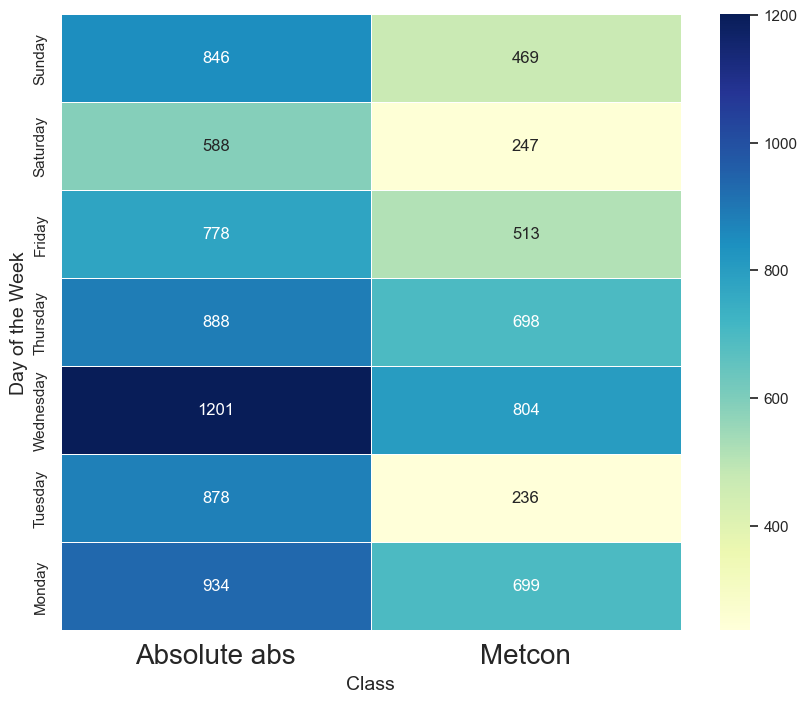

In [84]:
# Convert attended data to datetime

attended_classes['start_date_time'] = pd.to_datetime(attended_classes['start_date_time'])

attended_classes ['stop_date_time'] = pd.to_datetime(attended_classes['stop_date_time'])

# Extracting the day of the week from 'start_date_time' (Monday=0, Sunday=6)
attended_classes['day_of_week'] = attended_classes['start_date_time'].dt.dayofweek

# Mapping the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
attended_classes['day_name'] = attended_classes['day_of_week'].map(days)

# Grouping by 'day_name' and 'space_type', summing 'Total2' for analysis
class_attendance_by_day_of_week = attended_classes.groupby(['day_name', 'class_name'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Reversing the order of days for the heatmap (Monday at the bottom, Sunday at the top)
ordered_days = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
class_attendance_by_day_of_week = class_attendance_by_day_of_week.set_index('day_name').reindex(ordered_days).reset_index()

# Creating the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(class_attendance_by_day_of_week.set_index('day_name'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

plt.xlabel('Class', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)
# Increase the font size of the bottom labels (x-axis tick labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

plt.show()

In [85]:
class_attendance_by_day_of_week

class_name   day_name  Absolute abs  Metcon
0              Sunday           846     469
1            Saturday           588     247
2              Friday           778     513
3            Thursday           888     698
4           Wednesday          1201     804
5             Tuesday           878     236
6              Monday           934     699

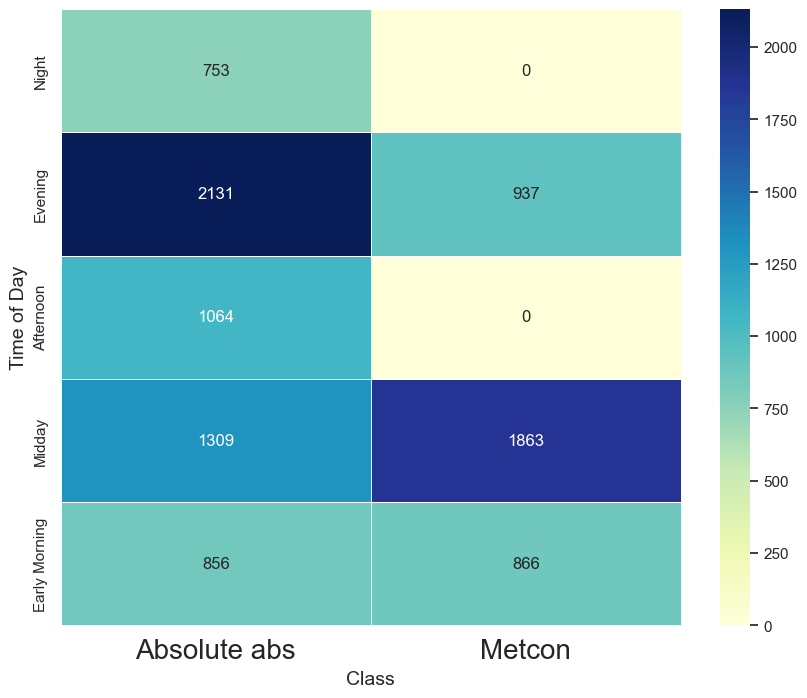

In [86]:
# Define a function to categorize hours into detailed time of day segments
def categorize_detailed_time_of_day(hour):
    if 5 <= hour < 10:
        return 'Early Morning'
    elif 10 <= hour < 14:
        return 'Midday'
    elif 14 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from 'start_date_time'
attended_classes['hour'] = attended_classes['start_date_time'].dt.hour

# Apply the time of day categorization
attended_classes['detailed_time_of_day'] = attended_classes['hour'].apply(categorize_detailed_time_of_day)

# Group by the detailed time of day and space type, summing 'Total2' for analysis
attended_classes_by_detailed_time_final = attended_classes.groupby(['detailed_time_of_day', 'class_name'])['Total2'].sum().unstack(fill_value=0).reset_index()

# Inverting the order for the heatmap
ordered_attended_classes = attended_classes_by_detailed_time_final.set_index('detailed_time_of_day').loc[
    ['Night', 'Evening', 'Afternoon', 'Midday', 'Early Morning']
].reset_index()

# Creating the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(ordered_attended_classes.set_index('detailed_time_of_day'), cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)


plt.xlabel('Class', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)

# Increase the font size of the bottom labels (x-axis tick labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20)

plt.show()


# 3.4 Extra Classes - Alasdair Bell

In [87]:
# Filter class_data_cis to include only class names that exist in merged_data_scaled_extra

class_data_cis_filtered = class_data_cis[class_data_cis['class_name'].isin(merged_data_scaled_extra['Class Name'])]

# Display the filtered DataFrame
class_data_cis_filtered

booking_id    class_name  center_id      state   start_date_time  \
28     314book15244       Stretch        314     ACTIVE  01/09/2022 08:15   
29     314book15244       Stretch        314     ACTIVE  01/09/2022 08:15   
72     174book60425  Absolute abs        174     ACTIVE  01/09/2022 13:30   
73     174book60425  Absolute abs        174     ACTIVE  01/09/2022 13:30   
81     314book12634       Stretch        314  CANCELLED  01/09/2022 14:00   
...             ...           ...        ...        ...               ...   
60041  216book68039        Metcon        216     ACTIVE  31/08/2023 18:15   
60095  28book156005  Absolute abs         28     ACTIVE  31/08/2023 19:45   
60096  28book156005  Absolute abs         28     ACTIVE  31/08/2023 19:45   
60107  216book69068  Absolute abs        216     ACTIVE  31/08/2023 20:15   
60108  216book69068  Absolute abs        216     ACTIVE  31/08/2023 20:15   

         stop_date_time  class_capacity participation_status  female  male  \
28     01/09/2022 08:45              20            CANCELLED       2     0   
29     01/09/2022 08:45              20             ATTENDED       1     0   
72     01/09/2022 14:00              30             ATTENDED       2     0   
73     01/09/2022 14:00              30            CANCELLED       4     1   
81     01/09/2022 14:30              30            CANCELLED       1     0   
...                 ...             ...                  ...     ...   ...   
60041  31/08/2023 19:00               8         WAITING LIST       1     0   
60095  31/08/2023 20:00              28            CANCELLED       1     0   
60096  31/08/2023 20:00              28             ATTENDED      14     1   
60107  31/08/2023 20:30              12             ATTENDED       1     1   
60108  31/08/2023 20:30              12              NO SHOW       1     0   

       ...  age_35_44  age_over_45  Total2    class_key  space_type  \
28     ...          0            0       2  25769808128      STUDIO   
29     ...          0            0       1  25769808129      STUDIO   
72     ...          0            0       2        12775      STUDIO   
73     ...          0            3       5        12776      STUDIO   
81     ...          0            0       1  25769807462      STUDIO   
...    ...        ...          ...     ...          ...         ...   
60041  ...          1            1       2   8589942820   GYM FLOOR   
60095  ...          0            1       1  17179877875      STUDIO   
60096  ...          5            9      20  17179877876      STUDIO   
60107  ...          0            1       2   8589942842      STUDIO   
60108  ...          0            0       1   8589942843      STUDIO   

       Timetable/Extra  centers_offering  normalized_Total2  normalized_male  \
28               Extra                 7           0.285714              0.0   
29               Extra                 7           0.142857              0.0   
72               Extra                10           0.200000              0.0   
73               Extra                10           0.500000              0.1   
81               Extra                 7           0.142857              0.0   
...                ...               ...                ...              ...   
60041            Extra                 7           0.285714              0.0   
60095            Extra                10           0.100000              0.0   
60096            Extra                10           2.000000              0.1   
60107            Extra                10           0.200000              0.1   
60108            Extra                10           0.100000              0.0   

       normalized_female  
28              0.285714  
29              0.142857  
72              0.200000  
73              0.400000  
81              0.142857  
...                  ...  
60041           0.142857  
60095           0.100000  
60096           1.400000  
60107           0.100000  
60108           0.100000  

[4822 ro

In [88]:
# Filter the dataset for entries with participation status as "ATTENDED"
attended_classes_extra = class_data_cis_filtered[class_data_cis_filtered['participation_status'] == 'ATTENDED']

attended_classes_extra

booking_id    class_name  center_id   state   start_date_time  \
29     314book15244       Stretch        314  ACTIVE  01/09/2022 08:15   
72     174book60425  Absolute abs        174  ACTIVE  01/09/2022 13:30   
178    168book68046  Absolute abs        168  ACTIVE  02/09/2022 08:15   
181    314book13087       Stretch        314  ACTIVE  02/09/2022 08:15   
192    293book25281       Stretch        293  ACTIVE  02/09/2022 08:30   
...             ...           ...        ...     ...               ...   
60021  14book157064       Stretch         14  ACTIVE  31/08/2023 13:45   
60023  34book133093       Stretch         34  ACTIVE  31/08/2023 13:50   
60038  216book68039        Metcon        216  ACTIVE  31/08/2023 18:15   
60096  28book156005  Absolute abs         28  ACTIVE  31/08/2023 19:45   
60107  216book69068  Absolute abs        216  ACTIVE  31/08/2023 20:15   

         stop_date_time  class_capacity participation_status  female  male  \
29     01/09/2022 08:45              20             ATTENDED       1     0   
72     01/09/2022 14:00              30             ATTENDED       2     0   
178    02/09/2022 08:45              23             ATTENDED       1     0   
181    02/09/2022 08:45              30             ATTENDED       1     0   
192    02/09/2022 08:45              23             ATTENDED       2     0   
...                 ...             ...                  ...     ...   ...   
60021  31/08/2023 14:15              30             ATTENDED       1     1   
60023  31/08/2023 14:20              30             ATTENDED       0     1   
60038  31/08/2023 19:00               8             ATTENDED       5     2   
60096  31/08/2023 20:00              28             ATTENDED      14     1   
60107  31/08/2023 20:30              12             ATTENDED       1     1   

       ...  age_35_44  age_over_45  Total2    class_key  space_type  \
29     ...          0            0       1  25769808129      STUDIO   
72     ...          0            0       2        12775      STUDIO   
178    ...          0            1       1         6032      STUDIO   
181    ...          1            1       2  25769807563      STUDIO   
192    ...          0            0       2  17179878298      STUDIO   
...    ...        ...          ...     ...          ...         ...   
60021  ...          1            1       3         5810      STUDIO   
60023  ...          0            2       2  25769819908      STUDIO   
60038  ...          1            3       8   8589942817   GYM FLOOR   
60096  ...          5            9      20  17179877876      STUDIO   
60107  ...          0            1       2   8589942842      STUDIO   

       Timetable/Extra  centers_offering  normalized_Total2  normalized_male  \
29               Extra                 7           0.142857         0.000000   
72               Extra                10           0.200000         0.000000   
178              Extra                10           0.100000         0.000000   
181              Extra                 7           0.285714         0.000000   
192              Extra                 7           0.285714         0.000000   
...                ...               ...                ...              ...   
60021            Extra                 7           0.428571         0.142857   
60023            Extra                 7           0.285714         0.142857   
60038            Extra                 7           1.142857         0.285714   
60096            Extra                10           2.000000         0.100000   
60107            Extra                10           0.200000         0.100000   

       normalized_female  
29              0.142857  
72              0.200000  
178             0.100000  
181             0.142857  
192             0.285714  
...                  ...  
60021           0.142857  
60023           0.000000  
60038           0.714286  
60096           1.400000  
60107           0.100000  

[1959 rows x 26 columns]

In [89]:
# Group by class_name and sum normalized_Total2

attended_classes_extra_grouped = attended_classes_extra.groupby('class_name')['normalized_Total2'].sum().reset_index()

attended_classes_extra_grouped = attended_classes_extra_grouped.sort_values(by='normalized_Total2', ascending=False)

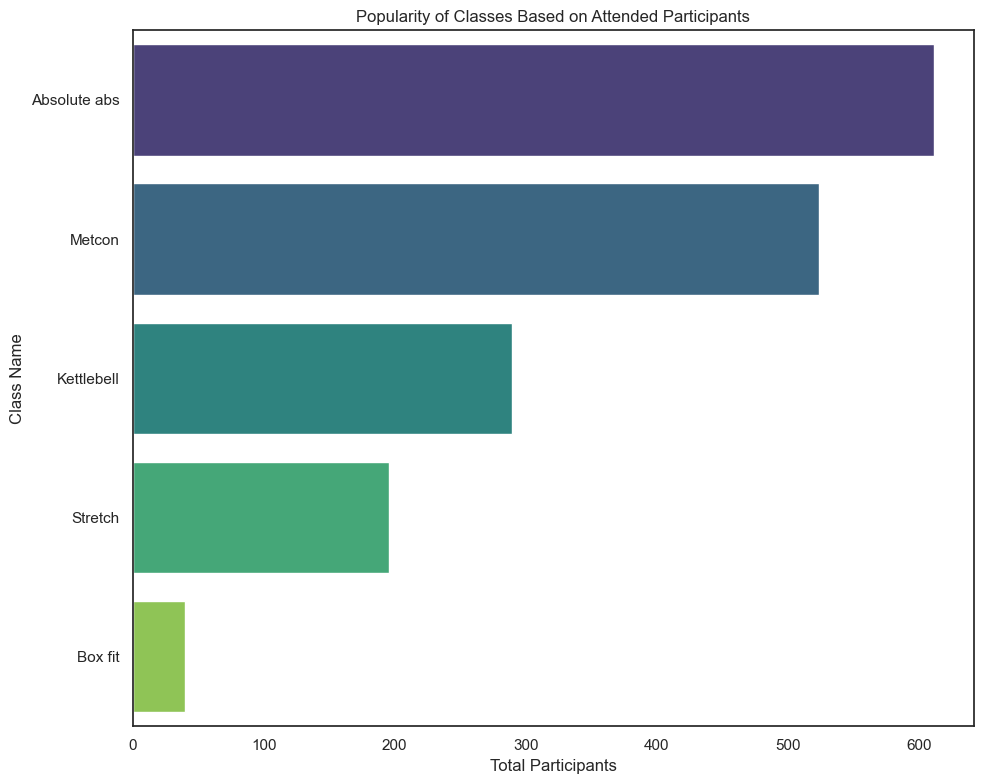

In [90]:

# Create a bar plot without gridlines
plt.figure(figsize=(10, 8))
sns.barplot(x='normalized_Total2', y='class_name', data=attended_classes_extra_grouped, palette='viridis')
plt.title('Popularity of Classes Based on Attended Participants')
plt.xlabel('Total Participants')
plt.ylabel('Class Name')
plt.grid(False)  # Remove gridlines
plt.tight_layout()
plt.show()

## 3.4.1 Extra Classes Popularity by Gender

In [91]:
# Aggregate total attendees by class_name for females and males separately
gender_popularity = attended_classes_extra.groupby('class_name').agg({
    'female': 'sum',
    'male': 'sum'
})

# Sort the results by female attendees and then by male attendees to see the most popular classes for each gender
gender_popularity_sorted = gender_popularity.sort_values(by=['female', 'male'], ascending=False).reset_index()

gender_popularity_sorted

class_name  female  male
0  Absolute abs    4116   784
1        Metcon    2162   711
2       Stretch     981   176
3    Kettlebell     848   123
4       Box fit      74    23

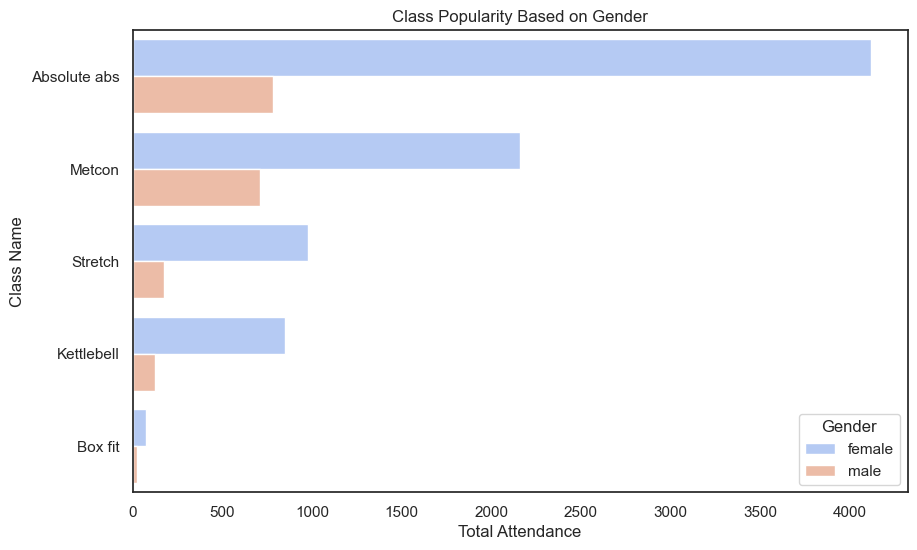

In [92]:
# Melt the dataframe for easier plotting with seaborn
gender_popularity_sorted_melt = pd.melt(gender_popularity_sorted, id_vars=['class_name'], value_vars=['female', 'male'],
                            var_name='Gender', value_name='Attendance')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Attendance', y='class_name', hue='Gender', data=gender_popularity_sorted_melt, palette='coolwarm')
plt.title('Class Popularity Based on Gender')
plt.xlabel('Total Attendance')
plt.ylabel('Class Name')
plt.grid(False)  # Removing gridlines for clarity
plt.show()

## 3.4.2 Extra Classes Popularity by Age

In [93]:
# Aggregate participation by class and age group
age_group_columns = ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45', 'normalized_Total2']
class_popularity_by_age = attended_classes_extra.groupby('class_name')[age_group_columns].sum()

# Identify most popular class by age 
class_popularity_by_age_sorted = class_popularity_by_age.sort_values(by=['normalized_Total2'], ascending=False).reset_index()


class_popularity_by_age_sorted

class_name  age_16_17  age_18_22  age_23_28  age_29_34  age_35_44  \
0  Absolute abs         27        384       1137       1101       1190   
1        Metcon          7         84        598        782        788   
2    Kettlebell          4         66        167        231        187   
3       Stretch          2         73        282        257        208   
4       Box fit          2          5         23         21         23   

   age_over_45  normalized_Total2  
0         2274         611.300000  
1         1407         523.714286  
2          503         289.500000  
3          550         196.000000  
4           46          40.000000

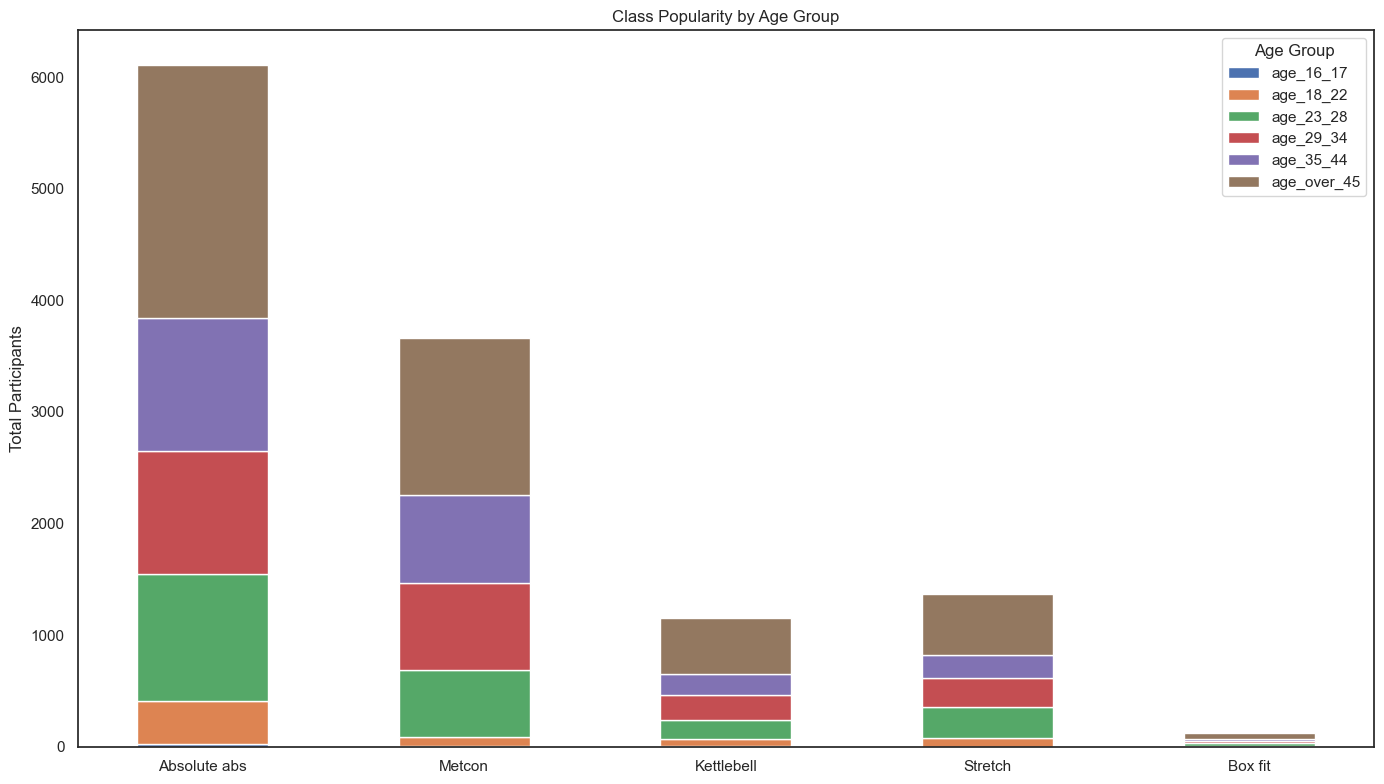

In [94]:
# Exclude normalized_Total2 from age groups.

age_group_columns = ['age_16_17', 'age_18_22', 'age_23_28', 'age_29_34', 'age_35_44', 'age_over_45']

# Prepare data: aggregate sums for each age group per class, which we already have in 'class_popularity_by_age_sorted'
data = [class_popularity_by_age_sorted[age].values for age in age_group_columns]

# Create an array with the locations for each group
ind = np.arange(len(class_popularity_by_age_sorted))  
width = 0.5      

fig, ax = plt.subplots(figsize=(14, 8))

bottoms = np.zeros(len(class_popularity_by_age_sorted))

for i, age_group in enumerate(age_group_columns):
    ax.bar(ind, data[i], width, bottom=bottoms, label=age_group)
    bottoms += data[i]

ax.set_ylabel('Total Participants')
ax.set_title('Class Popularity by Age Group')
ax.set_xticks(ind)
ax.set_xticklabels(class_popularity_by_age_sorted['class_name'])
ax.legend(title='Age Group')

plt.tight_layout()
plt.show()

## 3.4.3 Top 5 extra classes - Attendance by month.  

Data spans from: 2022-01-09 08:15:00 to 2023-12-08 15:00:00


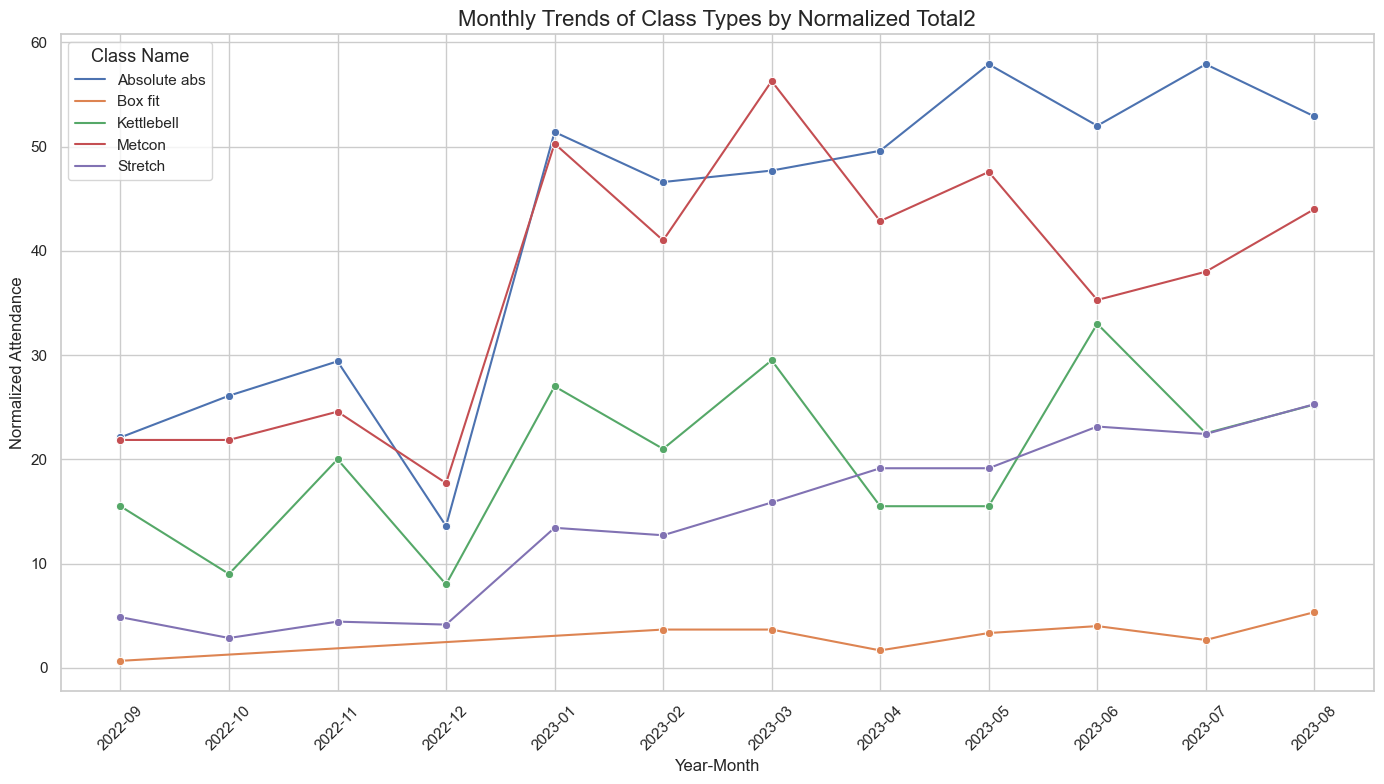

In [95]:
# Convert the 'start_date_time' to datetime format
attended_classes_extra['start_date_time'] = pd.to_datetime(attended_classes_extra['start_date_time'], errors='coerce')

# Extract the month and year from the date for grouping
attended_classes_extra['year_month'] = attended_classes_extra['start_date_time'].dt.to_period('M').astype(str)

# Check the minimum and maximum dates to confirm the data span
print("Data spans from:", attended_classes_extra['start_date_time'].min(), "to", attended_classes_extra['start_date_time'].max())

# Group by 'year_month' and 'class_name', then calculate the sum of 'normalized_Total2'
monthly_trends_sum = attended_classes_extra.groupby(['year_month', 'class_name'])['normalized_Total2'].sum().reset_index()

# Filter the dataframe to include only the valid months (if necessary)
monthly_trends_sum = monthly_trends_sum[(monthly_trends_sum['year_month'] >= '2022-09') & (monthly_trends_sum['year_month'] <= '2023-08')]

# Sort the result for better readability
monthly_trends_sum = monthly_trends_sum.sort_values(by=['year_month', 'class_name'])

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a plot of normalized_Total2 trends over months for different class_names
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trends_sum, x='year_month', y='normalized_Total2', hue='class_name', marker='o')

# Enhancing the plot
plt.title('Monthly Trends of Class Types by Normalized Total2', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Normalized Attendance', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Class Name', title_fontsize='13', fontsize='11')

# Show the plot
plt.tight_layout()
plt.show()


## 3.4.4 Top 5 extra classes - Attendance by day of week.  

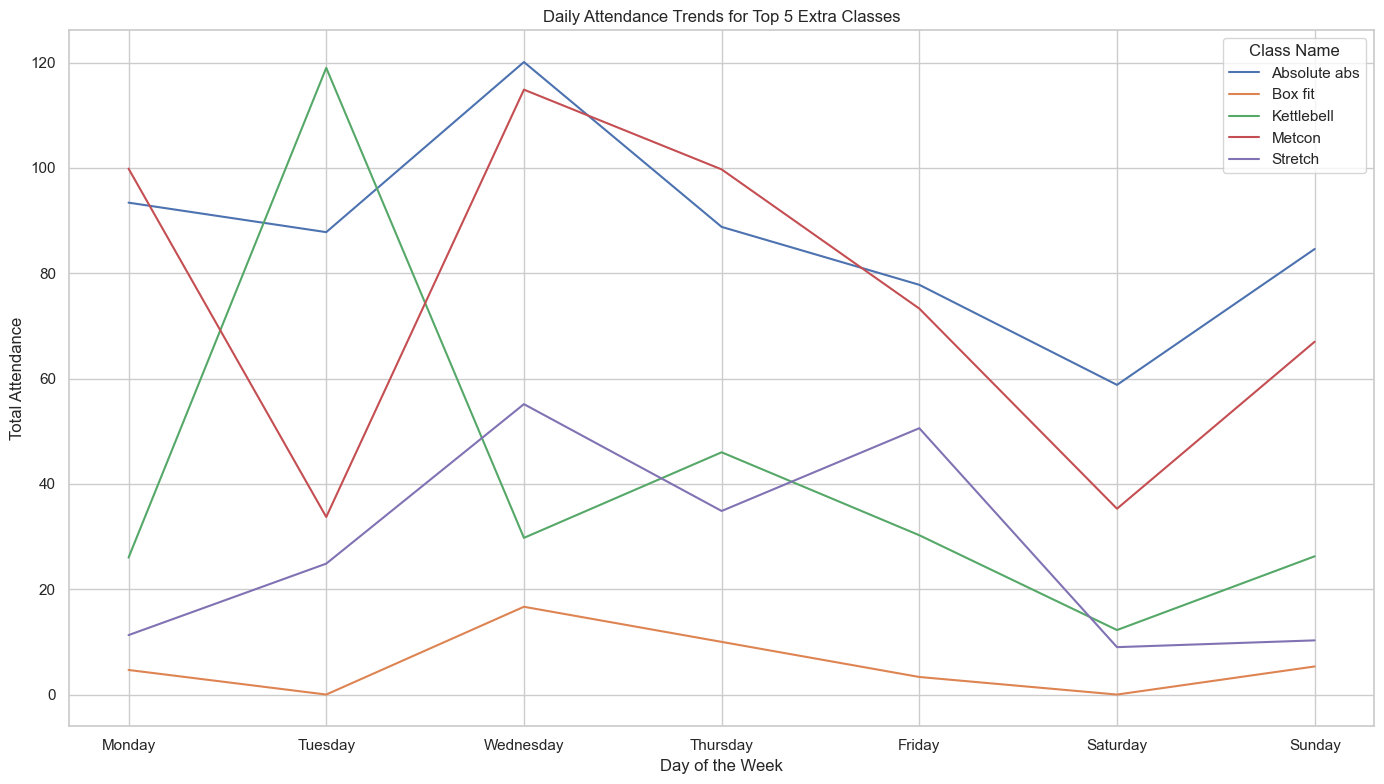

In [96]:
# Convert 'start_date_time' column to datetime format
attended_classes_extra['start_date_time'] = pd.to_datetime(attended_classes_extra['start_date_time'])

# Extract the day of the week from 'start_date_time'
attended_classes_extra['day_of_week'] = attended_classes_extra['start_date_time'].dt.dayofweek

# Map the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
attended_classes_extra['day_name'] = attended_classes_extra['day_of_week'].map(days)

# Group by class_name and day_name, then sum Total2 for daily attendance
daily_trends = attended_classes_extra.groupby(['class_name', 'day_name'])['normalized_Total2'].sum().unstack(fill_value=0)

# Ordering days of the week correctly for plotting
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends = daily_trends[ordered_days]  # This assumes all days are present in the data

# Plotting the daily trends for the top classes with days of the week in the correct order
daily_trends.T.plot(kind='line', figsize=(14, 8))  # Transpose to have days of the week on the x-axis
plt.title('Daily Attendance Trends for Top 5 Extra Classes')
plt.xlabel('Day of the Week')
plt.ylabel('Total Attendance')
plt.legend(title='Class Name')
plt.tight_layout()
plt.show()


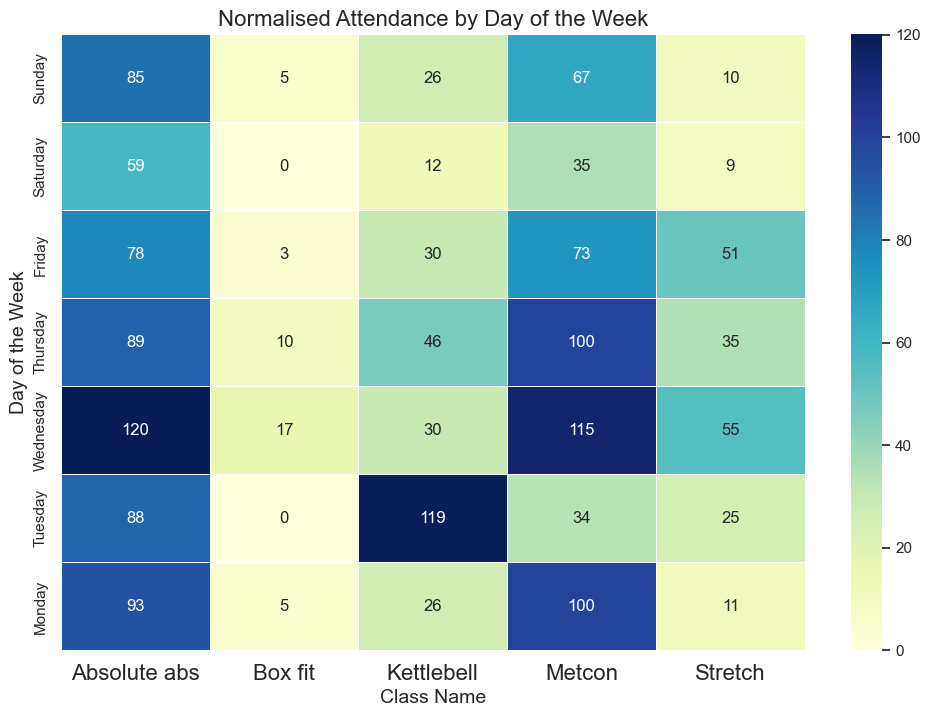

In [97]:
# Heatmap

# Convert 'start_date_time' column to datetime format
attended_classes_extra['start_date_time'] = pd.to_datetime(attended_classes_extra['start_date_time'])

# Extract the day of the week from 'start_date_time'
attended_classes_extra['day_of_week'] = attended_classes_extra['start_date_time'].dt.dayofweek

# Map the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
attended_classes_extra['day_name'] = attended_classes_extra['day_of_week'].map(days)

# Group by class_name and day_name, then sum Total2 for daily attendance
daily_trends = attended_classes_extra.groupby(['class_name', 'day_name'])['normalized_Total2'].sum().unstack(fill_value=0)

# Make sure the DataFrame columns are set in the correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_trends = daily_trends[ordered_days]  # This will reorder columns

# Transpose the DataFrame
daily_trends_transposed = daily_trends.T

# Reverse the order of days for plotting
daily_trends_transposed = daily_trends_transposed.iloc[::-1]

# Create the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(daily_trends_transposed, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

plt.title('Normalised Attendance by Day of the Week', fontsize=16)
plt.xlabel('Class Name', fontsize=14)
plt.ylabel('Day of the Week', fontsize=14)


# Increase the font size of the bottom labels (x-axis tick labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)
plt.show()

### Optimal day to schedule each class.

In [98]:
# Convert 'start_date_time' column to datetime format (if not already done)
attended_classes_extra['start_date_time'] = pd.to_datetime(attended_classes_extra['start_date_time'])

# Extract the day of the week from 'start_date_time'
attended_classes_extra['day_of_week'] = attended_classes_extra['start_date_time'].dt.dayofweek

# Map the day of the week from numbers to names
days = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
attended_classes_extra['day_name'] = attended_classes_extra['day_of_week'].map(days)

# Group by class_name and day_name, then sum normalized_Total2 for daily attendance
class_day_grouped = attended_classes_extra.groupby(['class_name', 'day_name'])['normalized_Total2'].sum().reset_index()

# Sort the results within each class by normalized_Total2 in descending order and take the top 3
best_days_for_classes = class_day_grouped.sort_values(['class_name', 'normalized_Total2'], ascending=[True, False])
best_days_for_classes = best_days_for_classes.groupby('class_name').head(3).reset_index(drop=True)

# Create new columns for the top three days
best_days_for_classes['Rank'] = best_days_for_classes.groupby('class_name').cumcount() + 1
best_days_pivot = best_days_for_classes.pivot(index='class_name', columns='Rank', values='day_name')
best_days_pivot.columns = ['Best Day', 'Second Best Day', 'Third Best Day']

# Display the resulting DataFrame
best_days_pivot.reset_index()

class_name   Best Day Second Best Day Third Best Day
0  Absolute abs  Wednesday          Monday       Thursday
1       Box fit  Wednesday        Thursday         Sunday
2    Kettlebell    Tuesday        Thursday         Friday
3        Metcon  Wednesday          Monday       Thursday
4       Stretch  Wednesday          Friday       Thursday

In [99]:
# Export to csv

daily_trends.to_csv('Daily Trends.csv')
attended_classes_extra.to_csv('attended_classes_extra.csv')

## 3.4.5 Top 5 extra classes - Attendance by time of day.  

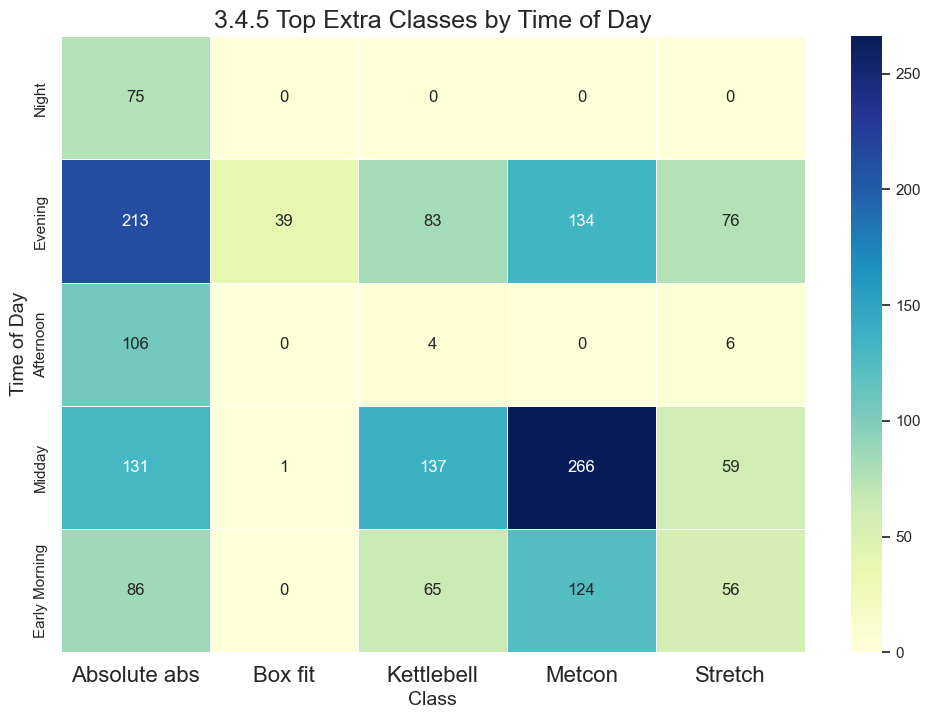

In [100]:
# Define a function to categorize hours into detailed time of day segments
def categorize_detailed_time_of_day(hour):
    if 5 <= hour < 10:
        return 'Early Morning'
    elif 10 <= hour < 14:
        return 'Midday'
    elif 14 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from 'start_date_time'
attended_classes_extra['hour'] = attended_classes_extra['start_date_time'].dt.hour

# Apply the time of day categorization
attended_classes_extra['detailed_time_of_day'] = attended_classes_extra['hour'].apply(categorize_detailed_time_of_day)

# Group by the detailed time of day and space type, summing 'Total2' for analysis
attended_classes_extra_tod = attended_classes_extra.groupby(['detailed_time_of_day', 'class_name'])['normalized_Total2'].sum().unstack(fill_value=0).reset_index()

# Inverting the order for the heatmap
ordered_attendance = attended_classes_extra_tod.set_index('detailed_time_of_day').loc[
    ['Night', 'Evening', 'Afternoon', 'Midday', 'Early Morning']
].reset_index()

# Creating the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(ordered_attendance.set_index('detailed_time_of_day'), cmap='YlGnBu', annot=True, fmt=".0f", linewidths=.5)

plt.title('3.4.5 Top Extra Classes by Time of Day', fontsize=18)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Time of Day', fontsize=14)

# Increase the font size of the bottom labels (x-axis tick labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=16)

plt.show()

### Optimal time of day tp Schedule each class.

In [101]:
# Define a function to categorize hours into detailed time of day segments
def categorize_detailed_time_of_day(hour):
    if 5 <= hour < 10:
        return 'Early Morning'
    elif 10 <= hour < 14:
        return 'Midday'
    elif 14 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Extract the hour from 'start_date_time'
attended_classes_extra['hour'] = attended_classes_extra['start_date_time'].dt.hour

# Apply the time of day categorization
attended_classes_extra['detailed_time_of_day'] = attended_classes_extra['hour'].apply(categorize_detailed_time_of_day)

# Group by class_name and detailed_time_of_day, then sum normalized_Total2 for analysis
time_of_day_grouped = attended_classes_extra.groupby(['class_name', 'detailed_time_of_day'])['normalized_Total2'].sum().reset_index()

# Round normalized_Total2 to 0 decimal places
time_of_day_grouped['normalized_Total2'] = time_of_day_grouped['normalized_Total2'].round(0)

# Sort the results within each class by normalized_Total2 in descending order and take the top 2
best_times_for_classes = time_of_day_grouped.sort_values(['class_name', 'normalized_Total2'], ascending=[True, False])
best_times_for_classes = best_times_for_classes.groupby('class_name').head(2).reset_index(drop=True)

# Create new columns for the top two slot times
best_times_for_classes['Rank'] = best_times_for_classes.groupby('class_name').cumcount() + 1
best_times_pivot = best_times_for_classes.pivot(index='class_name', columns='Rank', values='detailed_time_of_day')
best_times_pivot.columns = ['Best Slot Time', 'Second Best Slot Time']

# Display the resulting DataFrame
best_times_pivot.reset_index()

class_name Best Slot Time Second Best Slot Time
0  Absolute abs        Evening                Midday
1       Box fit        Evening                Midday
2    Kettlebell         Midday               Evening
3        Metcon         Midday               Evening
4       Stretch        Evening                Midday

In [102]:
attended_classes_extra.to_csv('attended_classes_extra.csv')

## 3.4.6 Class Lengths

### Average Class Length

In [103]:
# Convert 'stop_date_time' to datetime format
attended_classes_extra['stop_date_time'] = pd.to_datetime(attended_classes_extra['stop_date_time'], errors='coerce')

# Calculate duration for each class
attended_classes_extra['class_duration'] = (attended_classes_extra['stop_date_time'] - attended_classes_extra['start_date_time']).dt.total_seconds() / 60  # duration in minutes

# Group by 'class_name' and calculate the average duration
average_class_length = attended_classes_extra.groupby('class_name')['class_duration'].mean().reset_index()

average_class_length


class_name  class_duration
0  Absolute abs       26.015857
1       Box fit       30.937500
2    Kettlebell       35.571429
3        Metcon       37.630435
4       Stretch       28.494983

### Max Min Class Lengths

In [104]:
# Group by 'class_name' and calculate the minimum and maximum duration
class_length_extremes = attended_classes_extra.groupby('class_name')['class_duration'].agg(['min', 'max']).reset_index()

class_length_extremes

class_name   min   max
0  Absolute abs  15.0  30.0
1       Box fit  30.0  45.0
2    Kettlebell  30.0  45.0
3        Metcon  30.0  60.0
4       Stretch  15.0  30.0

### Isolate the different Class lengths in each class

In [105]:
# Group by 'class_name' and aggregate unique class durations for each class type
unique_class_durations = attended_classes_extra.groupby('class_name')['class_duration'].unique().reset_index()

# Sorting each list of durations
unique_class_durations['class_duration'] = unique_class_durations['class_duration'].apply(lambda x: sorted(x))

# Renaming the columns for report
unique_class_durations.rename(columns={'class_name': 'Class Name', 'class_duration': 'Class Durations'}, inplace=True)

# Display the DataFrame
unique_class_durations

Class Name     Class Durations
0  Absolute abs  [15.0, 20.0, 30.0]
1       Box fit        [30.0, 45.0]
2    Kettlebell        [30.0, 45.0]
3        Metcon  [30.0, 45.0, 60.0]
4       Stretch        [15.0, 30.0]

### Which class length is most popular in each class

In [106]:
# Group by 'class_name' and 'class_duration', then sum 'Total2' to find the most popular class length
most_popular_class_length = attended_classes_extra.groupby(['class_name', 'class_duration'])['Total2'].sum().reset_index()

# Find the maximum popularity (Total2 sum) for each class_name
most_popular_class_length = most_popular_class_length.loc[most_popular_class_length.groupby('class_name')['Total2'].idxmax()]

# Drop the Total2 column as it's no longer needed
most_popular_class_length = most_popular_class_length.drop(columns=['Total2'])

# Rename the columns to more descriptive names for report
most_popular_class_length.rename(columns={'class_name': 'Class Name', 'class_duration': 'Optimal Class Duration'}, inplace=True)

# Display the resulting DataFrame
most_popular_class_length

Class Name  Optimal Class Duration
2   Absolute abs                    30.0
3        Box fit                    30.0
5     Kettlebell                    30.0
8         Metcon                    45.0
11       Stretch                    30.0